In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.formula.api import ols
from scipy import stats

In [2]:
data = pd.read_csv("playlists.csv", sep=";", encoding = "ISO-8859-1") 

In [3]:
data.describe(include="all")

company  playlist_sample  \
count           1782      1782.000000   
unique             6              NaN   
top     Arte Francés              NaN   
freq             441              NaN   
mean             NaN         2.084175   
std              NaN         1.114796   
min              NaN         1.000000   
25%              NaN         1.000000   
50%              NaN         2.000000   
75%              NaN         3.000000   
max              NaN         5.000000   

                                               namesfiles           no  \
count                                                1782  1782.000000   
unique                                                515          NaN   
top     30 - Kasbo - Your Tempo.mp3                   ...          NaN   
freq                                                    6          NaN   
mean                                                  NaN    17.116162   
std                                                   NaN    11.837401   
min                                                   NaN     1.000000   
25%                                                   NaN     8.000000   
50%                                                   NaN    15.500000   
75%                                                   NaN    24.000000   
max                                                   NaN    65.000000   

                 artist                                               song  \
count              1782                                               1782   
unique              353                                                443   
top      Satin Jackets    Hula Hoop.mp3                                ...   
freq                 51                                                 12   
mean                NaN                                                NaN   
std                 NaN                                                NaN   
min                 NaN                                                NaN   
25%                 NaN                                                NaN   
50%                 NaN                                                NaN   
75%                 NaN                                                NaN   
max                 NaN                                                NaN   

        sampleratefiles  totalsamplesfiles  durationfiles  bitratefiles  \
count            1782.0       1.782000e+03    1782.000000   1782.000000   
unique              NaN                NaN            NaN           NaN   
top                 NaN                NaN            NaN           NaN   
freq                NaN                NaN            NaN           NaN   
mean            44100.0       1.043632e+07     236.651237    252.336700   
std                 0.0       3.227105e+06      73.176981     88.377597   
min             44100.0       5.965054e+06     135.262000    128.000000   
25%             44100.0       8.353151e+06     189.413850    128.000000   
50%             44100.0       9.480378e+06     214.974562    320.000000   
75%             44100.0       1.146931e+07     260.075075    320.000000   
max             44100.0       2.843136e+07     644.702000    320.000000   

             ...         chromagramfiles_5  chromagramfiles_6  \
count        ...               1782.000000        1782.000000   
unique       ...                       NaN                NaN   
top          ...                       NaN                NaN   
freq         ...                       NaN                NaN   
mean         ...                  0.332301           0.319191   
std          ...                  0.270616           0.263919   
min          ...                  0.000000           0.000000   
25%          ...                  0.116591           0.109123   
50%          ...                  0.262799           0.259887   
75%          ...                  0.494897           0.469603   
max          ...                  1.000000           1.000000   

        chro

Find positives and negatives songs of the process for every company.

In [4]:
companies = data['company'].unique()
by_company = [data[data.company == company] for company in companies]
positives = []
negatives = []
for data_com in by_company:
    data_com = data_com.sort_values('playlist_sample')
    last_pl = int(data_com.tail(1).playlist_sample)
    #pls = pd.DataFrame({'pl':range (1,last_pl+1), 'old':[0]*last_pl, 'new':[0]*last_pl})
    #curr_pl = data_com.query('playlist_sample == '+str(1))
    #pls.new[0]=(curr_pl.shape[0])/3
    #sum_pls = [curr_pl.shape[0]/3]
    #for i in range(2,last_pl+1):
    #    curr_pl = data_com.query('playlist_sample == '+str(i))
    #    pre_pl = data_com.query('playlist_sample == '+str(i-1))
    #    olds = curr_pl['song'].map(pre_pl['song'].value_counts()).sum(axis = 0)/3
    #    pls.old[i-1]= olds/3 
    #    pls.new[i-1]=(curr_pl.shape[0]-olds)/3
    #    sum_pls.append(curr_pl.shape[0]/3)
    #sum_pls = pd.DataFrame(sum_pls)
    #pls_rel = (pls[['old']].div(sum_pls.values, axis=0)*100).join(pls[['new']].div(sum_pls.values, axis=0)*100)
    #pls[['old','new']].plot(kind='bar', stacked=True, title=data_com.iloc[0,0])
    #for n in pls_rel:
    #    for i, (cs, ab, pc) in enumerate(zip(pls.iloc[:, 1:].cumsum(1)[n].values, pls[n].values, pls_rel[n].values)):
    #        if(pc>0):
    #            plt.text(i, cs - ab/2, str(np.round(pc, 1)) + '%', va='center', ha='center')
    df_last_pl= data_com.query('playlist_sample == '+str(last_pl))
    positives.append(df_last_pl)
    pos_loc = pd.DataFrame({}, columns=data_com.columns)
    rep=0
    for index, row in data_com[data_com.playlist_sample<last_pl].iterrows(): 
        if not ((df_last_pl['artist'] == row['artist']) & (df_last_pl['song'] ==  row['song'])).any() and pos_loc[(pos_loc['artist']== row['artist']) & (pos_loc['song'] ==  row['song'])].shape[0]<3:
            pos_loc= pos_loc.append(row, ignore_index=True)
        else:
            rep+=1
    #n_vs_p = pd.DataFrame({'sam':['pos', 'neg'],'num':[df_last_pl.shape[0]/3,pos_loc.shape[0]/3]})
    # n_vs_p.plot.bar(x='sam', y='num', rot=0, title=data_com.iloc[0,0])
    negatives.append(pos_loc)

In [5]:
df_n_ps = []
for i in range(len(negatives)):
    negatives[i]['chosen']=0
    positives[i]['chosen']=1
    df_n_ps.append(negatives[i].append(positives[i]))

D:\Usuarios\1144084318\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## ANOVA

In [6]:
import warnings
import matplotlib.pyplot as plt
import math
import seaborn as sns
warnings.filterwarnings('ignore')

kurtosisfiles
rmsfiles
rmsmedianfiles
lowenergyfiles
ASRfiles
beatspectrumfiles
eventdensityfiles
tempofiles
pulseclarityfiles
zerocrossfiles
rolloffsfiles
brightnessfiles
spreadfiles
centroidfiles


TypeError: zip argument #4 must support iteration

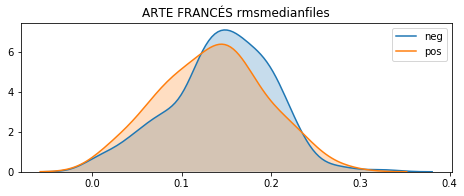

In [27]:
alpha = 0.05
for df_n_p in df_n_ps:
    df_n_p = df_n_p.fillna(0)
    fig = plt.figure(figsize=(17,200))
    i=1
    for index in range(10,df_n_p.shape[1]-1):
        print(name)
        name= df_n_p.columns.values[index]
        df_n_p[name]=df_n_p[name].astype('float64') 
        mc = MultiComparison(df_n_p[name], df_n_p['chosen'])
        mc_results = mc.tukeyhsd()
        if mc_results._results_table.data[1:][0][5]:
            # print(name)
            results = ols(name+' ~ C(chosen)', data=df_n_p).fit()
            homogeneity_test = stats.levene(df_n_p[name][df_n_p['chosen'] == 0], df_n_p[name][df_n_p['chosen'] == 1])[1]
            normality_test = stats.shapiro(results.resid)[1]
            if homogeneity_test > alpha and normality_test > alpha:
                # print(results.summary())
                ax = fig.add_subplot(math.ceil(df_n_p.shape[1]-9/2), 2, i)
                sns.kdeplot(df_n_p.loc[df_n_p.chosen==0][name], shade=True, ax=ax);
                sns.kdeplot(df_n_p.loc[df_n_p.chosen==1][name], shade=True, ax=ax);
                plt.title(df_n_p.iloc[0,0].upper()+" "+name)
                plt.legend(['neg', 'pos'])
                i+=1

In [7]:
from collections import Counter


from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [8]:
for i in range(len(companies)):
    df_n_ps[i].bitratefiles = df_n_ps[i].bitratefiles.astype('float64')
    df_n_ps[i].pitchfiles = df_n_ps[i].pitchfiles.astype('float64')
    df_n_ps[i].bestkeyfiles = df_n_ps[i].bestkeyfiles.astype('float64')
df_n_ps[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 179
Data columns (total 65 columns):
company                 315 non-null object
playlist_sample         315 non-null object
namesfiles              315 non-null object
no                      315 non-null object
artist                  315 non-null object
song                    315 non-null object
sampleratefiles         315 non-null object
totalsamplesfiles       315 non-null object
durationfiles           315 non-null float64
bitratefiles            315 non-null float64
rmsfiles                315 non-null float64
rmsmedianfiles          315 non-null float64
lowenergyfiles          315 non-null float64
ASRfiles                315 non-null float64
beatspectrumfiles       315 non-null float64
eventdensityfiles       315 non-null float64
tempofiles              315 non-null float64
pulseclarityfiles       315 non-null float64
zerocrossfiles          315 non-null float64
rolloffsfiles           315 non-null float64
bri

Vamos a reemplazar los NaN y entonces a normalizar los datos para que todas las variables tengan la misma importancia. Solo vamos a considerar los datos numéricos.

In [9]:
df_n_ps_std = [0]*len(companies)
for i in range(len(companies)):
    df_n_ps[i] = df_n_ps[i].fillna(0)
    df_n_ps_std[i] = pd.DataFrame(preprocessing.scale(df_n_ps[i].iloc[:,8:]))
    df_n_ps_std[i].columns=df_n_ps[i].columns[8:]
df_n_ps_std[0].mean(axis=0)

durationfiles          -1.889141e-16
bitratefiles            0.000000e+00
rmsfiles                3.559763e-16
rmsmedianfiles         -2.396672e-16
lowenergyfiles          1.543739e-16
ASRfiles                1.226532e-16
beatspectrumfiles       2.269789e-16
eventdensityfiles      -6.132661e-17
tempofiles              4.103860e-16
pulseclarityfiles      -6.696583e-17
zerocrossfiles         -1.092600e-16
rolloffsfiles           2.661011e-16
brightnessfiles         1.092600e-16
spreadfiles             1.519067e-16
centroidfiles           1.501444e-16
kurtosisfiles           1.875043e-16
flatnessfiles          -4.017950e-17
entropyfiles            6.012827e-16
mfccfiles_1            -4.398598e-16
mfccfiles_2            -2.326182e-17
mfccfiles_3             6.308886e-17
mfccfiles_4             1.718202e-17
mfccfiles_5             1.832749e-17
mfccfiles_6            -3.172066e-17
mfccfiles_7            -1.400996e-16
mfccfiles_8             5.110550e-17
mfccfiles_9             3.101575e-17
m

In [10]:
df_n_ps_std[0].std(axis=0)

durationfiles           1.001591
bitratefiles            0.000000
rmsfiles                1.001591
rmsmedianfiles          1.001591
lowenergyfiles          1.001591
ASRfiles                1.001591
beatspectrumfiles       1.001591
eventdensityfiles       1.001591
tempofiles              1.001591
pulseclarityfiles       1.001591
zerocrossfiles          1.001591
rolloffsfiles           1.001591
brightnessfiles         1.001591
spreadfiles             1.001591
centroidfiles           1.001591
kurtosisfiles           1.001591
flatnessfiles           1.001591
entropyfiles            1.001591
mfccfiles_1             1.001591
mfccfiles_2             1.001591
mfccfiles_3             1.001591
mfccfiles_4             1.001591
mfccfiles_5             1.001591
mfccfiles_6             1.001591
mfccfiles_7             1.001591
mfccfiles_8             1.001591
mfccfiles_9             1.001591
mfccfiles_10            1.001591
mfccfiles_11            1.001591
mfccfiles_12            1.001591
mfccfiles_

Borramos pitch y bitrate porque todos sus valores son 0.

In [11]:
for i in range(len(companies)):
    df_n_ps_std[i] = df_n_ps_std[i].drop(columns="pitchfiles")
    df_n_ps_std[i] = df_n_ps_std[i].drop(columns="bitratefiles")

In [12]:
df_n_ps_std[0].columns

Index(['durationfiles', 'rmsfiles', 'rmsmedianfiles', 'lowenergyfiles',
       'ASRfiles', 'beatspectrumfiles', 'eventdensityfiles', 'tempofiles',
       'pulseclarityfiles', 'zerocrossfiles', 'rolloffsfiles',
       'brightnessfiles', 'spreadfiles', 'centroidfiles', 'kurtosisfiles',
       'flatnessfiles', 'entropyfiles', 'mfccfiles_1', 'mfccfiles_2',
       'mfccfiles_3', 'mfccfiles_4', 'mfccfiles_5', 'mfccfiles_6',
       'mfccfiles_7', 'mfccfiles_8', 'mfccfiles_9', 'mfccfiles_10',
       'mfccfiles_11', 'mfccfiles_12', 'mfccfiles_13', 'inharmonicityfiles',
       'bestkeyfiles', 'keyclarityfiles', 'modalityfiles',
       'tonalcentroidfiles_1', 'tonalcentroidfiles_2', 'tonalcentroidfiles_3',
       'tonalcentroidfiles_4', 'tonalcentroidfiles_5', 'tonalcentroidfiles_6',
       'chromagramfiles_1', 'chromagramfiles_2', 'chromagramfiles_3',
       'chromagramfiles_4', 'chromagramfiles_5', 'chromagramfiles_6',
       'chromagramfiles_7', 'chromagramfiles_8', 'chromagramfiles_9',
      

# MFCC

In [71]:
df_n_ps_std[0].columns[17:30]

Index(['mfccfiles_1', 'mfccfiles_2', 'mfccfiles_3', 'mfccfiles_4',
       'mfccfiles_5', 'mfccfiles_6', 'mfccfiles_7', 'mfccfiles_8',
       'mfccfiles_9', 'mfccfiles_10', 'mfccfiles_11', 'mfccfiles_12',
       'mfccfiles_13'],
      dtype='object')

In [72]:
df_n_ps_std_mfcc = [None]*len(companies)
for i in range(len(companies)):
    df_n_ps_std_mfcc[i] = pd.DataFrame(df_n_ps_std[i].iloc[:,17:30])
    df_n_ps_std_mfcc[i].columns=df_n_ps_std[i].columns[17:30]
df_n_ps_std_mfcc[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 13 columns):
mfccfiles_1     315 non-null float64
mfccfiles_2     315 non-null float64
mfccfiles_3     315 non-null float64
mfccfiles_4     315 non-null float64
mfccfiles_5     315 non-null float64
mfccfiles_6     315 non-null float64
mfccfiles_7     315 non-null float64
mfccfiles_8     315 non-null float64
mfccfiles_9     315 non-null float64
mfccfiles_10    315 non-null float64
mfccfiles_11    315 non-null float64
mfccfiles_12    315 non-null float64
mfccfiles_13    315 non-null float64
dtypes: float64(13)
memory usage: 32.1 KB


## Arte Francés

### ANN

In [23]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.0'

In [24]:
from keras.layers import Input, Flatten, Dense#, Lambda
from keras.models import Model
from keras import layers
from keras import models, optimizers

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV #permite buscar la mejor configuración de parámetros con C-V
from sklearn.metrics import make_scorer # permite crear una clase scorer a partir de una función de score (necesario para el kappa)
from sklearn.metrics import accuracy_score, cohen_kappa_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [108]:
X = df_n_ps_std_mfcc[0]

In [109]:
y = df_n_ps[0]['chosen']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [111]:
X_train.shape

(236, 14)

In [382]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [383]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [384]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [57]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'logistic', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.003, 'max_iter': 2000}, que permiten obtener un Accuracy de 81.78% y un Kappa del 50.99
Tiempo total: 61.22 minutos


In [31]:
grid.best_params_={'activation': 'sigmoid', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.003, 'max_iter': 2000}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [32]:
input_tensor = Input(shape = (n0,))

In [33]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [34]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [35]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 236 samples, validate on 79 samples
Epoch 1/2000
236/236 [==============================] - 4s 17ms/step - loss: 0.8403 - accuracy: 0.3220 - val_loss: 0.7849 - val_accuracy: 0.2911
Epoch 2/2000
236/236 [==============================] - 0s 89us/step - loss: 0.7231 - accuracy: 0.4110 - val_loss: 0.6686 - val_accuracy: 0.5823
Epoch 3/2000
236/236 [==============================] - 0s 97us/step - loss: 0.6456 - accuracy: 0.6992 - val_loss: 0.5972 - val_accuracy: 0.7722
Epoch 4/2000
236/236 [==============================] - 0s 97us/step - loss: 0.6058 - accuracy: 0.6992 - val_loss: 0.5565 - val_accuracy: 0.7722
Epoch 5/2000
236/236 [==============================] - 0s 89us/step - loss: 0.5886 - accuracy: 0.7076 - val_loss: 0.5358 - val_accuracy: 0.7722
Epoch 6/2000
236/236 [==============================] - 0s 89us/step - loss: 0.5802 - accuracy: 0.7076 - val_loss: 0.5249 - val_accuracy: 0.7722
Epoch 7/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5748 

236/236 [==============================] - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 108/2000
236/236 [==============================] - 0s 127us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 109/2000
236/236 [==============================] - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 110/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 00110: ReduceLROnPlateau reducing learning rate to 2.9296875254658516e-06.
Epoch 111/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 112/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 113/2000
236/236 [=====================

236/236 [==============================] - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 212/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 213/2000
236/236 [==============================] - 0s 148us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 214/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 215/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 216/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 217/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - 

Epoch 316/2000
236/236 [==============================] - ETA: 0s - loss: 0.5187 - accuracy: 0.75 - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 317/2000
236/236 [==============================] - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 318/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 319/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 320/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 00320: ReduceLROnPlateau reducing learning rate to 1.3969838740662821e-12.
Epoch 321/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accur

236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 00420: ReduceLROnPlateau reducing learning rate to 1.3642420645178536e-15.
Epoch 421/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 422/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 423/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 424/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 425/2000
236/236 [==============================] - 0s 97us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 426/2000
236/236 [======================

Epoch 472/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 473/2000
236/236 [==============================] - 0s 97us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 474/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 475/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 476/2000
236/236 [==============================] - 0s 97us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 477/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 478/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_lo

Epoch 577/2000
236/236 [==============================] - ETA: 0s - loss: 0.6339 - accuracy: 0.59 - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 578/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 579/2000
236/236 [==============================] - 0s 127us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 580/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 00580: ReduceLROnPlateau reducing learning rate to 2.0816681892667444e-20.
Epoch 581/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 582/2000
236/236 [==============================] - 0s 131us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accur

236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 682/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 683/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 684/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 685/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 686/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 687/2000
236/236 [==============================] - 0s 93us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - v

Epoch 734/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 735/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 736/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 737/2000
236/236 [==============================] - 0s 127us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 738/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 739/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 740/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_

236/236 [==============================] - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 839/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 840/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 00840: ReduceLROnPlateau reducing learning rate to 3.101927324036873e-28.
Epoch 841/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 842/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 843/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 844/2000
236/236 [======================


Epoch 00890: ReduceLROnPlateau reducing learning rate to 9.693522887615228e-30.
Epoch 891/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 892/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 893/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 894/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 895/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 896/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 897/2000
236/236 [=======

Epoch 943/2000
236/236 [==============================] - 0s 131us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 944/2000
236/236 [==============================] - 0s 131us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 945/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 946/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 947/2000
236/236 [==============================] - 0s 127us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 948/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 949/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_

236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1048/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1049/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1050/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 01050: ReduceLROnPlateau reducing learning rate to 1.4791142101463666e-34.
Epoch 1051/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1052/2000
236/236 [==============================] - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1053/2000
236/236 [===============

236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1100/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 01100: ReduceLROnPlateau reducing learning rate to 4.6222319067073956e-36.
Epoch 1101/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1102/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1103/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1104/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1105/2000
236/236 [===============

236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1152/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1153/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1154/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1155/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1156/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1157/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4

236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1256/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1257/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1258/2000
236/236 [==============================] - 0s 93us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1259/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1260/2000
236/236 [==============================] - 0s 93us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 01260: ReduceLROnPlateau reducing learning rate to 7.052945365716453e-41.
Epoch 1261/2000
236/236 [==================

236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1360/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468

Epoch 01360: ReduceLROnPlateau reducing learning rate to 6.866362475191604e-44.
Epoch 1361/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1362/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1363/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1364/2000
236/236 [==============================] - 0s 123us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1365/2000
236/236 [================

236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1412/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1413/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1414/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1415/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1416/2000
236/236 [==============================] - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1417/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4

236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1466/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1467/2000
236/236 [==============================] - 0s 136us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1468/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1469/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1470/2000
236/236 [==============================] - 0s 131us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1471/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4

236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1576/2000
236/236 [==============================] - 0s 220us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1577/2000
236/236 [==============================] - 0s 131us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1578/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1579/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1580/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1581/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4

236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1686/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1687/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1688/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1689/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1690/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1691/2000
236/236 [==============================] - 0s 97us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.47

236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1795/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1796/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1797/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1798/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1799/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1800/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4

Epoch 1904/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1905/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1906/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1907/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1908/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1909/2000
236/236 [==============================] - 0s 110us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1910/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458

236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1960/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1961/2000
236/236 [==============================] - 0s 106us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1962/2000
236/236 [==============================] - 0s 102us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1963/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1964/2000
236/236 [==============================] - 0s 114us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4718 - val_accuracy: 0.7468
Epoch 1965/2000
236/236 [==============================] - 0s 119us/step - loss: 0.5239 - accuracy: 0.7458 - val_loss: 0.4

range(0, 2000)


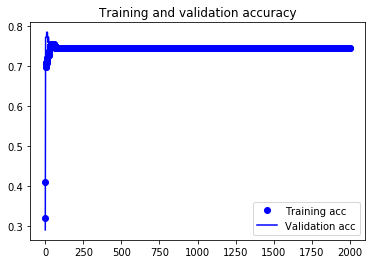

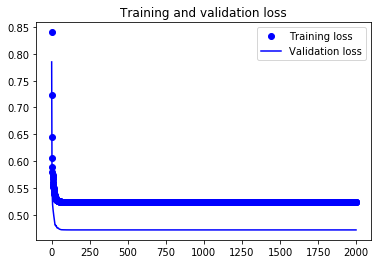

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [38]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

79/79 [==============================] - 0s 63us/step
test loss: 0.471761223636096, test accuracy: 0.746835470199585


In [40]:
y_pred = model.predict(X_test)
y_pred_d = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred_d))
print("AUC ROC: ",roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred_d))

Kappa:  0.059523809523809534
AUC ROC:  0.7723132969034608
[[57  4]
 [16  2]]


### KMeans

In [102]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0       0.297583     1.225637    -0.367641     0.606499     0.072373   
1       0.637676    -1.507256    -1.572737    -0.954161    -0.857425   
2       2.236730    -0.319414     0.669910    -1.918119    -0.820882   
3       0.662077    -0.381499     0.111981    -1.743808    -1.317593   
4       0.736502     0.112932    -0.065024    -1.049458    -0.408043   
5       2.044945    -1.519304    -0.247242    -1.575018    -3.066163   
6      -0.163510     0.463882     0.433775     0.607952    -1.213428   
7       0.469947    -0.206445    -0.861641    -1.194743    -1.342011   
8       0.884810    -2.954758     0.310482    -0.346234    -0.339963   
9      -0.966889     1.065377    -0.166673    -0.580533     0.526040   
10      0.322674    -1.252898    -1.332613    -0.629526    -1.062802   
11     -0.198884     0.112823     0.240285     0.472717    -0.142430   
12     -0.704344     0.127023     0.716665    -0.403523    -0.515524   
13     -0.798804    -0.117919    -0.357717     0.064237    -1.152914   
14     -0.078167    -0.317301     0.539934     0.021348    -0.238394   
15      0.239636     0.763042     0.457000     0.194748    -0.448390   
16      0.593005    -0.028653     0.182359    -0.006019     0.143398   
17     -0.565089    -0.734146     0.115715     0.669649     0.299612   
18     -0.286584    -1.165487    -0.511773     0.317715     0.517783   
19     -0.493038    -0.532596     0.330444     0.672695     0.252734   
20      1.367128    -0.497386    -0.060729     0.760778    -1.140772   
21      0.073944     0.076483     0.128736     0.807417    -1.111030   
22      0.660587    -0.157368    -0.327968     0.214143    -1.218601   
23      0.629501     0.686317     0.608046    -0.676736    -0.888682   
24     -0.898063     2.104109     0.850318     1.640696     0.809305   
25     -1.139909     1.564949     0.224228     1.291732     0.521761   
26     -0.670112     0.400455     0.542697     0.702795    -0.312340   
27     -0.698001    -0.051148     0.596315    -0.686050    -0.524681   
28      0.267840     0.993382    -0.731513    -0.033601    -0.525393   
29     -1.497035    -1.682687    -2.317594    -1.006384    -1.191688   
..           ...          ...          ...          ...          ...   
285     0.054160     0.170817     0.428157    -0.173562     0.450572   
286    -0.837236    -0.153388     0.268665     1.306860     1.166541   
287     0.054272     0.092607    -0.112145     0.149520    -0.877907   
288     1.304506    -0.939417    -1.006008     1.020838    -1.215004   
289    -0.159584    -0.189562    -0.163770     0.245326    -0.612664   
290    -0.506257    -0.132656    -0.153020    -0.443656    -1.058433   
291     0.434058     0.398883     0.528841     1.249494    -0.183209   
292     0.539818     0.967349     0.496940     0.788583     0.455748   
293     0.273525    -0.141184     0.986558     0.184194    -1.414155   
294     1.757881    -0.657600    -0.123573     1.713741     0.702842   
295     1.094424    -0.403254    -0.422590     1.461920     0.799118   
296     0.456168     0.097137     0.082277     0.474571    -0.507174   
297     0.158964     1.272002    -0.348555    -0.114827    -0.295698   
298    -0.259693     1.853691     0.322474     0.273480    -0.345550   
299    -2.384686    -0.883216     0.899645     1.092020    -0.445358   
300    -1.592394    -0.161493     1.268663     1.545345    -0.785313   
301    -1.609403    -0.213622     1.375684     1.572829    -0.631037   
302     1.636269     0.260324     0.678085    -0.587416    -0.746366   
303    -0.468490     1.262367     1.213487     0.908453     0.995514   
304     0.142289     1.055504    -0.095146     0.415827     0.418496   
305     1.335436     0.402811    -1.381643    -0.110506     0.678178   
306     3.500613    -0.323410    -0.934394    -3.041308     1.822358   
307     3.518855    -0.474530    -0.626225    -2.369853     1.940903   
308    -0.475987     0.385400     0.283385   

In [103]:
X.loc[:,'chosen'] = list(y)
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0       0.297583     1.225637    -0.367641     0.606499     0.072373   
1       0.637676    -1.507256    -1.572737    -0.954161    -0.857425   
2       2.236730    -0.319414     0.669910    -1.918119    -0.820882   
3       0.662077    -0.381499     0.111981    -1.743808    -1.317593   
4       0.736502     0.112932    -0.065024    -1.049458    -0.408043   
5       2.044945    -1.519304    -0.247242    -1.575018    -3.066163   
6      -0.163510     0.463882     0.433775     0.607952    -1.213428   
7       0.469947    -0.206445    -0.861641    -1.194743    -1.342011   
8       0.884810    -2.954758     0.310482    -0.346234    -0.339963   
9      -0.966889     1.065377    -0.166673    -0.580533     0.526040   
10      0.322674    -1.252898    -1.332613    -0.629526    -1.062802   
11     -0.198884     0.112823     0.240285     0.472717    -0.142430   
12     -0.704344     0.127023     0.716665    -0.403523    -0.515524   
13     -0.798804    -0.117919    -0.357717     0.064237    -1.152914   
14     -0.078167    -0.317301     0.539934     0.021348    -0.238394   
15      0.239636     0.763042     0.457000     0.194748    -0.448390   
16      0.593005    -0.028653     0.182359    -0.006019     0.143398   
17     -0.565089    -0.734146     0.115715     0.669649     0.299612   
18     -0.286584    -1.165487    -0.511773     0.317715     0.517783   
19     -0.493038    -0.532596     0.330444     0.672695     0.252734   
20      1.367128    -0.497386    -0.060729     0.760778    -1.140772   
21      0.073944     0.076483     0.128736     0.807417    -1.111030   
22      0.660587    -0.157368    -0.327968     0.214143    -1.218601   
23      0.629501     0.686317     0.608046    -0.676736    -0.888682   
24     -0.898063     2.104109     0.850318     1.640696     0.809305   
25     -1.139909     1.564949     0.224228     1.291732     0.521761   
26     -0.670112     0.400455     0.542697     0.702795    -0.312340   
27     -0.698001    -0.051148     0.596315    -0.686050    -0.524681   
28      0.267840     0.993382    -0.731513    -0.033601    -0.525393   
29     -1.497035    -1.682687    -2.317594    -1.006384    -1.191688   
..           ...          ...          ...          ...          ...   
285     0.054160     0.170817     0.428157    -0.173562     0.450572   
286    -0.837236    -0.153388     0.268665     1.306860     1.166541   
287     0.054272     0.092607    -0.112145     0.149520    -0.877907   
288     1.304506    -0.939417    -1.006008     1.020838    -1.215004   
289    -0.159584    -0.189562    -0.163770     0.245326    -0.612664   
290    -0.506257    -0.132656    -0.153020    -0.443656    -1.058433   
291     0.434058     0.398883     0.528841     1.249494    -0.183209   
292     0.539818     0.967349     0.496940     0.788583     0.455748   
293     0.273525    -0.141184     0.986558     0.184194    -1.414155   
294     1.757881    -0.657600    -0.123573     1.713741     0.702842   
295     1.094424    -0.403254    -0.422590     1.461920     0.799118   
296     0.456168     0.097137     0.082277     0.474571    -0.507174   
297     0.158964     1.272002    -0.348555    -0.114827    -0.295698   
298    -0.259693     1.853691     0.322474     0.273480    -0.345550   
299    -2.384686    -0.883216     0.899645     1.092020    -0.445358   
300    -1.592394    -0.161493     1.268663     1.545345    -0.785313   
301    -1.609403    -0.213622     1.375684     1.572829    -0.631037   
302     1.636269     0.260324     0.678085    -0.587416    -0.746366   
303    -0.468490     1.262367     1.213487     0.908453     0.995514   
304     0.142289     1.055504    -0.095146     0.415827     0.418496   
305     1.335436     0.402811    -1.381643    -0.110506     0.678178   
306     3.500613    -0.323410    -0.934394    -3.041308     1.822358   
307     3.518855    -0.474530    -0.626225    -2.369853     1.940903   
308    -0.475987     0.385400     0.283385   

In [68]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[4095.0,
 3677.5272636488644,
 3305.67969308587,
 3121.4860763676925,
 2968.345101601044,
 2857.7937836988276,
 2716.9450438941003,
 2608.9364022273085,
 2516.5224429226737,
 2419.1503973007284,
 2368.727763755893,
 2356.6118214758935,
 2295.7977011967973,
 2209.1952143690924]

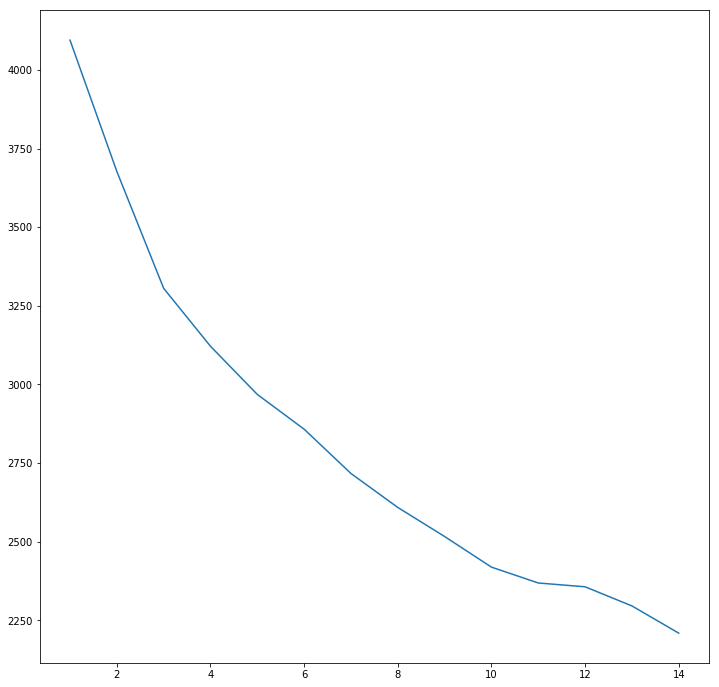

In [69]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

In [78]:
avers = []
for k in range(2,15) :
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    km.fit(X)
    y_clusters = km.labels_
    silueta_puntos= silhouette_score(X, y_clusters)
    avers.append(silueta_puntos)
avers

[0.1334599578746985,
 0.10421908702341012,
 0.09891517752652676,
 0.10149681615751224,
 0.0927079455677389,
 0.07588598939974744,
 0.08357922084658045,
 0.07482765886529266,
 0.08621245822232701,
 0.07987632421011658,
 0.08304819187882027,
 0.0699057551321508,
 0.0919264952801006]

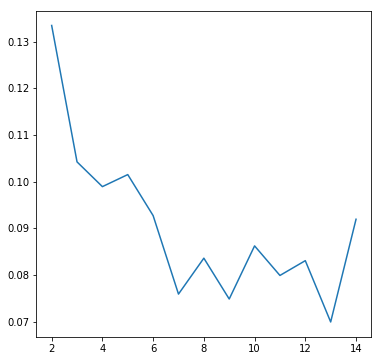

In [79]:
plt.figure(figsize=(6,6))
plt.plot(range(2, 15), avers)

Counter({0: 214, 1: 101})


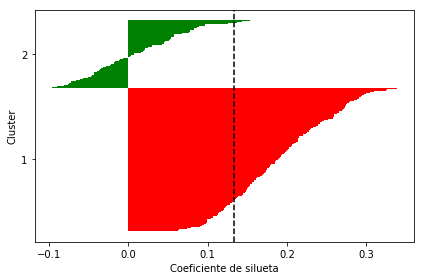

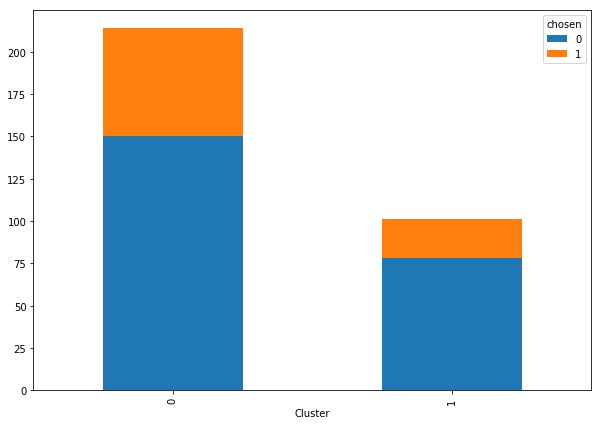

In [114]:
k=2
X_in = X.iloc[:,:-1]
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X_in)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)
print(Counter(y_clusters))

silueta_puntos= silhouette_samples(X_in, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

X_in['Cluster'] = y_clusters
X_in['chosen'] = X['chosen']

stacked = X_in.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(9,9))

(315, 13)
Counter({1: 158, 0: 151, 2: 6})
                     artist                                               song
173   Lil Hardin Armstrong                        Oriental Swing (02-2-38).mp3
174   Lil Hardin Armstrong                        Oriental Swing (02-2-38).mp3
175   Lil Hardin Armstrong                        Oriental Swing (02-2-38).mp3
151             Jamiroquai    Cloud 9.mp3                                  ...
121          Satin Jackets    Take It From Me.mp3                          ...
120          Satin Jackets    Take It From Me.mp3                          ...
[173 174 175 232 306 307]
(309, 13)
Counter({1: 132, 0: 105, 2: 72})


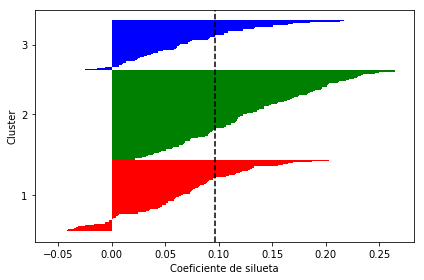

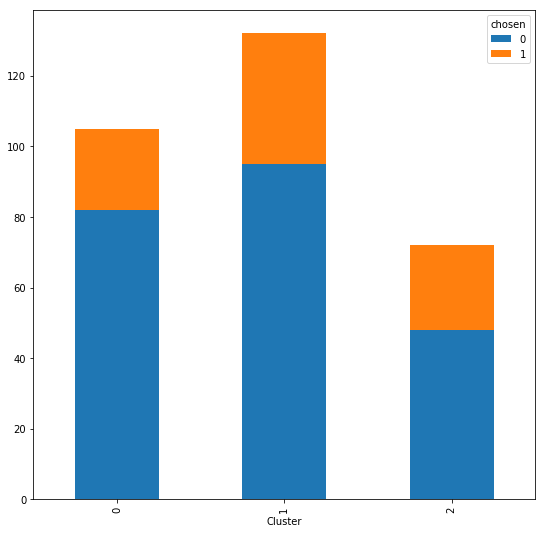

In [116]:
k=3
X_in = X.iloc[:,:-1]
print(X_in.shape)
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X_in)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)
print(Counter(y_clusters))

print(df_n_ps[0][y_clusters==2][['artist','song']])
print(np.where(y_clusters==2)[0])
X=X.drop(np.where(y_clusters==2)[0], axis=0)

X_in = X.iloc[:,:-1]
print(X_in.shape)
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X_in)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)
print(Counter(y_clusters))

silueta_puntos= silhouette_samples(X_in, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

X_in['Cluster'] = y_clusters
X_in['chosen'] = X['chosen']

stacked = X_in.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(7,7))



(315, 13)
Counter({0: 138, 2: 121, 1: 50, 3: 6})


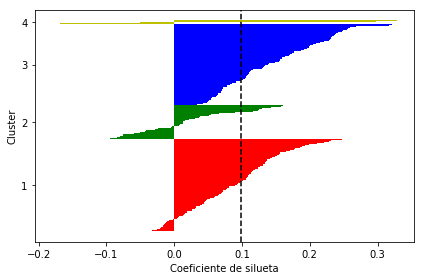

In [115]:
k=4
X_in = X.iloc[:,:-1]
print(X_in.shape)
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X_in)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

print(Counter(y_clusters))
silueta_puntos= silhouette_samples(X_in, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()


X_in['Cluster'] = y_clusters
X_in['chosen'] = X['chosen']

stacked = X_in.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(9,9))

Counter({3: 96, 4: 78, 1: 61, 2: 44, 0: 30})


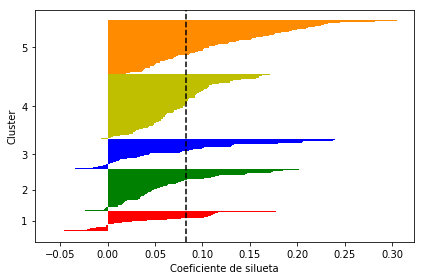

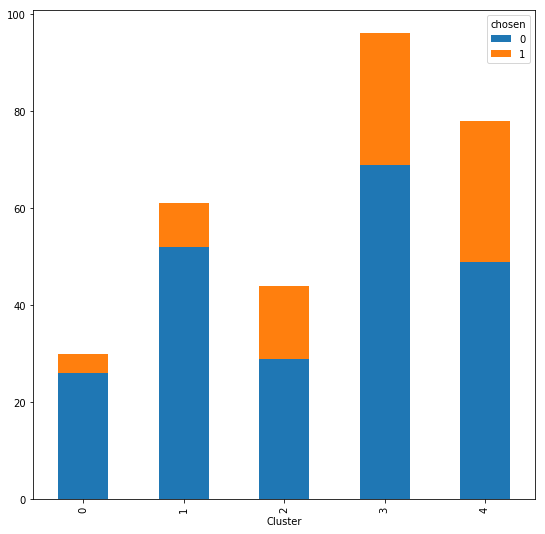

In [117]:
k=5
X_in = X.iloc[:,:-1]
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(X_in)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)
print(Counter(y_clusters))


silueta_puntos= silhouette_samples(X_in, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['red', 'g', 'b', 'y', 'darkorange']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()


X_in['Cluster'] = y_clusters
X_in['chosen'] = X['chosen']

stacked = X_in.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(9,9))

K=3

In [70]:
kmeans_mfcc = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_mfcc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [71]:
kmeans_mfcc.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [72]:
clusters_mfcc = kmeans_mfcc.predict(X)
clusters_mfcc

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [73]:
X.loc[:,'Cluster'] = clusters_mfcc
X.loc[:,'chosen'] = list(y)

In [74]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0       0.297583     1.225637    -0.367641     0.606499     0.072373   
1       0.637676    -1.507256    -1.572737    -0.954161    -0.857425   
2       2.236730    -0.319414     0.669910    -1.918119    -0.820882   
3       0.662077    -0.381499     0.111981    -1.743808    -1.317593   
4       0.736502     0.112932    -0.065024    -1.049458    -0.408043   
5       2.044945    -1.519304    -0.247242    -1.575018    -3.066163   
6      -0.163510     0.463882     0.433775     0.607952    -1.213428   
7       0.469947    -0.206445    -0.861641    -1.194743    -1.342011   
8       0.884810    -2.954758     0.310482    -0.346234    -0.339963   
9      -0.966889     1.065377    -0.166673    -0.580533     0.526040   
10      0.322674    -1.252898    -1.332613    -0.629526    -1.062802   
11     -0.198884     0.112823     0.240285     0.472717    -0.142430   
12     -0.704344     0.127023     0.716665    -0.403523    -0.515524   
13     -0.798804    -0.117919    -0.357717     0.064237    -1.152914   
14     -0.078167    -0.317301     0.539934     0.021348    -0.238394   
15      0.239636     0.763042     0.457000     0.194748    -0.448390   
16      0.593005    -0.028653     0.182359    -0.006019     0.143398   
17     -0.565089    -0.734146     0.115715     0.669649     0.299612   
18     -0.286584    -1.165487    -0.511773     0.317715     0.517783   
19     -0.493038    -0.532596     0.330444     0.672695     0.252734   
20      1.367128    -0.497386    -0.060729     0.760778    -1.140772   
21      0.073944     0.076483     0.128736     0.807417    -1.111030   
22      0.660587    -0.157368    -0.327968     0.214143    -1.218601   
23      0.629501     0.686317     0.608046    -0.676736    -0.888682   
24     -0.898063     2.104109     0.850318     1.640696     0.809305   
25     -1.139909     1.564949     0.224228     1.291732     0.521761   
26     -0.670112     0.400455     0.542697     0.702795    -0.312340   
27     -0.698001    -0.051148     0.596315    -0.686050    -0.524681   
28      0.267840     0.993382    -0.731513    -0.033601    -0.525393   
29     -1.497035    -1.682687    -2.317594    -1.006384    -1.191688   
..           ...          ...          ...          ...          ...   
285     0.054160     0.170817     0.428157    -0.173562     0.450572   
286    -0.837236    -0.153388     0.268665     1.306860     1.166541   
287     0.054272     0.092607    -0.112145     0.149520    -0.877907   
288     1.304506    -0.939417    -1.006008     1.020838    -1.215004   
289    -0.159584    -0.189562    -0.163770     0.245326    -0.612664   
290    -0.506257    -0.132656    -0.153020    -0.443656    -1.058433   
291     0.434058     0.398883     0.528841     1.249494    -0.183209   
292     0.539818     0.967349     0.496940     0.788583     0.455748   
293     0.273525    -0.141184     0.986558     0.184194    -1.414155   
294     1.757881    -0.657600    -0.123573     1.713741     0.702842   
295     1.094424    -0.403254    -0.422590     1.461920     0.799118   
296     0.456168     0.097137     0.082277     0.474571    -0.507174   
297     0.158964     1.272002    -0.348555    -0.114827    -0.295698   
298    -0.259693     1.853691     0.322474     0.273480    -0.345550   
299    -2.384686    -0.883216     0.899645     1.092020    -0.445358   
300    -1.592394    -0.161493     1.268663     1.545345    -0.785313   
301    -1.609403    -0.213622     1.375684     1.572829    -0.631037   
302     1.636269     0.260324     0.678085    -0.587416    -0.746366   
303    -0.468490     1.262367     1.213487     0.908453     0.995514   
304     0.142289     1.055504    -0.095146     0.415827     0.418496   
305     1.335436     0.402811    -1.381643    -0.110506     0.678178   
306     3.500613    -0.323410    -0.934394    -3.041308     1.822358   
307     3.518855    -0.474530    -0.626225    -2.369853     1.940903   
308    -0.475987     0.385400     0.283385   

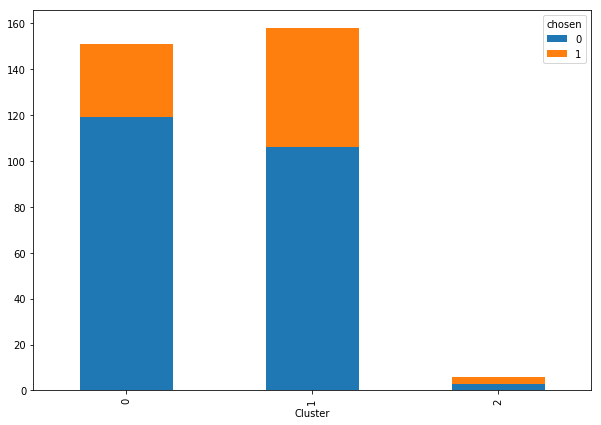

In [75]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [76]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[1]))

## Club De Banqueros y Empresarios

### ANN

In [41]:
X = df_n_ps_std_mfcc[1]

In [42]:
y = df_n_ps[1]['chosen']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [44]:
X_train.shape

(191, 13)

In [45]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [46]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [47]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [48]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

KeyboardInterrupt: 

In [49]:
grid.best_params_={'activation': 'relu', 'hidden_layer_sizes': (20, 20, 20), 'learning_rate_init': 0.009, 'max_iter': 300}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [50]:
input_tensor = Input(shape = (n0,))

In [51]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [52]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [53]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                280       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 21        
Total params: 1,141
Trainable params: 1,141
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size= 32,
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 191 samples, validate on 64 samples
Epoch 1/300
191/191 [==============================] - 0s 2ms/step - loss: 0.6708 - accuracy: 0.6754 - val_loss: 0.5829 - val_accuracy: 0.6875
Epoch 2/300
191/191 [==============================] - 0s 78us/step - loss: 0.5742 - accuracy: 0.7277 - val_loss: 0.5611 - val_accuracy: 0.6875
Epoch 3/300
191/191 [==============================] - 0s 68us/step - loss: 0.5326 - accuracy: 0.7277 - val_loss: 0.5542 - val_accuracy: 0.6875
Epoch 4/300
191/191 [==============================] - 0s 58us/step - loss: 0.4963 - accuracy: 0.7277 - val_loss: 0.5663 - val_accuracy: 0.6875
Epoch 5/300
191/191 [==============================] - 0s 63us/step - loss: 0.4595 - accuracy: 0.7277 - val_loss: 0.5789 - val_accuracy: 0.6875
Epoch 6/300
191/191 [==============================] - 0s 68us/step - loss: 0.4229 - accuracy: 0.7539 - val_loss: 0.5846 - val_accuracy: 0.7188
Epoch 7/300
191/191 [==============================] - 0s 68us/step - loss: 0.3853 - accurac

191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8458 - val_accuracy: 0.7812

Epoch 00108: ReduceLROnPlateau reducing learning rate to 1.7578124243300408e-05.
Epoch 109/300
191/191 [==============================] - 0s 89us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8459 - val_accuracy: 0.7812
Epoch 110/300
191/191 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8460 - val_accuracy: 0.7812
Epoch 111/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8461 - val_accuracy: 0.7812
Epoch 112/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8461 - val_accuracy: 0.7812
Epoch 113/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8462 - val_accuracy: 0.7812
Epoch 114/300
191/191 [==============================] -

Epoch 161/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 162/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 163/300
191/191 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 164/300
191/191 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 165/300
191/191 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 1.00 - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 166/300
191/191 [==============================] - 0s 110us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 167/300
191/191 [==============================] - 0s 94us/step - loss: 0.0

Epoch 214/300
191/191 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 215/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 216/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 217/300
191/191 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 218/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812

Epoch 00218: ReduceLROnPlateau reducing learning rate to 8.583068478174027e-09.
Epoch 219/300
191/191 [==============================] - 0s 89us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 220/300
191/191 [====================

Epoch 267/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 268/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812

Epoch 00268: ReduceLROnPlateau reducing learning rate to 2.6822088994293836e-10.
Epoch 269/300
191/191 [==============================] - 0s 115us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 270/300
191/191 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 271/300
191/191 [==============================] - 0s 94us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 272/300
191/191 [==============================] - 0s 99us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.8475 - val_accuracy: 0.7812
Epoch 273/300
191/191 [==================

range(0, 300)


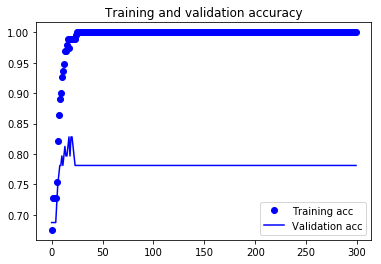

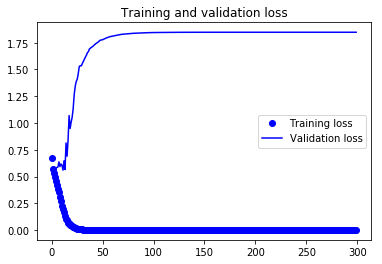

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [56]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

64/64 [==============================] - 0s 78us/step
test loss: 1.8475333452224731, test accuracy: 0.78125


In [57]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.8500000000000001


In [59]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.4285714285714286
[[41  3]
 [11  9]]


### KMeans

In [95]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0      -0.339415     0.847773     0.497198    -0.389310     1.225458   
1       0.587658    -1.195426     0.636375     0.199876     0.765321   
2       1.465595    -2.307943     0.354567    -0.058273    -1.298853   
3       0.749403    -1.690498    -0.125200    -1.016135     0.825845   
4      -0.280577     0.393332     0.744917     2.411400    -0.777421   
5      -0.158690     0.404891    -0.147920    -0.299241    -0.786974   
6       1.646777     0.772744    -1.425228    -0.562610    -1.556076   
7       1.124970     0.506236     0.738993     1.984485    -0.928706   
8       0.920059     1.438862    -2.048354     1.503567    -2.801303   
9       0.182544     0.310622     0.067722     0.870138     0.168366   
10      0.168663     0.389450     0.034360     1.213392     0.248437   
11      0.153010    -0.118336     0.639531     1.504522     0.937909   
12      0.132578     0.261966    -2.871493    -3.398160    -0.256458   
13      1.094629     0.885150    -1.130672    -0.083270     0.672482   
14      0.771472     0.364448    -0.454696     0.434253     0.912699   
15      0.677561     0.166795     0.746471     0.075191     0.867924   
16     -0.032353     1.227345    -0.188580     0.927210     0.016663   
17      0.459031     1.258961    -0.329412     1.391790    -0.208888   
18     -0.359172     0.051214    -0.603962     0.778896     1.630471   
19      0.209859    -0.615399    -0.676895     0.735655     0.805509   
20      0.127381    -0.265099    -0.258801    -0.127568     0.649447   
21      1.222717     0.409860     1.311826     0.703873     0.322062   
22      1.173352     0.490500     0.742825    -0.028159    -0.272396   
23      1.069960     0.858822    -0.795544     0.076688     0.851875   
24      0.581377    -0.804045     0.399887     1.535671     0.245878   
25      0.161110     0.025075     0.716318     1.532230     0.889883   
26      0.431443     0.442713     0.259120     0.045533     0.102675   
27      0.344525    -1.140315    -0.725453    -0.547965     0.449924   
28     -0.041565     0.671274     0.195143     0.247294     0.531620   
29      0.417845    -1.134173    -0.760709    -0.605264     0.077464   
..           ...          ...          ...          ...          ...   
225     1.532114    -1.060006    -0.434145    -0.999435    -1.259462   
226    -0.942320     1.172080     0.506725    -0.230675    -0.104635   
227     1.421974     0.631029    -0.563813    -0.694595    -0.673270   
228    -1.473385    -0.806223     1.849423    -1.252541     0.941013   
229    -1.135926    -0.772372     1.164844    -1.022517     0.630202   
230    -1.085049     0.879566     0.442593     0.128917     0.393498   
231    -0.352258     0.556982     0.530520     0.443818     0.300921   
232    -1.190363     0.797356     0.758472     0.587917     0.890540   
233    -0.651003    -0.586618     1.326854    -0.451354     0.507113   
234    -1.459511    -0.516281     1.631699    -1.141842     0.584621   
235    -0.726984     0.702447     0.798069    -0.320660     0.530902   
236    -0.300986    -0.404923     0.715406     0.245380    -0.427936   
237    -0.736244     0.088611     0.910051     0.437100     0.258256   
238     0.610473    -2.664315     1.303652    -2.022376     1.500032   
239    -2.045424    -2.954642     0.302601    -0.868092    -1.038134   
240     0.329793    -1.367570    -1.454329    -0.207924    -0.723609   
241    -1.919591     1.382172    -0.134161     0.837967    -0.687780   
242    -2.087669     1.400006    -0.494964     0.451717    -0.759188   
243    -2.131652     0.439305    -0.612226     0.854126    -0.494550   
244    -1.611989    -0.756403    -0.410917     1.075909     0.297336   
245    -0.142010     0.000190    -0.063461    -0.506353    -0.386942   
246    -1.263975    -1.168117    -1.396090    -0.312016     1.862268   
247    -0.507700     0.899825     1.510153     1.083642     2.081451   
248    -0.159768     0.518093     2.197018   

In [96]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[3315.0,
 2972.7888695817974,
 2748.18187155972,
 2544.9420084212106,
 2413.687059384553,
 2278.037996783226,
 2213.3487507256823,
 2123.4282707474663,
 2067.8299633414163,
 1977.777252698108,
 1956.5229777214513,
 1880.0296166971755,
 1815.5096049846275,
 1785.9955747862728]

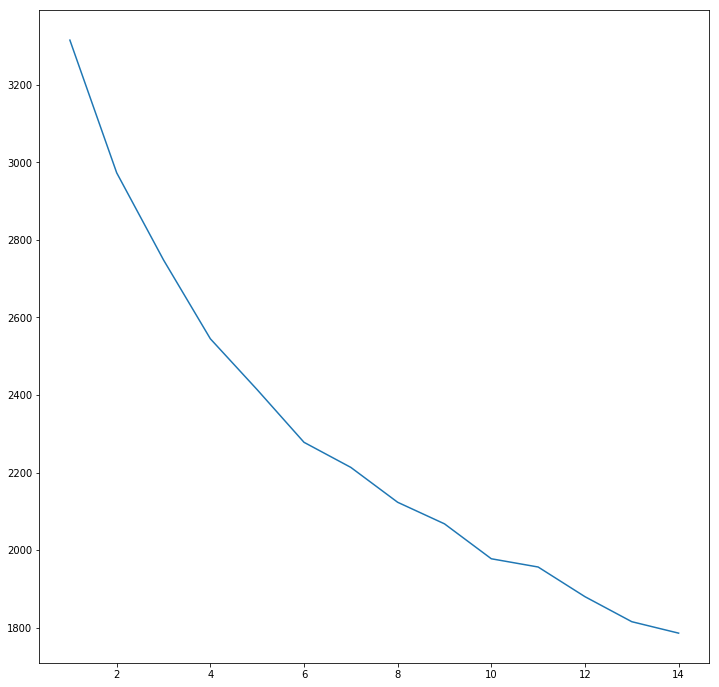

In [97]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=6

In [98]:
kmeans_mfcc = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans_mfcc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [99]:
kmeans_mfcc.labels_

array([4, 2, 2, 2, 0, 1, 1, 0, 1, 4, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 0,
       0, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 1, 3, 1, 4, 4, 3, 1, 1, 1, 4, 4,
       2, 1, 1, 1, 4, 1, 1, 1, 4, 3, 3, 4, 4, 1, 4, 1, 0, 4, 4, 4, 3, 3,
       3, 4, 3, 0, 4, 2, 1, 4, 0, 4, 4, 3, 3, 0, 0, 2, 1, 4, 1, 0, 0, 3,
       4, 1, 4, 4, 4, 4, 1, 1, 0, 3, 3, 3, 4, 1, 1, 4, 1, 4, 0, 3, 1, 1,
       1, 0, 3, 2, 4, 4, 0, 1, 5, 3, 4, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       4, 4, 0, 0, 2, 2, 2, 4, 4, 4, 2, 2, 2, 3, 0, 4, 1, 3, 3, 3, 3, 3,
       4, 3, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 3, 0, 1, 0, 0, 0, 0, 1, 3, 2,
       4, 4, 1, 2, 4, 3, 2, 3, 4, 4, 4, 1, 2, 3, 3, 0, 2, 2, 2, 1, 0, 1,
       4, 2, 0, 4, 3, 3, 2, 3, 5, 5, 2, 3, 3, 2, 0, 3, 0, 2, 4, 2, 1, 2,
       1, 3, 4, 4, 4, 1, 0, 1, 2, 2, 3, 0, 4, 2, 2, 4, 0, 2, 2, 2, 1, 3,
       4, 4, 2, 2, 2, 4, 0, 0, 2, 2, 2, 2, 2])

In [100]:
clusters_mfcc = kmeans_mfcc.predict(X)
clusters_mfcc

array([4, 2, 2, 2, 0, 1, 1, 0, 1, 4, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 0,
       0, 4, 4, 4, 4, 3, 4, 3, 4, 4, 3, 1, 3, 1, 4, 4, 3, 1, 1, 1, 4, 4,
       2, 1, 1, 1, 4, 1, 1, 1, 4, 3, 3, 4, 4, 1, 4, 1, 0, 4, 4, 4, 3, 3,
       3, 4, 3, 0, 4, 2, 1, 4, 0, 4, 4, 3, 3, 0, 0, 2, 1, 4, 1, 0, 0, 3,
       4, 1, 4, 4, 4, 4, 1, 1, 0, 3, 3, 3, 4, 1, 1, 4, 1, 4, 0, 3, 1, 1,
       1, 0, 3, 2, 4, 4, 0, 1, 5, 3, 4, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       4, 4, 0, 0, 2, 2, 2, 4, 4, 4, 2, 2, 2, 3, 0, 4, 1, 3, 3, 3, 3, 3,
       4, 3, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 3, 0, 1, 0, 0, 0, 0, 1, 3, 2,
       4, 4, 1, 2, 4, 3, 2, 3, 4, 4, 4, 1, 2, 3, 3, 0, 2, 2, 2, 1, 0, 1,
       4, 2, 0, 4, 3, 3, 2, 3, 5, 5, 2, 3, 3, 2, 0, 3, 0, 2, 4, 2, 1, 2,
       1, 3, 4, 4, 4, 1, 0, 1, 2, 2, 3, 0, 4, 2, 2, 4, 0, 2, 2, 2, 1, 3,
       4, 4, 2, 2, 2, 4, 0, 0, 2, 2, 2, 2, 2])

In [101]:
X.loc[:,'Cluster'] = clusters_mfcc
X.loc[:,'chosen'] = list(y)

In [102]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0      -0.339415     0.847773     0.497198    -0.389310     1.225458   
1       0.587658    -1.195426     0.636375     0.199876     0.765321   
2       1.465595    -2.307943     0.354567    -0.058273    -1.298853   
3       0.749403    -1.690498    -0.125200    -1.016135     0.825845   
4      -0.280577     0.393332     0.744917     2.411400    -0.777421   
5      -0.158690     0.404891    -0.147920    -0.299241    -0.786974   
6       1.646777     0.772744    -1.425228    -0.562610    -1.556076   
7       1.124970     0.506236     0.738993     1.984485    -0.928706   
8       0.920059     1.438862    -2.048354     1.503567    -2.801303   
9       0.182544     0.310622     0.067722     0.870138     0.168366   
10      0.168663     0.389450     0.034360     1.213392     0.248437   
11      0.153010    -0.118336     0.639531     1.504522     0.937909   
12      0.132578     0.261966    -2.871493    -3.398160    -0.256458   
13      1.094629     0.885150    -1.130672    -0.083270     0.672482   
14      0.771472     0.364448    -0.454696     0.434253     0.912699   
15      0.677561     0.166795     0.746471     0.075191     0.867924   
16     -0.032353     1.227345    -0.188580     0.927210     0.016663   
17      0.459031     1.258961    -0.329412     1.391790    -0.208888   
18     -0.359172     0.051214    -0.603962     0.778896     1.630471   
19      0.209859    -0.615399    -0.676895     0.735655     0.805509   
20      0.127381    -0.265099    -0.258801    -0.127568     0.649447   
21      1.222717     0.409860     1.311826     0.703873     0.322062   
22      1.173352     0.490500     0.742825    -0.028159    -0.272396   
23      1.069960     0.858822    -0.795544     0.076688     0.851875   
24      0.581377    -0.804045     0.399887     1.535671     0.245878   
25      0.161110     0.025075     0.716318     1.532230     0.889883   
26      0.431443     0.442713     0.259120     0.045533     0.102675   
27      0.344525    -1.140315    -0.725453    -0.547965     0.449924   
28     -0.041565     0.671274     0.195143     0.247294     0.531620   
29      0.417845    -1.134173    -0.760709    -0.605264     0.077464   
..           ...          ...          ...          ...          ...   
225     1.532114    -1.060006    -0.434145    -0.999435    -1.259462   
226    -0.942320     1.172080     0.506725    -0.230675    -0.104635   
227     1.421974     0.631029    -0.563813    -0.694595    -0.673270   
228    -1.473385    -0.806223     1.849423    -1.252541     0.941013   
229    -1.135926    -0.772372     1.164844    -1.022517     0.630202   
230    -1.085049     0.879566     0.442593     0.128917     0.393498   
231    -0.352258     0.556982     0.530520     0.443818     0.300921   
232    -1.190363     0.797356     0.758472     0.587917     0.890540   
233    -0.651003    -0.586618     1.326854    -0.451354     0.507113   
234    -1.459511    -0.516281     1.631699    -1.141842     0.584621   
235    -0.726984     0.702447     0.798069    -0.320660     0.530902   
236    -0.300986    -0.404923     0.715406     0.245380    -0.427936   
237    -0.736244     0.088611     0.910051     0.437100     0.258256   
238     0.610473    -2.664315     1.303652    -2.022376     1.500032   
239    -2.045424    -2.954642     0.302601    -0.868092    -1.038134   
240     0.329793    -1.367570    -1.454329    -0.207924    -0.723609   
241    -1.919591     1.382172    -0.134161     0.837967    -0.687780   
242    -2.087669     1.400006    -0.494964     0.451717    -0.759188   
243    -2.131652     0.439305    -0.612226     0.854126    -0.494550   
244    -1.611989    -0.756403    -0.410917     1.075909     0.297336   
245    -0.142010     0.000190    -0.063461    -0.506353    -0.386942   
246    -1.263975    -1.168117    -1.396090    -0.312016     1.862268   
247    -0.507700     0.899825     1.510153     1.083642     2.081451   
248    -0.159768     0.518093     2.197018   

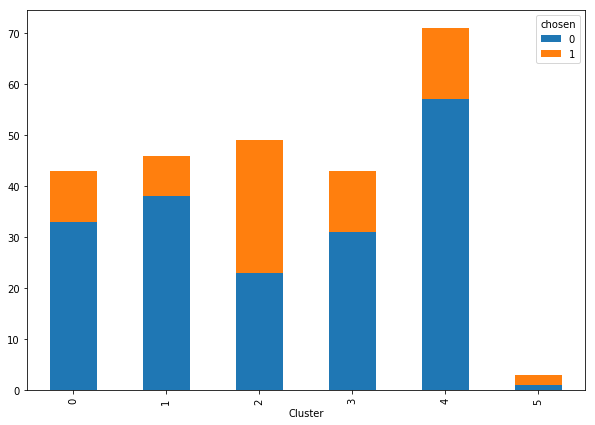

In [103]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [104]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[2]))

## Gramma

### ANN

In [60]:
X = df_n_ps_std_mfcc[2]

In [61]:
y = df_n_ps[2]['chosen']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [63]:
X_train.shape

(162, 13)

In [64]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [65]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [66]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [112]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (30, 30, 30), 'learning_rate_init': 0.007, 'max_iter': 10}, que permiten obtener un Accuracy de 74.07% y un Kappa del 19.05
Tiempo total: 24.44 minutos


In [69]:
grid.best_params_={'activation': 'relu', 'hidden_layer_sizes': (30, 30, 30), 'learning_rate_init': 0.007, 'max_iter': 10}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [70]:
input_tensor = Input(shape = (n0,))

In [71]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [72]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [73]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_10 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 2,311
Trainable params: 2,311
Non-trainable params: 0
_________________________________________________________________


In [74]:
print(epochs)

10


In [75]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), batch_size= 32,
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 162 samples, validate on 54 samples
Epoch 1/10
162/162 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.7099 - val_loss: 0.6409 - val_accuracy: 0.6481
Epoch 2/10
162/162 [==============================] - 0s 80us/step - loss: 0.5585 - accuracy: 0.7284 - val_loss: 0.6599 - val_accuracy: 0.6481
Epoch 3/10
162/162 [==============================] - 0s 86us/step - loss: 0.4944 - accuracy: 0.7284 - val_loss: 0.6361 - val_accuracy: 0.6481
Epoch 4/10
162/162 [==============================] - 0s 86us/step - loss: 0.4378 - accuracy: 0.7593 - val_loss: 0.6635 - val_accuracy: 0.6481
Epoch 5/10
162/162 [==============================] - 0s 74us/step - loss: 0.3908 - accuracy: 0.7963 - val_loss: 0.7111 - val_accuracy: 0.7037
Epoch 6/10
162/162 [==============================] - 0s 68us/step - loss: 0.3391 - accuracy: 0.8457 - val_loss: 0.7251 - val_accuracy: 0.6296
Epoch 7/10
162/162 [==============================] - 0s 74us/step - loss: 0.3227 - accuracy: 0.84

range(0, 10)


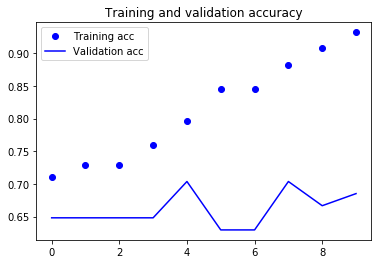

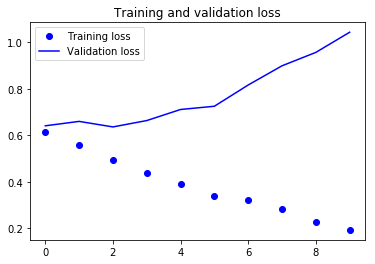

In [76]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [77]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

54/54 [==============================] - 0s 56us/step
test loss: 1.043857611991741, test accuracy: 0.6851851940155029


In [78]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.6706766917293233


In [79]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.20450606585788578
[[32  3]
 [14  5]]


### KMeans

In [123]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0      -0.674917     0.169246     0.673543     1.157142    -0.633186   
1       0.277269     0.514176     0.200398     0.988939    -1.756594   
2       1.483921     0.724793     0.473099     0.439577    -0.358096   
3      -0.734008    -0.683844    -0.764866    -0.225060    -0.261235   
4      -0.834815    -0.735908    -1.177596    -0.093532     0.508050   
5      -1.113858     2.313247     2.338424     0.540760     1.997911   
6      -0.049155     1.019548     1.191337     0.701078     0.841417   
7      -1.022436     0.622744     0.627286     0.206854     0.789895   
8      -0.346421     0.521689    -0.035458    -0.183181     1.029652   
9      -0.590254     0.458662     1.067949    -0.147777     0.785110   
10      0.067247     0.223802     1.376567    -0.118221     1.654318   
11     -0.662803    -0.425347    -0.906661     0.641527    -1.157491   
12      0.207925     1.931905    -1.974903    -2.568754    -2.569685   
13     -1.789427    -0.891205     0.045638     1.194730     1.102294   
14     -0.780900     0.459108    -0.495743     1.223096     0.707236   
15     -1.034563     1.536681     1.491041     0.109475     0.271871   
16     -0.381346     2.241723     0.083946    -1.446368    -0.665699   
17     -0.011403    -0.783092     0.665912    -0.882711     0.950063   
18     -1.617916     0.548468     0.040068     0.021068     0.781017   
19     -0.537412     0.128348     0.610943    -0.633727     0.907081   
20      0.636803     0.760531    -0.118083     0.109273    -0.805302   
21      0.550926     0.936063    -0.865446     0.365123     0.084843   
22      0.000462     0.578434    -0.015217     0.442323    -0.153009   
23      0.083874    -0.293534    -0.485861     0.412663    -0.162491   
24      0.908136     0.233711    -1.075967     0.843554     1.180479   
25      0.265049     0.397559     0.003810     1.195218    -0.144563   
26      0.419617     0.219257    -1.249181    -0.589066     0.167388   
27     -0.407925    -0.502431    -2.226256    -1.581302    -0.733748   
28     -0.250483    -2.083167    -1.449789    -0.233210    -1.132840   
29     -1.146888     1.617561     0.885685     2.161755     0.393283   
..           ...          ...          ...          ...          ...   
186    -1.007290    -0.872850    -0.374124    -0.254709    -1.117777   
187    -0.285121     0.118211     0.478011     0.861493    -1.780510   
188     0.467571    -1.645745    -0.541507    -1.435183    -0.639321   
189    -0.071747    -1.954799    -0.239393    -1.169079    -0.773953   
190     0.406083    -2.324572     1.268557    -1.773164     0.220142   
191    -0.781221     1.062669     1.057162     0.149736    -0.636136   
192     0.471597     2.019680     2.368481    -1.171548    -2.104846   
193    -0.786022    -0.229684     0.421340    -0.309174    -0.311318   
194     0.071267    -0.794887     0.430112     0.394775    -0.746468   
195    -0.430296    -0.963686    -0.372758     0.074908    -1.551444   
196    -0.295903    -1.246841    -0.389881     0.186413    -0.827904   
197     0.479442    -2.526563    -2.233640    -1.311649    -0.114249   
198    -0.472461    -0.316221    -2.118686    -0.390396    -0.247602   
199    -0.006912    -1.450305    -0.125795    -1.995008    -1.440314   
200    -1.045376     0.843938    -1.177992    -1.026041    -0.442183   
201    -1.160197     0.899099    -1.084036    -0.745060    -0.704154   
202     0.846379    -0.292164    -2.285100    -0.590310    -1.342705   
203     0.365059    -0.089335    -0.757014    -0.150651     0.520638   
204     1.230293     1.978904     0.273786    -0.096460     0.345688   
205    -0.042146     0.277253     0.012741    -0.226784    -0.676665   
206    -0.520687    -0.536310     0.241607    -0.135026     0.085343   
207    -0.563298    -0.749857     0.723480     0.034849     0.249757   
208     0.959455    -2.318903    -0.452832    -0.892660    -1.054730   
209    -0.388117     0.504159     0.113071   

In [124]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[2808.0,
 2521.584040394968,
 2363.9652951918915,
 2235.4561240552457,
 2121.3700883394513,
 2055.378171433382,
 1978.4853026183964,
 1920.0476199123686,
 1870.5957280462892,
 1801.6400494660393,
 1755.8728853091284,
 1733.9521869345613,
 1708.3667929415192,
 1622.6522007070782]

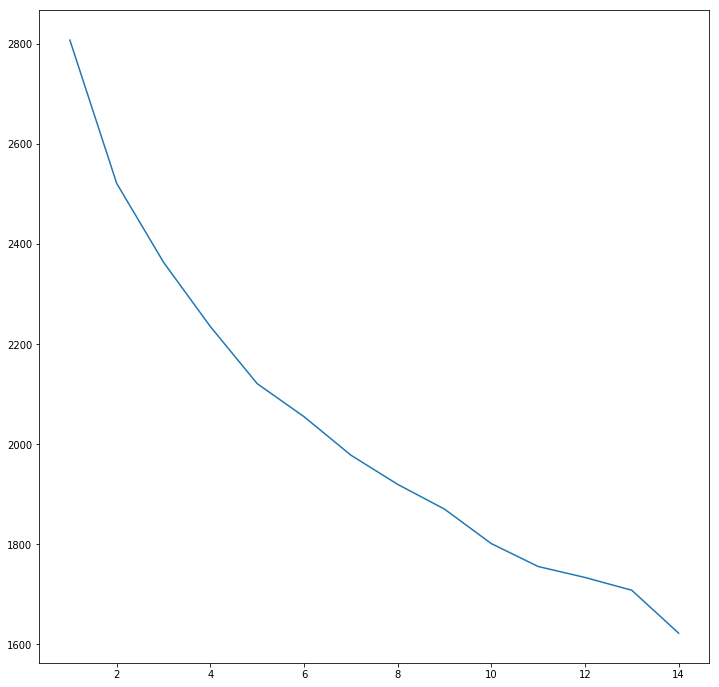

In [125]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [126]:
kmeans_mfcc = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_mfcc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [127]:
kmeans_mfcc.labels_

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [128]:
clusters_mfcc = kmeans_mfcc.predict(X)
clusters_mfcc

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [129]:
X.loc[:,'Cluster'] = clusters_mfcc
X.loc[:,'chosen'] = list(y)

In [130]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0      -0.674917     0.169246     0.673543     1.157142    -0.633186   
1       0.277269     0.514176     0.200398     0.988939    -1.756594   
2       1.483921     0.724793     0.473099     0.439577    -0.358096   
3      -0.734008    -0.683844    -0.764866    -0.225060    -0.261235   
4      -0.834815    -0.735908    -1.177596    -0.093532     0.508050   
5      -1.113858     2.313247     2.338424     0.540760     1.997911   
6      -0.049155     1.019548     1.191337     0.701078     0.841417   
7      -1.022436     0.622744     0.627286     0.206854     0.789895   
8      -0.346421     0.521689    -0.035458    -0.183181     1.029652   
9      -0.590254     0.458662     1.067949    -0.147777     0.785110   
10      0.067247     0.223802     1.376567    -0.118221     1.654318   
11     -0.662803    -0.425347    -0.906661     0.641527    -1.157491   
12      0.207925     1.931905    -1.974903    -2.568754    -2.569685   
13     -1.789427    -0.891205     0.045638     1.194730     1.102294   
14     -0.780900     0.459108    -0.495743     1.223096     0.707236   
15     -1.034563     1.536681     1.491041     0.109475     0.271871   
16     -0.381346     2.241723     0.083946    -1.446368    -0.665699   
17     -0.011403    -0.783092     0.665912    -0.882711     0.950063   
18     -1.617916     0.548468     0.040068     0.021068     0.781017   
19     -0.537412     0.128348     0.610943    -0.633727     0.907081   
20      0.636803     0.760531    -0.118083     0.109273    -0.805302   
21      0.550926     0.936063    -0.865446     0.365123     0.084843   
22      0.000462     0.578434    -0.015217     0.442323    -0.153009   
23      0.083874    -0.293534    -0.485861     0.412663    -0.162491   
24      0.908136     0.233711    -1.075967     0.843554     1.180479   
25      0.265049     0.397559     0.003810     1.195218    -0.144563   
26      0.419617     0.219257    -1.249181    -0.589066     0.167388   
27     -0.407925    -0.502431    -2.226256    -1.581302    -0.733748   
28     -0.250483    -2.083167    -1.449789    -0.233210    -1.132840   
29     -1.146888     1.617561     0.885685     2.161755     0.393283   
..           ...          ...          ...          ...          ...   
186    -1.007290    -0.872850    -0.374124    -0.254709    -1.117777   
187    -0.285121     0.118211     0.478011     0.861493    -1.780510   
188     0.467571    -1.645745    -0.541507    -1.435183    -0.639321   
189    -0.071747    -1.954799    -0.239393    -1.169079    -0.773953   
190     0.406083    -2.324572     1.268557    -1.773164     0.220142   
191    -0.781221     1.062669     1.057162     0.149736    -0.636136   
192     0.471597     2.019680     2.368481    -1.171548    -2.104846   
193    -0.786022    -0.229684     0.421340    -0.309174    -0.311318   
194     0.071267    -0.794887     0.430112     0.394775    -0.746468   
195    -0.430296    -0.963686    -0.372758     0.074908    -1.551444   
196    -0.295903    -1.246841    -0.389881     0.186413    -0.827904   
197     0.479442    -2.526563    -2.233640    -1.311649    -0.114249   
198    -0.472461    -0.316221    -2.118686    -0.390396    -0.247602   
199    -0.006912    -1.450305    -0.125795    -1.995008    -1.440314   
200    -1.045376     0.843938    -1.177992    -1.026041    -0.442183   
201    -1.160197     0.899099    -1.084036    -0.745060    -0.704154   
202     0.846379    -0.292164    -2.285100    -0.590310    -1.342705   
203     0.365059    -0.089335    -0.757014    -0.150651     0.520638   
204     1.230293     1.978904     0.273786    -0.096460     0.345688   
205    -0.042146     0.277253     0.012741    -0.226784    -0.676665   
206    -0.520687    -0.536310     0.241607    -0.135026     0.085343   
207    -0.563298    -0.749857     0.723480     0.034849     0.249757   
208     0.959455    -2.318903    -0.452832    -0.892660    -1.054730   
209    -0.388117     0.504159     0.113071   

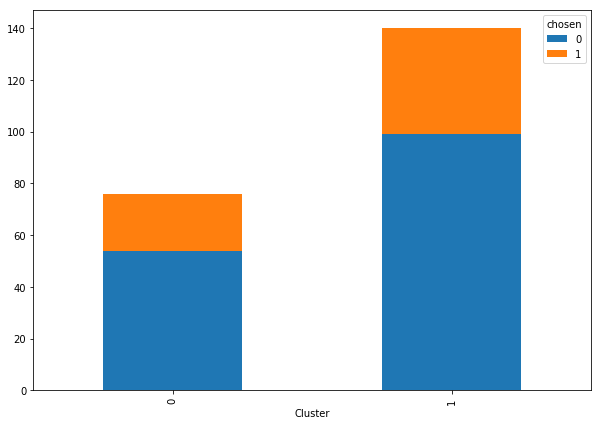

In [131]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [132]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[3]))

## Hotel Marrakech

### ANN

In [80]:
X = df_n_ps_std_mfcc[3]

In [81]:
y = df_n_ps[3]['chosen']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [83]:
X_train.shape

(108, 13)

In [84]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [85]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [86]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [140]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.004, 'max_iter': 100}, que permiten obtener un Accuracy de 83.33% y un Kappa del 63.49
Tiempo total: 20.45 minutos


In [87]:
grid.best_params_={'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.004, 'max_iter': 100}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [88]:
input_tensor = Input(shape = (n0,))

In [89]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [90]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [91]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 20)                280       
_________________________________________________________________
dense_13 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 108 samples, validate on 36 samples
Epoch 1/100
108/108 [==============================] - 0s 1ms/step - loss: 0.8313 - accuracy: 0.4259 - val_loss: 0.8155 - val_accuracy: 0.4444
Epoch 2/100
108/108 [==============================] - 0s 111us/step - loss: 0.7307 - accuracy: 0.4630 - val_loss: 0.7477 - val_accuracy: 0.4444
Epoch 3/100
108/108 [==============================] - 0s 93us/step - loss: 0.6711 - accuracy: 0.5648 - val_loss: 0.7059 - val_accuracy: 0.5000
Epoch 4/100
108/108 [==============================] - 0s 83us/step - loss: 0.6324 - accuracy: 0.6852 - val_loss: 0.6815 - val_accuracy: 0.4722
Epoch 5/100
108/108 [==============================] - 0s 93us/step - loss: 0.6061 - accuracy: 0.6944 - val_loss: 0.6654 - val_accuracy: 0.5556
Epoch 6/100
108/108 [==============================] - 0s 102us/step - loss: 0.5839 - accuracy: 0.7315 - val_loss: 0.6534 - val_accuracy: 0.5833
Epoch 7/100
108/108 [==============================] - 0s 93us/step - loss: 0.5622 - accur

Epoch 55/100
108/108 [==============================] - 0s 130us/step - loss: 0.1612 - accuracy: 0.9722 - val_loss: 0.6804 - val_accuracy: 0.6944
Epoch 56/100
108/108 [==============================] - 0s 111us/step - loss: 0.1606 - accuracy: 0.9722 - val_loss: 0.6819 - val_accuracy: 0.6944
Epoch 57/100
108/108 [==============================] - 0s 83us/step - loss: 0.1600 - accuracy: 0.9722 - val_loss: 0.6833 - val_accuracy: 0.6944
Epoch 58/100
108/108 [==============================] - 0s 93us/step - loss: 0.1594 - accuracy: 0.9722 - val_loss: 0.6844 - val_accuracy: 0.6944
Epoch 59/100
108/108 [==============================] - 0s 102us/step - loss: 0.1587 - accuracy: 0.9722 - val_loss: 0.6850 - val_accuracy: 0.6944
Epoch 60/100
108/108 [==============================] - 0s 102us/step - loss: 0.1580 - accuracy: 0.9722 - val_loss: 0.6856 - val_accuracy: 0.6944
Epoch 61/100
108/108 [==============================] - 0s 111us/step - loss: 0.1574 - accuracy: 0.9722 - val_loss: 0.6854 - v

range(0, 100)


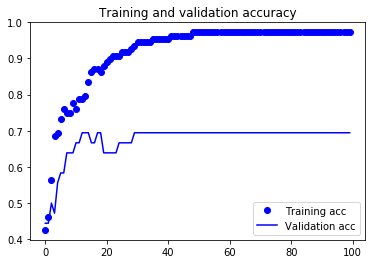

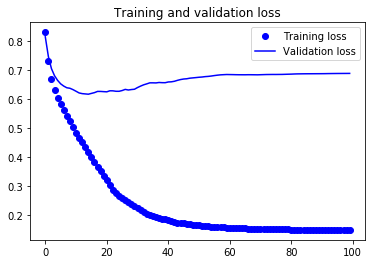

In [93]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [94]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

36/36 [==============================] - 0s 83us/step
test loss: 0.6894227663675944, test accuracy: 0.6944444179534912


In [95]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.7725752508361204


In [96]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.38888888888888884
[[15  8]
 [ 3 10]]


### KMeans

In [151]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0       0.221235     1.617887     0.929874    -0.231486    -0.525862   
1       0.836735    -0.529605    -1.268139    -0.791053     0.815880   
2      -0.190995     1.202756     0.050028    -2.631154     3.701544   
3       0.521202     1.354284     1.423683    -0.634173     0.934734   
4       0.250234     1.586078    -1.791096     0.127156     1.573000   
5       0.333238    -0.983017    -1.253129    -0.703445    -0.390741   
6       0.124335    -1.665835    -2.227171    -0.835611     0.574827   
7      -0.874325    -0.031806     0.246893     0.344556     0.649466   
8       0.326792    -0.610166    -0.550927    -0.576489    -0.918038   
9      -1.469326     0.426500     2.520170     1.045079    -0.410299   
10     -1.602658    -1.245330    -1.650120     1.696521    -0.387907   
11     -1.820295    -1.526937    -1.324778     2.559842    -0.126763   
12     -0.764909     0.894911     0.268560    -0.209448    -0.230305   
13     -2.021592    -0.256925     0.107447     0.355253     1.242070   
14     -0.561508     0.034689    -0.118674     0.135424    -0.766656   
15      1.081988     0.945357    -0.230748     0.314322     0.133962   
16      0.341450     3.113983     0.419314     1.087397     2.159626   
17     -0.465680     0.048325    -1.647951    -1.343412     0.783737   
18     -0.518957    -0.205911    -0.935801    -0.519162     0.488287   
19      0.065304     0.074045     0.004340     0.740126     0.742134   
20     -0.383757     0.437022     0.907339     0.842096     1.161748   
21      0.558290     1.010237    -0.882410    -0.313261    -1.108460   
22      0.470380    -0.322318    -1.191863    -0.092570     0.408703   
23      0.594195     0.466425    -1.651421    -1.153236    -2.163553   
24     -0.294279    -0.469828    -0.506281     0.553411    -0.002394   
25     -0.044753     0.008070     0.124675     0.401165    -1.495260   
26     -0.361795    -0.336369    -1.184798     0.051223     0.460059   
27      0.842916     0.418905    -0.554491     0.388861     1.276091   
28     -1.213666     1.250188    -1.066058    -0.663600     1.489036   
29     -1.003139     0.015927    -0.366063     0.248303     0.256190   
..           ...          ...          ...          ...          ...   
114     0.145143    -1.087536    -0.109574     1.182367    -0.234880   
115    -1.711163    -0.746315    -0.531486    -0.426122     0.265388   
116     0.392290     1.069548    -0.306184     0.145336    -0.217734   
117     0.935840     0.716917     0.007000     0.627264     0.191403   
118     0.197008     0.584804    -0.002674     0.755814     0.284618   
119     2.405490    -0.155599     0.811293     1.347936     0.825563   
120     0.715503     0.871839     0.292274     0.271363    -0.696526   
121     2.417611     0.241031     1.233666     0.460035     0.057428   
122    -0.318929    -0.810559    -0.844588     0.201697    -0.001562   
123     0.103167    -0.475246     0.116339    -0.525138    -0.644659   
124    -0.094617    -0.605067    -0.742357     0.268847     0.524751   
125    -1.595914    -0.979410    -0.416646     0.594734    -0.542828   
126    -1.902096    -0.148093    -0.337830    -0.273661    -0.493964   
127    -1.605568    -0.554121     0.460876     1.019950    -0.718272   
128     0.566475    -0.266552    -0.411015    -1.148969     0.130007   
129     0.526340    -0.028603    -0.164620    -1.269989     0.446406   
130    -0.506596    -0.917555     0.022348    -2.928480    -0.397810   
131     0.241077     0.331430    -0.183360     0.450777     1.050602   
132     0.384872     0.341763     0.211728    -0.437357     1.099689   
133     0.926004    -0.715730     0.121647    -0.799985    -1.043066   
134     0.108168    -0.201129    -0.571770    -0.710757    -0.229892   
135    -0.243379     0.039038    -0.185527     0.341086     0.733620   
136     1.306831     0.220282    -0.386785    -1.153056     1.946157   
137     1.247354     0.605285    -0.077094   

In [152]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[1872.0,
 1679.2968315149515,
 1550.7545737855435,
 1446.6172108036508,
 1373.1093324372473,
 1322.1800157528337,
 1260.9432250958696,
 1220.6940995550194,
 1171.7851814633127,
 1127.850987607133,
 1106.05463123734,
 1024.1042711193513,
 1004.7449935321633,
 976.292238260163]

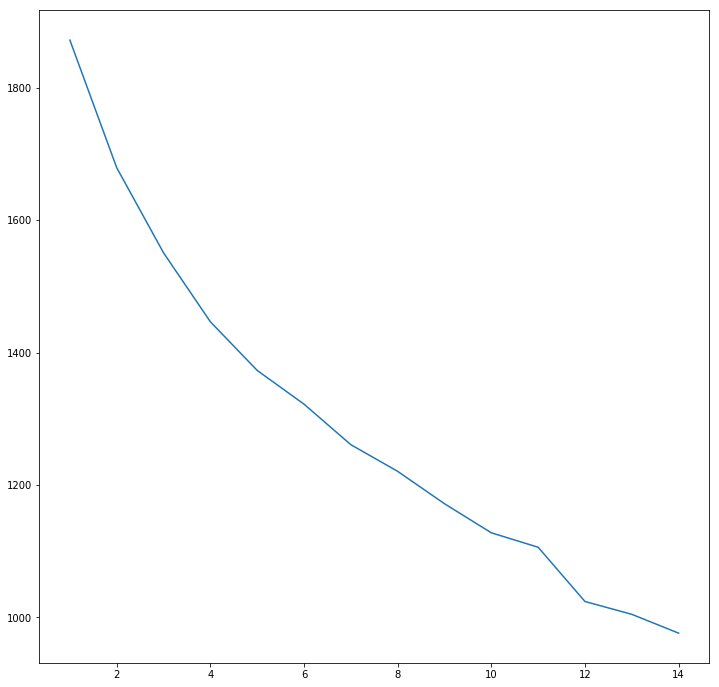

In [153]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=3

In [154]:
kmeans_mfcc = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_mfcc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [155]:
kmeans_mfcc.labels_

array([2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2,
       2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1])

In [156]:
clusters_mfcc = kmeans_mfcc.predict(X)
clusters_mfcc

array([2, 0, 0, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 0, 2, 2, 0, 1, 2, 2, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 2,
       2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1])

In [157]:
X.loc[:,'Cluster'] = clusters_mfcc
X.loc[:,'chosen'] = list(y)

In [158]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0       0.221235     1.617887     0.929874    -0.231486    -0.525862   
1       0.836735    -0.529605    -1.268139    -0.791053     0.815880   
2      -0.190995     1.202756     0.050028    -2.631154     3.701544   
3       0.521202     1.354284     1.423683    -0.634173     0.934734   
4       0.250234     1.586078    -1.791096     0.127156     1.573000   
5       0.333238    -0.983017    -1.253129    -0.703445    -0.390741   
6       0.124335    -1.665835    -2.227171    -0.835611     0.574827   
7      -0.874325    -0.031806     0.246893     0.344556     0.649466   
8       0.326792    -0.610166    -0.550927    -0.576489    -0.918038   
9      -1.469326     0.426500     2.520170     1.045079    -0.410299   
10     -1.602658    -1.245330    -1.650120     1.696521    -0.387907   
11     -1.820295    -1.526937    -1.324778     2.559842    -0.126763   
12     -0.764909     0.894911     0.268560    -0.209448    -0.230305   
13     -2.021592    -0.256925     0.107447     0.355253     1.242070   
14     -0.561508     0.034689    -0.118674     0.135424    -0.766656   
15      1.081988     0.945357    -0.230748     0.314322     0.133962   
16      0.341450     3.113983     0.419314     1.087397     2.159626   
17     -0.465680     0.048325    -1.647951    -1.343412     0.783737   
18     -0.518957    -0.205911    -0.935801    -0.519162     0.488287   
19      0.065304     0.074045     0.004340     0.740126     0.742134   
20     -0.383757     0.437022     0.907339     0.842096     1.161748   
21      0.558290     1.010237    -0.882410    -0.313261    -1.108460   
22      0.470380    -0.322318    -1.191863    -0.092570     0.408703   
23      0.594195     0.466425    -1.651421    -1.153236    -2.163553   
24     -0.294279    -0.469828    -0.506281     0.553411    -0.002394   
25     -0.044753     0.008070     0.124675     0.401165    -1.495260   
26     -0.361795    -0.336369    -1.184798     0.051223     0.460059   
27      0.842916     0.418905    -0.554491     0.388861     1.276091   
28     -1.213666     1.250188    -1.066058    -0.663600     1.489036   
29     -1.003139     0.015927    -0.366063     0.248303     0.256190   
..           ...          ...          ...          ...          ...   
114     0.145143    -1.087536    -0.109574     1.182367    -0.234880   
115    -1.711163    -0.746315    -0.531486    -0.426122     0.265388   
116     0.392290     1.069548    -0.306184     0.145336    -0.217734   
117     0.935840     0.716917     0.007000     0.627264     0.191403   
118     0.197008     0.584804    -0.002674     0.755814     0.284618   
119     2.405490    -0.155599     0.811293     1.347936     0.825563   
120     0.715503     0.871839     0.292274     0.271363    -0.696526   
121     2.417611     0.241031     1.233666     0.460035     0.057428   
122    -0.318929    -0.810559    -0.844588     0.201697    -0.001562   
123     0.103167    -0.475246     0.116339    -0.525138    -0.644659   
124    -0.094617    -0.605067    -0.742357     0.268847     0.524751   
125    -1.595914    -0.979410    -0.416646     0.594734    -0.542828   
126    -1.902096    -0.148093    -0.337830    -0.273661    -0.493964   
127    -1.605568    -0.554121     0.460876     1.019950    -0.718272   
128     0.566475    -0.266552    -0.411015    -1.148969     0.130007   
129     0.526340    -0.028603    -0.164620    -1.269989     0.446406   
130    -0.506596    -0.917555     0.022348    -2.928480    -0.397810   
131     0.241077     0.331430    -0.183360     0.450777     1.050602   
132     0.384872     0.341763     0.211728    -0.437357     1.099689   
133     0.926004    -0.715730     0.121647    -0.799985    -1.043066   
134     0.108168    -0.201129    -0.571770    -0.710757    -0.229892   
135    -0.243379     0.039038    -0.185527     0.341086     0.733620   
136     1.306831     0.220282    -0.386785    -1.153056     1.946157   
137     1.247354     0.605285    -0.077094   

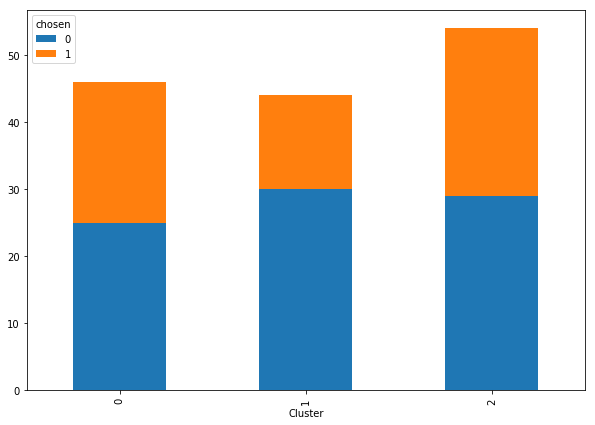

In [159]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [160]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[4]))

## Specialized

### ANN

In [97]:
X = df_n_ps_std_mfcc[4]

In [98]:
y = df_n_ps[4]['chosen']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [100]:
X_train.shape

(164, 13)

In [101]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [102]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [103]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [168]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.008, 'max_iter': 300}, que permiten obtener un Accuracy de 68.29% y un Kappa del 35.96
Tiempo total: 24.73 minutos


In [104]:
grid.best_params_={'activation': 'tanh', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.008, 'max_iter': 300}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [105]:
input_tensor = Input(shape = (n0,))

In [106]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [107]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [108]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 30)                420       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 31        
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 164 samples, validate on 55 samples
Epoch 1/300
164/164 [==============================] - 0s 1ms/step - loss: 0.7239 - accuracy: 0.4939 - val_loss: 0.7181 - val_accuracy: 0.4727
Epoch 2/300
164/164 [==============================] - 0s 73us/step - loss: 0.6690 - accuracy: 0.6159 - val_loss: 0.6907 - val_accuracy: 0.5091
Epoch 3/300
164/164 [==============================] - 0s 73us/step - loss: 0.6550 - accuracy: 0.6341 - val_loss: 0.6686 - val_accuracy: 0.5636
Epoch 4/300
164/164 [==============================] - 0s 73us/step - loss: 0.6522 - accuracy: 0.6646 - val_loss: 0.6564 - val_accuracy: 0.5818
Epoch 5/300
164/164 [==============================] - 0s 73us/step - loss: 0.6453 - accuracy: 0.6951 - val_loss: 0.6496 - val_accuracy: 0.5636
Epoch 6/300
164/164 [==============================] - 0s 61us/step - loss: 0.6334 - accuracy: 0.6829 - val_loss: 0.6514 - val_accuracy: 0.5818
Epoch 7/300
164/164 [==============================] - 0s 73us/step - loss: 0.6312 - accurac

164/164 [==============================] - 0s 97us/step - loss: 0.4371 - accuracy: 0.8720 - val_loss: 0.6417 - val_accuracy: 0.6182
Epoch 109/300
164/164 [==============================] - 0s 104us/step - loss: 0.4371 - accuracy: 0.8720 - val_loss: 0.6417 - val_accuracy: 0.6182
Epoch 110/300
164/164 [==============================] - 0s 104us/step - loss: 0.4371 - accuracy: 0.8720 - val_loss: 0.6417 - val_accuracy: 0.6182
Epoch 111/300
164/164 [==============================] - 0s 104us/step - loss: 0.4371 - accuracy: 0.8720 - val_loss: 0.6416 - val_accuracy: 0.6182
Epoch 112/300
164/164 [==============================] - 0s 104us/step - loss: 0.4371 - accuracy: 0.8720 - val_loss: 0.6416 - val_accuracy: 0.6182
Epoch 113/300
164/164 [==============================] - 0s 110us/step - loss: 0.4370 - accuracy: 0.8720 - val_loss: 0.6416 - val_accuracy: 0.6182
Epoch 114/300
164/164 [==============================] - 0s 110us/step - loss: 0.4370 - accuracy: 0.8720 - val_loss: 0.6416 - val_acc

164/164 [==============================] - 0s 110us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 215/300
164/164 [==============================] - 0s 116us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 216/300
164/164 [==============================] - 0s 122us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 217/300
164/164 [==============================] - 0s 110us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182

Epoch 00217: ReduceLROnPlateau reducing learning rate to 7.629394893626795e-09.
Epoch 218/300
164/164 [==============================] - 0s 116us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 219/300
164/164 [==============================] - 0s 122us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 220/300
164/164 [============================

Epoch 267/300
164/164 [==============================] - 0s 134us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182

Epoch 00267: ReduceLROnPlateau reducing learning rate to 2.3841859042583735e-10.
Epoch 268/300
164/164 [==============================] - 0s 104us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 269/300
164/164 [==============================] - 0s 116us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 270/300
164/164 [==============================] - 0s 104us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 271/300
164/164 [==============================] - 0s 116us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 272/300
164/164 [==============================] - 0s 98us/step - loss: 0.4368 - accuracy: 0.8720 - val_loss: 0.6415 - val_accuracy: 0.6182
Epoch 273/300
164/164 [==============

range(0, 300)


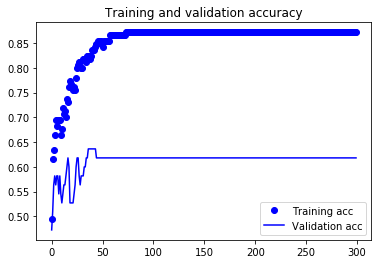

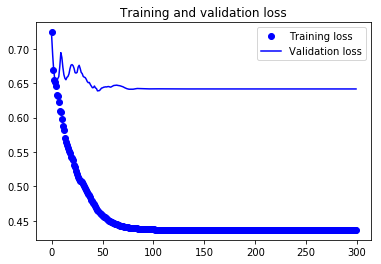

In [110]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [111]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

55/55 [==============================] - 0s 73us/step
test loss: 0.6415141766721552, test accuracy: 0.6181818246841431


In [112]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.6970899470899471


In [113]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.2325581395348838
[[21  7]
 [14 13]]


### KMeans

In [179]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0       0.992062    -0.477172    -1.079451    -2.369470    -1.705431   
1       0.843575    -0.507672    -0.731713    -0.334904     1.442336   
2       0.816922    -0.263544     0.639646    -0.865417     1.276602   
3       4.368525     0.851784    -0.671158    -0.128467     2.141169   
4       0.001312     0.535305    -0.648296     0.221414     0.549478   
5      -0.236754     0.488978     0.203743     0.088401    -0.151814   
6      -0.842496     0.742173     0.068601     1.394492    -0.276167   
7      -0.952702     1.078642    -0.563379    -0.018149    -0.073042   
8       0.046457    -0.093025    -0.804385     0.542662    -0.130939   
9      -0.781158     0.099463     0.196737     2.462131     0.316140   
10     -0.906167     0.568017     0.700382     2.876646    -0.809125   
11      1.172687     1.292213    -0.402038     0.087342     0.324539   
12      0.367875     1.949889     0.516382     0.657124    -0.534306   
13      1.270520     1.194102     0.267933     0.676186     0.394734   
14     -0.095931     0.792392     0.626113     0.189989     0.315198   
15     -0.322645     0.977766     0.685697     0.670670     0.997903   
16      0.565974     0.440551     0.402995     1.815814     1.906139   
17     -0.863540     0.887127     1.387720    -0.082168    -0.694633   
18     -0.822258    -0.630193    -0.672294    -0.279417    -0.731983   
19     -0.889164     0.641922     2.278761     0.190213    -0.341231   
20      0.795964     0.484784     0.898919     0.027625     0.415359   
21      0.168183    -0.077353     1.019887    -0.637065     0.731534   
22      0.510023    -0.099060     0.064384    -0.039933     0.786951   
23      0.216210    -0.069447     0.974822    -0.626273     0.835854   
24     -0.239273    -0.518568    -0.127834     0.045011     0.403223   
25     -1.241907     1.355534    -0.693470     0.793789     0.606007   
26     -0.847436     1.180146    -0.489592     1.189572    -0.457645   
27     -0.378383     1.017722    -1.812001     0.443514     0.583209   
28      0.245370     1.187084     1.056929     2.013063    -0.505622   
29     -0.623386     1.368898     1.216933     1.961377     0.744541   
..           ...          ...          ...          ...          ...   
189    -0.565077     0.809784     0.557457     0.815038     0.823053   
190    -0.602848     0.638838     0.763481    -0.424641    -0.810302   
191    -1.094031    -0.896961     0.400325    -1.635971    -1.099938   
192    -0.348357     0.944340     0.239675     0.003612    -1.370450   
193     2.110671    -1.005236     0.268022     0.459390    -1.985350   
194     1.222194    -1.600122    -1.149302     0.230839    -0.213026   
195    -0.509789    -0.757711     0.189267     0.516644     0.750906   
196     0.194175    -0.618441    -1.090420     0.233017    -1.492602   
197     0.297635    -0.727616    -1.927078    -0.145347    -0.990256   
198    -0.271030    -0.575137    -1.005334    -0.238705    -0.931830   
199     0.059096    -0.370313    -0.760047     0.706270    -2.488266   
200     0.147539    -0.233608    -0.578016     0.870637    -2.418094   
201    -0.076214    -1.055629     0.159389    -0.403318    -0.111273   
202     1.468986     0.518464     1.475456    -1.400891     0.408186   
203    -1.739107     0.192104    -0.670709    -1.236237    -1.672915   
204    -0.663868    -0.862566    -0.329803    -0.857680     0.167824   
205    -0.739818    -0.668220    -0.077479     0.026286     0.027801   
206     0.475752     0.695473    -0.072097     1.081397    -0.366985   
207    -1.331365    -1.632552    -0.876636     0.076190     1.187799   
208    -0.397476     0.090963     1.217996     0.773741     1.107204   
209    -0.465823    -1.372705    -0.445436     0.316510    -1.492946   
210    -0.594535    -1.761364    -1.069906    -0.502969    -1.411276   
211    -1.022693     0.373374    -0.104205    -0.815628    -0.574733   
212    -0.967902     0.155275     0.013938   

In [180]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[2847.0,
 2572.5760570812117,
 2370.209947155015,
 2235.6129406180157,
 2112.951551625758,
 2041.1809211260454,
 1982.3615393500422,
 1899.0667595696164,
 1851.9267246215204,
 1760.4468946465518,
 1745.79714786859,
 1689.1350809615656,
 1657.4940102564742,
 1625.370413913055]

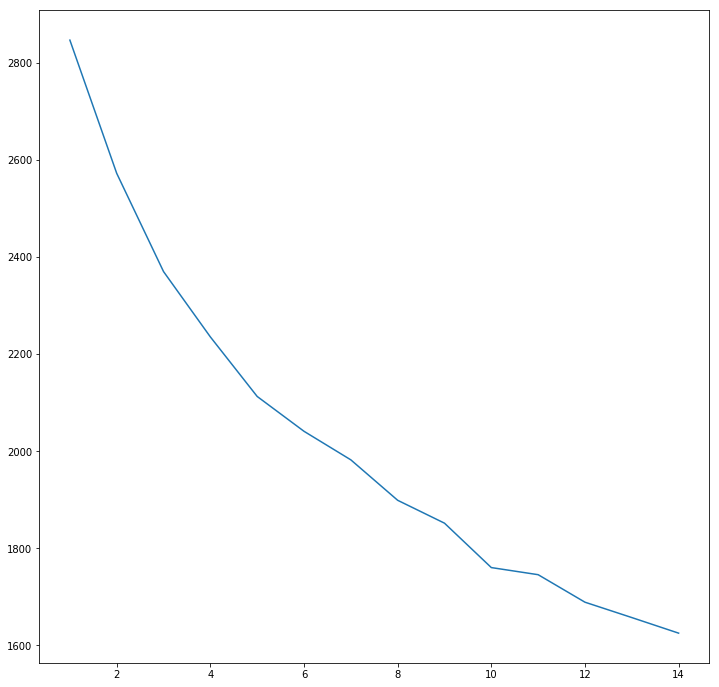

In [181]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=3

In [182]:
kmeans_mfcc = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_mfcc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [183]:
kmeans_mfcc.labels_

array([1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2,
       0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1])

In [184]:
clusters_mfcc = kmeans_mfcc.predict(X)
clusters_mfcc

array([1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       1, 2, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 1, 1, 2, 0, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2,
       0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 0, 1, 2, 0, 0, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 1])

In [185]:
X.loc[:,'Cluster'] = clusters_mfcc
X.loc[:,'chosen'] = list(y)

In [186]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0       0.992062    -0.477172    -1.079451    -2.369470    -1.705431   
1       0.843575    -0.507672    -0.731713    -0.334904     1.442336   
2       0.816922    -0.263544     0.639646    -0.865417     1.276602   
3       4.368525     0.851784    -0.671158    -0.128467     2.141169   
4       0.001312     0.535305    -0.648296     0.221414     0.549478   
5      -0.236754     0.488978     0.203743     0.088401    -0.151814   
6      -0.842496     0.742173     0.068601     1.394492    -0.276167   
7      -0.952702     1.078642    -0.563379    -0.018149    -0.073042   
8       0.046457    -0.093025    -0.804385     0.542662    -0.130939   
9      -0.781158     0.099463     0.196737     2.462131     0.316140   
10     -0.906167     0.568017     0.700382     2.876646    -0.809125   
11      1.172687     1.292213    -0.402038     0.087342     0.324539   
12      0.367875     1.949889     0.516382     0.657124    -0.534306   
13      1.270520     1.194102     0.267933     0.676186     0.394734   
14     -0.095931     0.792392     0.626113     0.189989     0.315198   
15     -0.322645     0.977766     0.685697     0.670670     0.997903   
16      0.565974     0.440551     0.402995     1.815814     1.906139   
17     -0.863540     0.887127     1.387720    -0.082168    -0.694633   
18     -0.822258    -0.630193    -0.672294    -0.279417    -0.731983   
19     -0.889164     0.641922     2.278761     0.190213    -0.341231   
20      0.795964     0.484784     0.898919     0.027625     0.415359   
21      0.168183    -0.077353     1.019887    -0.637065     0.731534   
22      0.510023    -0.099060     0.064384    -0.039933     0.786951   
23      0.216210    -0.069447     0.974822    -0.626273     0.835854   
24     -0.239273    -0.518568    -0.127834     0.045011     0.403223   
25     -1.241907     1.355534    -0.693470     0.793789     0.606007   
26     -0.847436     1.180146    -0.489592     1.189572    -0.457645   
27     -0.378383     1.017722    -1.812001     0.443514     0.583209   
28      0.245370     1.187084     1.056929     2.013063    -0.505622   
29     -0.623386     1.368898     1.216933     1.961377     0.744541   
..           ...          ...          ...          ...          ...   
189    -0.565077     0.809784     0.557457     0.815038     0.823053   
190    -0.602848     0.638838     0.763481    -0.424641    -0.810302   
191    -1.094031    -0.896961     0.400325    -1.635971    -1.099938   
192    -0.348357     0.944340     0.239675     0.003612    -1.370450   
193     2.110671    -1.005236     0.268022     0.459390    -1.985350   
194     1.222194    -1.600122    -1.149302     0.230839    -0.213026   
195    -0.509789    -0.757711     0.189267     0.516644     0.750906   
196     0.194175    -0.618441    -1.090420     0.233017    -1.492602   
197     0.297635    -0.727616    -1.927078    -0.145347    -0.990256   
198    -0.271030    -0.575137    -1.005334    -0.238705    -0.931830   
199     0.059096    -0.370313    -0.760047     0.706270    -2.488266   
200     0.147539    -0.233608    -0.578016     0.870637    -2.418094   
201    -0.076214    -1.055629     0.159389    -0.403318    -0.111273   
202     1.468986     0.518464     1.475456    -1.400891     0.408186   
203    -1.739107     0.192104    -0.670709    -1.236237    -1.672915   
204    -0.663868    -0.862566    -0.329803    -0.857680     0.167824   
205    -0.739818    -0.668220    -0.077479     0.026286     0.027801   
206     0.475752     0.695473    -0.072097     1.081397    -0.366985   
207    -1.331365    -1.632552    -0.876636     0.076190     1.187799   
208    -0.397476     0.090963     1.217996     0.773741     1.107204   
209    -0.465823    -1.372705    -0.445436     0.316510    -1.492946   
210    -0.594535    -1.761364    -1.069906    -0.502969    -1.411276   
211    -1.022693     0.373374    -0.104205    -0.815628    -0.574733   
212    -0.967902     0.155275     0.013938   

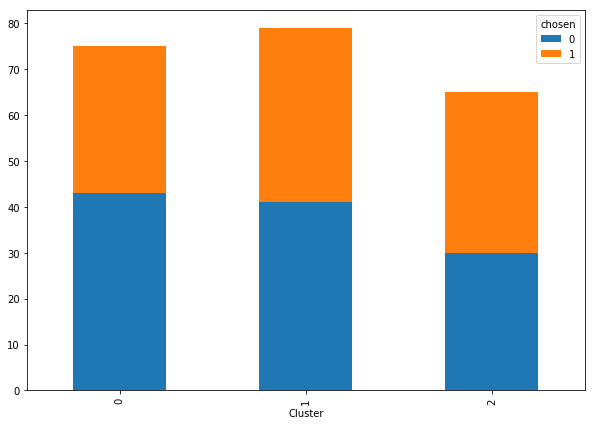

In [187]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [188]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[5]))

## Urban Place

### ANN

In [114]:
X = df_n_ps_std_mfcc[5]

In [115]:
y = df_n_ps[5]['chosen']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [117]:
X_train.shape

(162, 13)

In [118]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [119]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [120]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [196]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'logistic', 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.009, 'max_iter': 1000}, que permiten obtener un Accuracy de 72.84% y un Kappa del 19.82
Tiempo total: 33.32 minutos


In [121]:
grid.best_params_= {'activation': 'sigmoid', 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.009, 'max_iter': 1000}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [122]:
input_tensor = Input(shape = (n0,))

In [123]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [124]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [125]:
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 13)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 30)                420       
_________________________________________________________________
dense_18 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 31        
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


In [126]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 162 samples, validate on 54 samples
Epoch 1/1000
162/162 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.6296 - val_loss: 0.5670 - val_accuracy: 0.7778
Epoch 2/1000
162/162 [==============================] - 0s 86us/step - loss: 0.6681 - accuracy: 0.6296 - val_loss: 0.5417 - val_accuracy: 0.7778
Epoch 3/1000
162/162 [==============================] - 0s 80us/step - loss: 0.6660 - accuracy: 0.6296 - val_loss: 0.6625 - val_accuracy: 0.7407
Epoch 4/1000
162/162 [==============================] - 0s 117us/step - loss: 0.6927 - accuracy: 0.4938 - val_loss: 0.6973 - val_accuracy: 0.3704
Epoch 5/1000
162/162 [==============================] - 0s 86us/step - loss: 0.6667 - accuracy: 0.6296 - val_loss: 0.5859 - val_accuracy: 0.7778
Epoch 6/1000
162/162 [==============================] - 0s 74us/step - loss: 0.6472 - accuracy: 0.6296 - val_loss: 0.5762 - val_accuracy: 0.7778
Epoch 7/1000
162/162 [==============================] - 0s 86us/step - loss: 0.6449 -

162/162 [==============================] - 0s 123us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5576 - val_accuracy: 0.7037
Epoch 108/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5575 - val_accuracy: 0.7037
Epoch 109/1000
162/162 [==============================] - 0s 154us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5576 - val_accuracy: 0.7037
Epoch 110/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5575 - val_accuracy: 0.7037
Epoch 111/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5576 - val_accuracy: 0.7037

Epoch 00111: ReduceLROnPlateau reducing learning rate to 8.789062121650204e-06.
Epoch 112/1000
162/162 [==============================] - 0s 136us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5576 - val_accuracy: 0.7037
Epoch 113/1000
162/162 [======================

Epoch 160/1000
162/162 [==============================] - 0s 130us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 161/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037

Epoch 00161: ReduceLROnPlateau reducing learning rate to 2.746581913015689e-07.
Epoch 162/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 163/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5801 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 164/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 165/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 166/1000
162/162 [=======

162/162 [==============================] - 0s 173us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 213/1000
162/162 [==============================] - 0s 142us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 214/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 215/1000
162/162 [==============================] - 0s 142us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 216/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 217/1000
162/162 [==============================] - 0s 142us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 218/1000
162/162 [==============================] - 0s 130us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - 

Epoch 265/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 266/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 267/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 268/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 269/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 270/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 271/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_

Epoch 370/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 371/1000
162/162 [==============================] - 0s 99us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037

Epoch 00371: ReduceLROnPlateau reducing learning rate to 1.3096723141745037e-13.
Epoch 372/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 373/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 374/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 375/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 376/1000
162/162 [=======

162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 423/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 424/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 425/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 426/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 427/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 428/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - 

Epoch 527/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 528/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 529/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 530/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 531/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037

Epoch 00531: ReduceLROnPlateau reducing learning rate to 1.998401358298498e-18.
Epoch 532/1000
162/162 [==============================] - 0s 99us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 533/1000
162/162 [========

Epoch 579/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 580/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 581/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037

Epoch 00581: ReduceLROnPlateau reducing learning rate to 6.245004244682806e-20.
Epoch 582/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 583/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 584/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 585/1000
162/162 [=======


Epoch 00631: ReduceLROnPlateau reducing learning rate to 1.951563826463377e-21.
Epoch 632/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 633/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 634/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 635/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 636/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 637/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 638/1000
162/162 [=======

Epoch 684/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 685/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 686/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 687/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 688/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 689/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 690/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5800 - accuracy: 0.6605 - val_

Epoch 737/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 738/1000
162/162 [==============================] - 0s 99us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 739/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 740/1000
162/162 [==============================] - 0s 123us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 741/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037

Epoch 00741: ReduceLROnPlateau reducing learning rate to 9.529120246403208e-25.
Epoch 742/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 743/1000
162/162 [========

Epoch 790/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 791/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037

Epoch 00791: ReduceLROnPlateau reducing learning rate to 2.9778500770010025e-26.
Epoch 792/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 793/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 794/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 795/1000
162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 796/1000
162/162 [======

Epoch 895/1000
162/162 [==============================] - 0s 130us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 896/1000
162/162 [==============================] - 0s 130us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 897/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 898/1000
162/162 [==============================] - 0s 130us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 899/1000
162/162 [==============================] - 0s 111us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 900/1000
162/162 [==============================] - 0s 117us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 901/1000
162/162 [==============================] - 0s 130us/step - loss: 0.5800 - accuracy: 0.6605 - val_

162/162 [==============================] - 0s 105us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037
Epoch 1000/1000
162/162 [==============================] - 0s 99us/step - loss: 0.5800 - accuracy: 0.6605 - val_loss: 0.5577 - val_accuracy: 0.7037


range(0, 1000)


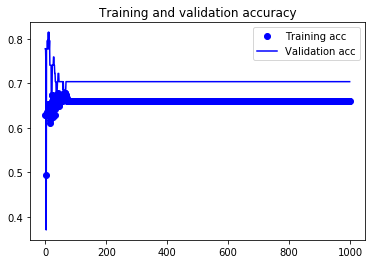

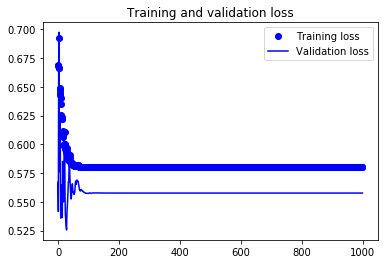

In [127]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [128]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

54/54 [==============================] - 0s 74us/step
test loss: 0.5576540055098357, test accuracy: 0.7037037014961243


In [129]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.6190476190476191


In [130]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.08860759493670889
[[35  7]
 [ 9  3]]


### KMeans

In [207]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0      -1.420085    -0.330086     0.476982     0.852458    -0.881089   
1      -0.288523    -1.545259    -1.137074     1.113906     0.311278   
2      -0.424115     0.410085     0.838888     0.219947    -0.375953   
3      -0.436131    -1.584784     0.658995     0.766397    -1.275956   
4       0.000543     0.507984    -0.978397    -0.501031     0.347848   
5       0.113948    -0.640675    -1.529179    -1.089360     0.638256   
6       0.807950    -1.039887     2.968459     1.111222     0.521703   
7      -0.465670     0.173616     0.264449     2.278838     1.672258   
8       0.235109    -0.290452    -0.928556     0.659411    -0.320465   
9       0.296153     1.351512    -0.018047     0.386276    -0.911469   
10      1.304720     0.208245     0.583743     1.972234    -0.030334   
11      1.288979    -0.851636    -0.002189    -0.753502    -0.288197   
12      0.802167     1.125872     0.181614    -0.054998     0.125978   
13     -0.570677    -0.903477     0.077307     1.133679    -0.194704   
14      0.390585     1.185091     1.060521    -0.143387     0.154017   
15     -0.294008     1.505226     0.525191     0.408188     0.012660   
16      0.504074     0.589989     0.264178    -0.853628    -1.595569   
17     -0.894319    -1.371343    -0.705746     0.481594    -0.141646   
18      0.851995     0.048612     0.066938     0.223581    -0.911164   
19     -0.660027    -0.598339    -0.142295     1.087024    -2.982385   
20     -0.566037    -2.086297     0.061463    -0.482666    -1.080805   
21      1.221627    -0.027554     0.188106    -0.974894     0.005596   
22     -1.183193    -0.312675    -0.568276    -0.639410    -0.208614   
23     -0.801169     0.116605    -0.579690     0.362276     0.606309   
24     -0.891340     0.309727    -0.842676     0.310338     0.577762   
25     -0.130263     1.334103     0.730042     0.678688    -0.720646   
26     -1.602028     1.309495     0.611484     0.700892    -0.666054   
27     -0.525208     1.525178    -0.030851    -0.074993     0.453039   
28      0.009250    -0.578236    -0.700373    -1.085258    -0.295803   
29      0.280166    -0.217504    -2.181350     0.187090     0.622591   
..           ...          ...          ...          ...          ...   
186    -0.713223    -0.165097     0.170953    -0.307601     1.152684   
187     0.077144    -0.527913     0.300841    -0.007145    -0.844229   
188    -0.818527    -0.256716     0.589448    -0.243361     0.027958   
189     0.078094    -0.693228    -0.177029     0.143179    -2.181764   
190     0.473118    -0.619480    -0.613859    -1.390025    -2.181316   
191    -0.725236     0.975099     1.683062    -0.427378     1.353092   
192    -0.098130     0.349984     0.651382     0.850819     0.452135   
193    -0.629175     0.598836     0.560497     0.331765     0.692832   
194    -0.593283    -1.762364    -1.292266    -0.014741     0.048404   
195    -0.220725    -0.706286    -0.558429    -0.543495    -0.762451   
196     0.542442    -0.314573    -0.389836     1.340826    -0.685860   
197     0.881881     0.686691     1.412427     0.067865    -0.239689   
198     0.056082     0.354969    -0.320369    -0.059290    -0.029903   
199    -0.069357     0.007801    -0.207830    -0.057174    -0.226654   
200     0.469206    -0.809604    -0.887115    -0.746687    -1.496004   
201    -0.020242    -0.015071    -0.121820    -0.371781    -0.501178   
202    -0.850319    -0.167766     1.753294    -0.158230     1.464227   
203    -1.592416     0.518318    -0.040842    -0.026786     0.407023   
204    -1.525605     0.408122    -0.068239    -0.027937     0.579957   
205     0.460758    -0.673974    -1.175590    -0.042902    -0.354361   
206    -0.654520    -0.315921     0.582093     0.860981    -2.255891   
207    -0.746404    -0.272009     0.915424     0.849620    -2.868535   
208    -0.406754     0.539656     0.644480     1.231427     0.299700   
209     0.239265     2.028215    -0.262443   

In [208]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[2808.0,
 2548.3417429105866,
 2378.335995807065,
 2256.0960796172503,
 2169.4597299478096,
 2080.2739448933166,
 2001.1226520766459,
 1918.5739069931988,
 1880.9859014602027,
 1796.9350644070514,
 1787.591551933858,
 1721.2471823270262,
 1689.3458120683304,
 1657.5154964943713]

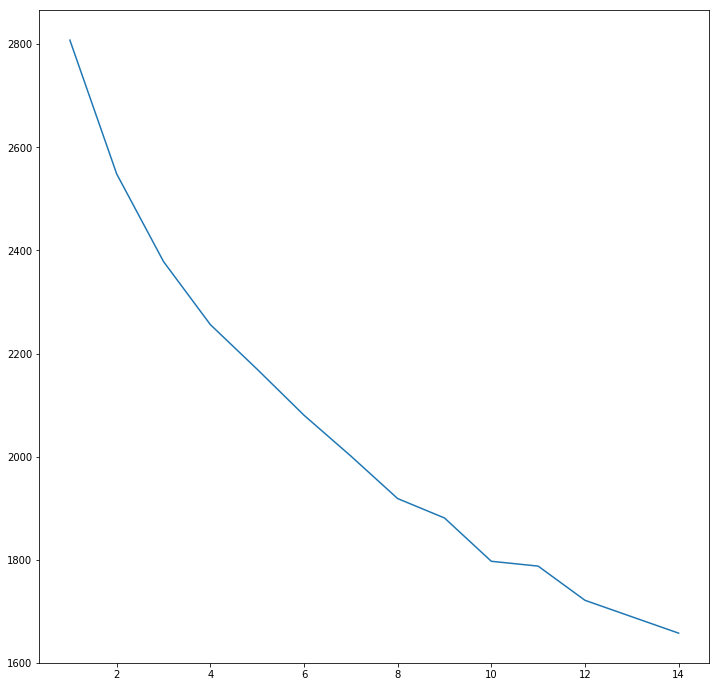

In [209]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [210]:
kmeans_mfcc = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_mfcc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [211]:
kmeans_mfcc.labels_

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [212]:
clusters_mfcc = kmeans_mfcc.predict(X)
clusters_mfcc

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [213]:
X.loc[:,'Cluster'] = clusters_mfcc
X.loc[:,'chosen'] = list(y)

In [214]:
X

mfccfiles_1  mfccfiles_2  mfccfiles_3  mfccfiles_4  mfccfiles_5  \
0      -1.420085    -0.330086     0.476982     0.852458    -0.881089   
1      -0.288523    -1.545259    -1.137074     1.113906     0.311278   
2      -0.424115     0.410085     0.838888     0.219947    -0.375953   
3      -0.436131    -1.584784     0.658995     0.766397    -1.275956   
4       0.000543     0.507984    -0.978397    -0.501031     0.347848   
5       0.113948    -0.640675    -1.529179    -1.089360     0.638256   
6       0.807950    -1.039887     2.968459     1.111222     0.521703   
7      -0.465670     0.173616     0.264449     2.278838     1.672258   
8       0.235109    -0.290452    -0.928556     0.659411    -0.320465   
9       0.296153     1.351512    -0.018047     0.386276    -0.911469   
10      1.304720     0.208245     0.583743     1.972234    -0.030334   
11      1.288979    -0.851636    -0.002189    -0.753502    -0.288197   
12      0.802167     1.125872     0.181614    -0.054998     0.125978   
13     -0.570677    -0.903477     0.077307     1.133679    -0.194704   
14      0.390585     1.185091     1.060521    -0.143387     0.154017   
15     -0.294008     1.505226     0.525191     0.408188     0.012660   
16      0.504074     0.589989     0.264178    -0.853628    -1.595569   
17     -0.894319    -1.371343    -0.705746     0.481594    -0.141646   
18      0.851995     0.048612     0.066938     0.223581    -0.911164   
19     -0.660027    -0.598339    -0.142295     1.087024    -2.982385   
20     -0.566037    -2.086297     0.061463    -0.482666    -1.080805   
21      1.221627    -0.027554     0.188106    -0.974894     0.005596   
22     -1.183193    -0.312675    -0.568276    -0.639410    -0.208614   
23     -0.801169     0.116605    -0.579690     0.362276     0.606309   
24     -0.891340     0.309727    -0.842676     0.310338     0.577762   
25     -0.130263     1.334103     0.730042     0.678688    -0.720646   
26     -1.602028     1.309495     0.611484     0.700892    -0.666054   
27     -0.525208     1.525178    -0.030851    -0.074993     0.453039   
28      0.009250    -0.578236    -0.700373    -1.085258    -0.295803   
29      0.280166    -0.217504    -2.181350     0.187090     0.622591   
..           ...          ...          ...          ...          ...   
186    -0.713223    -0.165097     0.170953    -0.307601     1.152684   
187     0.077144    -0.527913     0.300841    -0.007145    -0.844229   
188    -0.818527    -0.256716     0.589448    -0.243361     0.027958   
189     0.078094    -0.693228    -0.177029     0.143179    -2.181764   
190     0.473118    -0.619480    -0.613859    -1.390025    -2.181316   
191    -0.725236     0.975099     1.683062    -0.427378     1.353092   
192    -0.098130     0.349984     0.651382     0.850819     0.452135   
193    -0.629175     0.598836     0.560497     0.331765     0.692832   
194    -0.593283    -1.762364    -1.292266    -0.014741     0.048404   
195    -0.220725    -0.706286    -0.558429    -0.543495    -0.762451   
196     0.542442    -0.314573    -0.389836     1.340826    -0.685860   
197     0.881881     0.686691     1.412427     0.067865    -0.239689   
198     0.056082     0.354969    -0.320369    -0.059290    -0.029903   
199    -0.069357     0.007801    -0.207830    -0.057174    -0.226654   
200     0.469206    -0.809604    -0.887115    -0.746687    -1.496004   
201    -0.020242    -0.015071    -0.121820    -0.371781    -0.501178   
202    -0.850319    -0.167766     1.753294    -0.158230     1.464227   
203    -1.592416     0.518318    -0.040842    -0.026786     0.407023   
204    -1.525605     0.408122    -0.068239    -0.027937     0.579957   
205     0.460758    -0.673974    -1.175590    -0.042902    -0.354361   
206    -0.654520    -0.315921     0.582093     0.860981    -2.255891   
207    -0.746404    -0.272009     0.915424     0.849620    -2.868535   
208    -0.406754     0.539656     0.644480     1.231427     0.299700   
209     0.239265     2.028215    -0.262443   

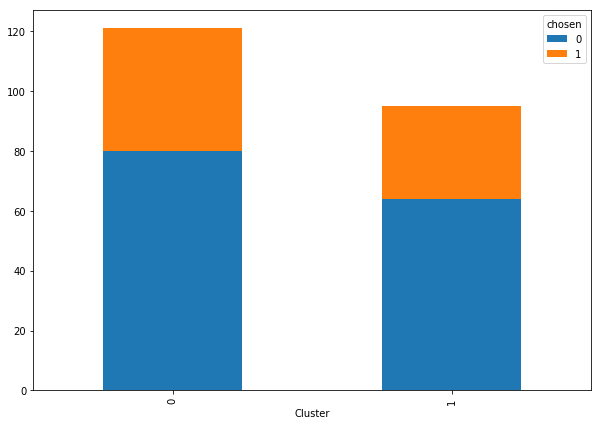

In [215]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

# Tonal Centroid

In [131]:
df_n_ps_std[0].columns

Index(['durationfiles', 'rmsfiles', 'rmsmedianfiles', 'lowenergyfiles',
       'ASRfiles', 'beatspectrumfiles', 'eventdensityfiles', 'tempofiles',
       'pulseclarityfiles', 'zerocrossfiles', 'rolloffsfiles',
       'brightnessfiles', 'spreadfiles', 'centroidfiles', 'kurtosisfiles',
       'flatnessfiles', 'entropyfiles', 'mfccfiles_1', 'mfccfiles_2',
       'mfccfiles_3', 'mfccfiles_4', 'mfccfiles_5', 'mfccfiles_6',
       'mfccfiles_7', 'mfccfiles_8', 'mfccfiles_9', 'mfccfiles_10',
       'mfccfiles_11', 'mfccfiles_12', 'mfccfiles_13', 'inharmonicityfiles',
       'bestkeyfiles', 'keyclarityfiles', 'modalityfiles',
       'tonalcentroidfiles_1', 'tonalcentroidfiles_2', 'tonalcentroidfiles_3',
       'tonalcentroidfiles_4', 'tonalcentroidfiles_5', 'tonalcentroidfiles_6',
       'chromagramfiles_1', 'chromagramfiles_2', 'chromagramfiles_3',
       'chromagramfiles_4', 'chromagramfiles_5', 'chromagramfiles_6',
       'chromagramfiles_7', 'chromagramfiles_8', 'chromagramfiles_9',
      

In [132]:
df_n_ps_std[0].columns[34:40]

Index(['tonalcentroidfiles_1', 'tonalcentroidfiles_2', 'tonalcentroidfiles_3',
       'tonalcentroidfiles_4', 'tonalcentroidfiles_5', 'tonalcentroidfiles_6'],
      dtype='object')

In [133]:
df_n_ps_std_tc = [None]*len(companies)
for i in range(len(companies)):
    df_n_ps_std_tc[i] = pd.DataFrame(df_n_ps_std[i].iloc[:,34:40])
    df_n_ps_std_tc[i].columns=df_n_ps_std[i].columns[34:40]
df_n_ps_std_tc[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 6 columns):
tonalcentroidfiles_1    315 non-null float64
tonalcentroidfiles_2    315 non-null float64
tonalcentroidfiles_3    315 non-null float64
tonalcentroidfiles_4    315 non-null float64
tonalcentroidfiles_5    315 non-null float64
tonalcentroidfiles_6    315 non-null float64
dtypes: float64(6)
memory usage: 14.8 KB


## Arte Francés

### ANN

In [134]:
X = df_n_ps_std_tc[0]

In [135]:
y = df_n_ps[0]['chosen']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [137]:
X_train.shape

(236, 6)

In [138]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [139]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [140]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [226]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.001, 'max_iter': 100}, que permiten obtener un Accuracy de 76.27% y un Kappa del 13.18
Tiempo total: 23.63 minutos


In [141]:
grid.best_params_= {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.001, 'max_iter': 100}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [142]:
input_tensor = Input(shape = (n0,))

In [143]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [144]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [145]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_21 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_22 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 11        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [146]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 236 samples, validate on 79 samples
Epoch 1/100
236/236 [==============================] - 0s 970us/step - loss: 0.7070 - accuracy: 0.4915 - val_loss: 0.7205 - val_accuracy: 0.4430
Epoch 2/100
236/236 [==============================] - 0s 80us/step - loss: 0.6903 - accuracy: 0.5127 - val_loss: 0.7068 - val_accuracy: 0.4810
Epoch 3/100
236/236 [==============================] - 0s 68us/step - loss: 0.6757 - accuracy: 0.5508 - val_loss: 0.6955 - val_accuracy: 0.4810
Epoch 4/100
236/236 [==============================] - 0s 97us/step - loss: 0.6638 - accuracy: 0.5975 - val_loss: 0.6854 - val_accuracy: 0.5570
Epoch 5/100
236/236 [==============================] - 0s 72us/step - loss: 0.6517 - accuracy: 0.6271 - val_loss: 0.6767 - val_accuracy: 0.6076
Epoch 6/100
236/236 [==============================] - 0s 68us/step - loss: 0.6413 - accuracy: 0.6737 - val_loss: 0.6680 - val_accuracy: 0.6456
Epoch 7/100
236/236 [==============================] - 0s 68us/step - loss: 0.6329 - accur

Epoch 55/100
236/236 [==============================] - 0s 89us/step - loss: 0.5732 - accuracy: 0.7288 - val_loss: 0.6169 - val_accuracy: 0.7089
Epoch 56/100
236/236 [==============================] - 0s 102us/step - loss: 0.5732 - accuracy: 0.7288 - val_loss: 0.6168 - val_accuracy: 0.7089
Epoch 57/100
236/236 [==============================] - 0s 89us/step - loss: 0.5731 - accuracy: 0.7288 - val_loss: 0.6168 - val_accuracy: 0.7089
Epoch 58/100
236/236 [==============================] - 0s 97us/step - loss: 0.5731 - accuracy: 0.7288 - val_loss: 0.6168 - val_accuracy: 0.7089

Epoch 00058: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
Epoch 59/100
236/236 [==============================] - 0s 89us/step - loss: 0.5731 - accuracy: 0.7288 - val_loss: 0.6168 - val_accuracy: 0.7089
Epoch 60/100
236/236 [==============================] - 0s 97us/step - loss: 0.5730 - accuracy: 0.7288 - val_loss: 0.6168 - val_accuracy: 0.7089
Epoch 61/100
236/236 [==========================

range(0, 100)


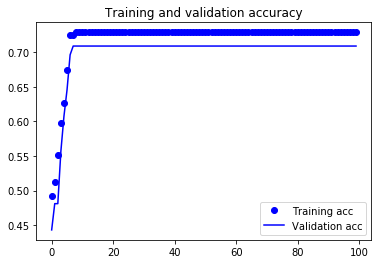

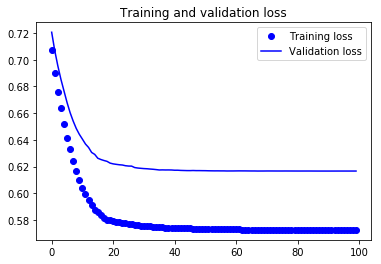

In [147]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [148]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

79/79 [==============================] - 0s 63us/step
test loss: 0.6167174675796605, test accuracy: 0.7088607549667358


In [149]:
y_pred = model.predict(X_test)
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print("AUC ROC: ",roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.0
AUC ROC:  0.5
[[56  0]
 [23  0]]


### KMeans

In [236]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                1.585484              0.923309             -0.748807   
1                1.129768              0.963814              0.209096   
2               -0.066076              1.857866              1.921193   
3                0.119831              1.429286              1.472808   
4               -0.123292              0.197415              0.503797   
5               -0.553148              0.127288              2.842797   
6               -0.391161             -0.277979              1.117190   
7               -0.538913              1.251767              0.804764   
8               -0.032875              0.470932             -0.097587   
9                0.212612              0.417050              0.248906   
10               0.503861              0.931556             -0.151041   
11               0.279193              0.515238              0.967780   
12               0.049966             -0.352640             -0.595831   
13               0.224941             -0.251218              0.462542   
14              -1.007562             -0.018176             -1.310793   
15              -0.156222              0.809961              0.891274   
16              -0.561577              0.649671              0.616195   
17               0.828743             -1.472369              0.354955   
18               0.520383             -1.982735             -0.524125   
19               0.619988             -1.486445              0.400141   
20              -1.718572              1.328228             -0.790084   
21              -1.673788             -0.008250             -0.699254   
22              -1.660892              0.201931             -1.149618   
23               0.467761              1.771253             -2.115824   
24               1.365177              1.009311              0.060605   
25               0.526073             -0.108881             -0.890367   
26               0.396699              1.270857             -0.933936   
27               1.042904              1.615651             -1.342135   
28               0.488482              1.667605             -0.222726   
29              -0.206765             -0.088250              0.214115   
..                    ...                   ...                   ...   
285              0.761670             -1.885823              0.301159   
286              2.233841             -0.021303              1.621452   
287              0.933521              0.065790             -1.295122   
288              1.398839             -0.456314             -1.182173   
289              0.982720              0.097900             -0.814050   
290              0.959009             -1.443293             -0.329974   
291             -3.186710              0.207715             -1.442295   
292             -2.266002              0.208427              0.090970   
293              1.473030              0.944250             -0.160216   
294              2.116511              1.003706             -1.374891   
295              1.516890              0.883674             -1.850520   
296             -0.171687              0.469515              0.407395   
297             -0.023957              0.051075              0.045786   
298              0.152215              0.030843              0.217573   
299             -0.286639              0.215830             -0.245963   
300              0.411970              0.642559             -0.319323   
301              0.915776              0.420715             -0.435877   
302             -0.963660             -2.504276              0.149799   
303             -0.732467             -1.137228             -0.806385   
304              0.175270             -2.037232             -1.136866   
305              1.507133             -2.022655             -0.176808   
306              3.112152             -1.221959              0.020285   
307              2.013689             -1.475971             -1.

In [237]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[1890.0,
 1580.620167230212,
 1363.1774930694505,
 1195.4345875172114,
 1096.6320586530273,
 1013.9501053083941,
 953.1588875587528,
 882.9139429264524,
 844.4886425171022,
 815.6880457942883,
 788.9746059037274,
 745.3922927967658,
 722.2827052057237,
 709.9626886481943]

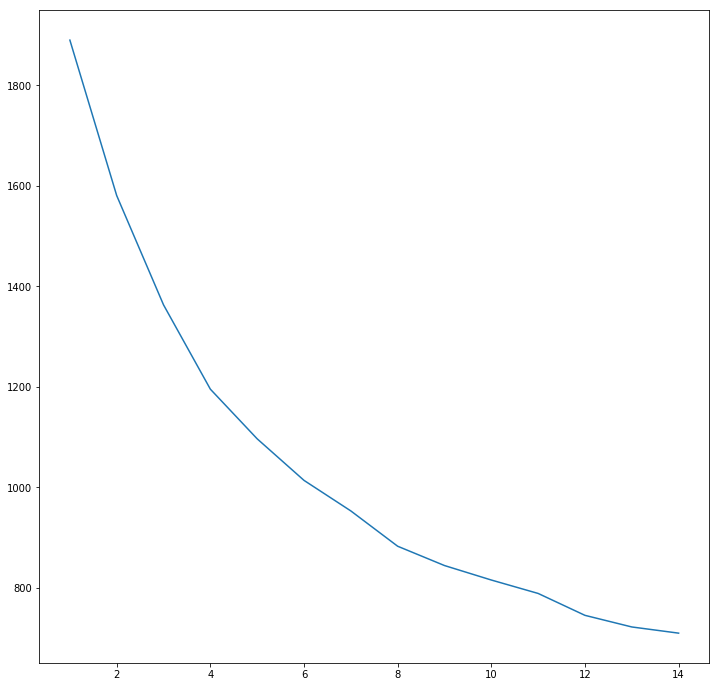

In [238]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=4

In [239]:
kmeans_tc = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans_tc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [240]:
kmeans_tc.labels_

array([1, 1, 2, 2, 2, 2, 3, 2, 2, 0, 1, 2, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0,
       3, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0,
       1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       3, 1, 2, 3, 0, 3, 3, 1, 3, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3,
       1, 2, 2, 2, 3, 0, 1, 3, 1, 2, 0, 3, 3, 3, 1, 3, 1, 1, 0, 0, 2, 2,
       3, 3, 2, 1, 1, 1, 1, 1, 3, 1, 3, 3, 0, 2, 3, 1, 0, 1, 1, 0, 1, 2,
       1, 1, 1, 2, 3, 2, 3, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 1, 2, 1, 3, 1, 1, 0,
       0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0, 3, 3, 3, 1, 1, 3, 0,
       1, 2, 1, 1, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 3, 2, 2,
       0, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 0, 2, 2, 3, 3, 0, 3, 3, 0, 0, 1,
       1, 3, 3, 3, 3, 3, 3, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 3, 3, 3, 3,
       0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,

In [241]:
clusters_tc = kmeans_tc.predict(X)
clusters_tc

array([1, 1, 2, 2, 2, 2, 3, 2, 2, 0, 1, 2, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0,
       3, 0, 1, 1, 1, 1, 0, 2, 2, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 0, 0, 0,
       1, 1, 1, 1, 1, 3, 3, 2, 2, 2, 0, 0, 3, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0,
       3, 1, 2, 3, 0, 3, 3, 1, 3, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 3,
       1, 2, 2, 2, 3, 0, 1, 3, 1, 2, 0, 3, 3, 3, 1, 3, 1, 1, 0, 0, 2, 2,
       3, 3, 2, 1, 1, 1, 1, 1, 3, 1, 3, 3, 0, 2, 3, 1, 0, 1, 1, 0, 1, 2,
       1, 1, 1, 2, 3, 2, 3, 1, 3, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 2, 1, 2, 1, 3, 1, 1, 0,
       0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 3, 3, 3, 0, 0, 3, 3, 3, 1, 1, 3, 0,
       1, 2, 1, 1, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 2, 0, 1, 0, 1, 3, 2, 2,
       0, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 0, 2, 2, 3, 3, 0, 3, 3, 0, 0, 1,
       1, 3, 3, 3, 3, 3, 3, 1, 2, 2, 0, 2, 2, 2, 1, 1, 0, 1, 3, 3, 3, 3,
       0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 2, 2, 1,

In [242]:
X.loc[:,'Cluster'] = clusters_tc
X.loc[:,'chosen'] = list(y)

In [243]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                1.585484              0.923309             -0.748807   
1                1.129768              0.963814              0.209096   
2               -0.066076              1.857866              1.921193   
3                0.119831              1.429286              1.472808   
4               -0.123292              0.197415              0.503797   
5               -0.553148              0.127288              2.842797   
6               -0.391161             -0.277979              1.117190   
7               -0.538913              1.251767              0.804764   
8               -0.032875              0.470932             -0.097587   
9                0.212612              0.417050              0.248906   
10               0.503861              0.931556             -0.151041   
11               0.279193              0.515238              0.967780   
12               0.049966             -0.352640             -0.595831   
13               0.224941             -0.251218              0.462542   
14              -1.007562             -0.018176             -1.310793   
15              -0.156222              0.809961              0.891274   
16              -0.561577              0.649671              0.616195   
17               0.828743             -1.472369              0.354955   
18               0.520383             -1.982735             -0.524125   
19               0.619988             -1.486445              0.400141   
20              -1.718572              1.328228             -0.790084   
21              -1.673788             -0.008250             -0.699254   
22              -1.660892              0.201931             -1.149618   
23               0.467761              1.771253             -2.115824   
24               1.365177              1.009311              0.060605   
25               0.526073             -0.108881             -0.890367   
26               0.396699              1.270857             -0.933936   
27               1.042904              1.615651             -1.342135   
28               0.488482              1.667605             -0.222726   
29              -0.206765             -0.088250              0.214115   
..                    ...                   ...                   ...   
285              0.761670             -1.885823              0.301159   
286              2.233841             -0.021303              1.621452   
287              0.933521              0.065790             -1.295122   
288              1.398839             -0.456314             -1.182173   
289              0.982720              0.097900             -0.814050   
290              0.959009             -1.443293             -0.329974   
291             -3.186710              0.207715             -1.442295   
292             -2.266002              0.208427              0.090970   
293              1.473030              0.944250             -0.160216   
294              2.116511              1.003706             -1.374891   
295              1.516890              0.883674             -1.850520   
296             -0.171687              0.469515              0.407395   
297             -0.023957              0.051075              0.045786   
298              0.152215              0.030843              0.217573   
299             -0.286639              0.215830             -0.245963   
300              0.411970              0.642559             -0.319323   
301              0.915776              0.420715             -0.435877   
302             -0.963660             -2.504276              0.149799   
303             -0.732467             -1.137228             -0.806385   
304              0.175270             -2.037232             -1.136866   
305              1.507133             -2.022655             -0.176808   
306              3.112152             -1.221959              0.020285   
307              2.013689             -1.475971             -1.

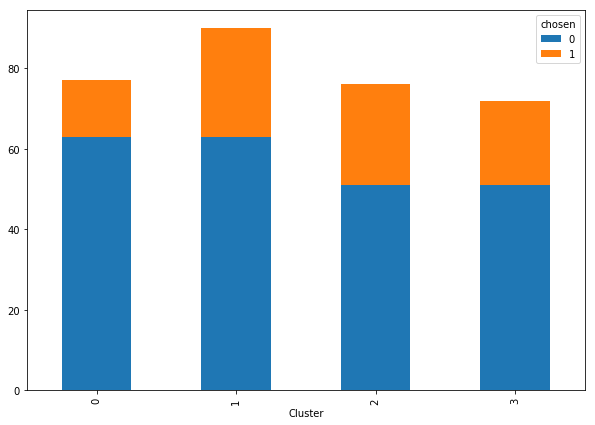

In [244]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [245]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[1]))

## Club De Banqueros y Empresarios

### ANN

In [150]:
X = df_n_ps_std_tc[1]

In [151]:
y = df_n_ps[1]['chosen']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [153]:
X_train.shape

(191, 6)

In [154]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [155]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [156]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [253]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.002, 'max_iter': 200}, que permiten obtener un Accuracy de 78.01% y un Kappa del 31.63
Tiempo total: 31.35 minutos


In [157]:
grid.best_params_= {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.002, 'max_iter': 200}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [158]:
input_tensor = Input(shape = (n0,))

In [159]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [160]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [161]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 6)                 0         
_________________________________________________________________
dense_24 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [162]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 191 samples, validate on 64 samples
Epoch 1/200
191/191 [==============================] - 0s 853us/step - loss: 0.7042 - accuracy: 0.5864 - val_loss: 0.7027 - val_accuracy: 0.6094
Epoch 2/200
191/191 [==============================] - 0s 63us/step - loss: 0.6768 - accuracy: 0.6126 - val_loss: 0.6629 - val_accuracy: 0.6562
Epoch 3/200
191/191 [==============================] - 0s 58us/step - loss: 0.6551 - accuracy: 0.6545 - val_loss: 0.6287 - val_accuracy: 0.6875
Epoch 4/200
191/191 [==============================] - 0s 52us/step - loss: 0.6361 - accuracy: 0.6545 - val_loss: 0.5994 - val_accuracy: 0.6719
Epoch 5/200
191/191 [==============================] - 0s 63us/step - loss: 0.6194 - accuracy: 0.6492 - val_loss: 0.5762 - val_accuracy: 0.6719
Epoch 6/200
191/191 [==============================] - 0s 58us/step - loss: 0.6084 - accuracy: 0.6806 - val_loss: 0.5564 - val_accuracy: 0.7031
Epoch 7/200
191/191 [==============================] - 0s 58us/step - loss: 0.5988 - accur

191/191 [==============================] - 0s 115us/step - loss: 0.5413 - accuracy: 0.7277 - val_loss: 0.4974 - val_accuracy: 0.7500
Epoch 56/200
191/191 [==============================] - 0s 87us/step - loss: 0.5412 - accuracy: 0.7277 - val_loss: 0.4974 - val_accuracy: 0.7500
Epoch 57/200
191/191 [==============================] - 0s 107us/step - loss: 0.5412 - accuracy: 0.7277 - val_loss: 0.4974 - val_accuracy: 0.7500
Epoch 58/200
191/191 [==============================] - 0s 89us/step - loss: 0.5411 - accuracy: 0.7277 - val_loss: 0.4974 - val_accuracy: 0.7500
Epoch 59/200
191/191 [==============================] - 0s 78us/step - loss: 0.5410 - accuracy: 0.7277 - val_loss: 0.4975 - val_accuracy: 0.7500
Epoch 60/200
191/191 [==============================] - ETA: 0s - loss: 0.5595 - accuracy: 0.71 - 0s 78us/step - loss: 0.5409 - accuracy: 0.7277 - val_loss: 0.4975 - val_accuracy: 0.7500
Epoch 61/200
191/191 [==============================] - 0s 84us/step - loss: 0.5408 - accuracy: 0.7

191/191 [==============================] - 0s 89us/step - loss: 0.5399 - accuracy: 0.7277 - val_loss: 0.4979 - val_accuracy: 0.7500
Epoch 162/200
191/191 [==============================] - 0s 99us/step - loss: 0.5399 - accuracy: 0.7277 - val_loss: 0.4979 - val_accuracy: 0.7500

Epoch 00162: ReduceLROnPlateau reducing learning rate to 6.103515914901436e-08.
Epoch 163/200
191/191 [==============================] - 0s 84us/step - loss: 0.5399 - accuracy: 0.7277 - val_loss: 0.4979 - val_accuracy: 0.7500
Epoch 164/200
191/191 [==============================] - 0s 89us/step - loss: 0.5399 - accuracy: 0.7277 - val_loss: 0.4979 - val_accuracy: 0.7500
Epoch 165/200
191/191 [==============================] - 0s 89us/step - loss: 0.5399 - accuracy: 0.7277 - val_loss: 0.4979 - val_accuracy: 0.7500
Epoch 166/200
191/191 [==============================] - 0s 84us/step - loss: 0.5399 - accuracy: 0.7277 - val_loss: 0.4979 - val_accuracy: 0.7500
Epoch 167/200
191/191 [==============================] - 

range(0, 200)


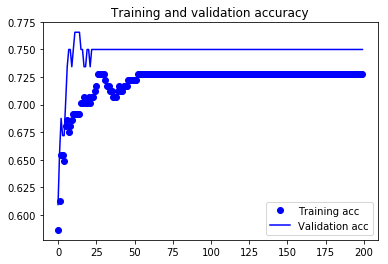

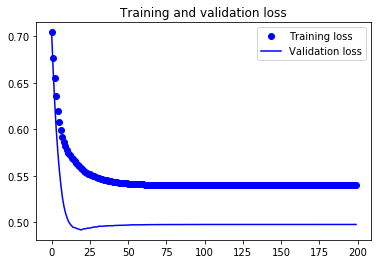

In [163]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [164]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

64/64 [==============================] - 0s 94us/step
test loss: 0.49787381291389465, test accuracy: 0.75


In [165]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.6072041166380788


In [166]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Kappa:  0.05360443622920519
[[46  7]
 [ 9  2]]


### KMeans

In [264]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                0.898091              0.151819             -1.172713   
1                0.618513             -0.762588              0.061946   
2                0.685649              0.002933              0.719805   
3                1.175209             -0.552349              0.336427   
4                1.350337             -1.407757              0.258917   
5                0.907564             -1.769301              1.177857   
6               -0.071420             -0.800769              0.238726   
7                0.476433             -1.202140             -1.713665   
8                0.572039             -1.488738             -0.403914   
9                0.741137              0.139987              0.726307   
10               0.533655             -0.111619              0.435253   
11              -0.667308              0.502566             -1.137726   
12               0.161812              0.294263              0.659166   
13              -0.373777             -1.439681              0.009190   
14               0.745550              0.214669              0.209787   
15               0.320726              0.108060              0.208510   
16               0.646392             -0.726119              0.153724   
17              -0.042981             -0.672256              0.358250   
18               0.822192              0.184879              1.658679   
19               0.175070              0.195153              1.969940   
20               1.339692             -1.202498              0.487937   
21               1.290923             -0.546138              0.120024   
22               1.528224             -0.912727              0.962682   
23              -0.486779             -1.124424              0.559106   
24              -0.230729              0.999926             -0.678209   
25              -0.632681              0.618852             -0.778803   
26              -1.151505             -1.127449              1.500641   
27               0.265739             -3.078847             -0.939567   
28               0.623357             -1.241561             -1.149654   
29               0.930863             -1.763587             -1.608926   
..                    ...                   ...                   ...   
225             -1.444140             -0.088370             -0.458428   
226             -0.297006              0.887935              0.467148   
227             -1.624166              0.777486              0.635044   
228              0.230618              1.438780              0.301556   
229             -0.163123              1.329205              0.721279   
230             -1.337576              0.249897              0.081067   
231              0.304553              0.584052              0.915910   
232             -0.291785              0.247731             -0.740382   
233             -0.532056              1.686101              0.358185   
234             -1.223692              0.723005              0.599197   
235              1.412552             -0.817418              0.038464   
236              0.141392             -0.756740             -1.981390   
237              1.157567             -0.442417             -1.342532   
238             -1.683225             -0.036571              0.297162   
239             -0.997159              0.655257              2.239993   
240             -1.142741              0.931927              1.440876   
241             -0.151675             -0.971306              0.447819   
242             -0.837654             -1.170592              0.622658   
243             -0.059101             -0.857751              0.253657   
244              1.455210             -1.123798              1.124970   
245              1.459407             -1.071308             -0.261053   
246              1.850117             -1.364586              1.015519   
247              0.468703              0.776904             -1.

In [265]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[1530.0000000000002,
 1266.8988304034983,
 1085.4171102625123,
 963.5827926636907,
 872.5239995069635,
 797.6140851961846,
 747.1323294070899,
 703.670300371115,
 664.3614627122823,
 637.5590430281768,
 607.7011770650902,
 585.4389967082509,
 558.8506960652073,
 540.5660329891642]

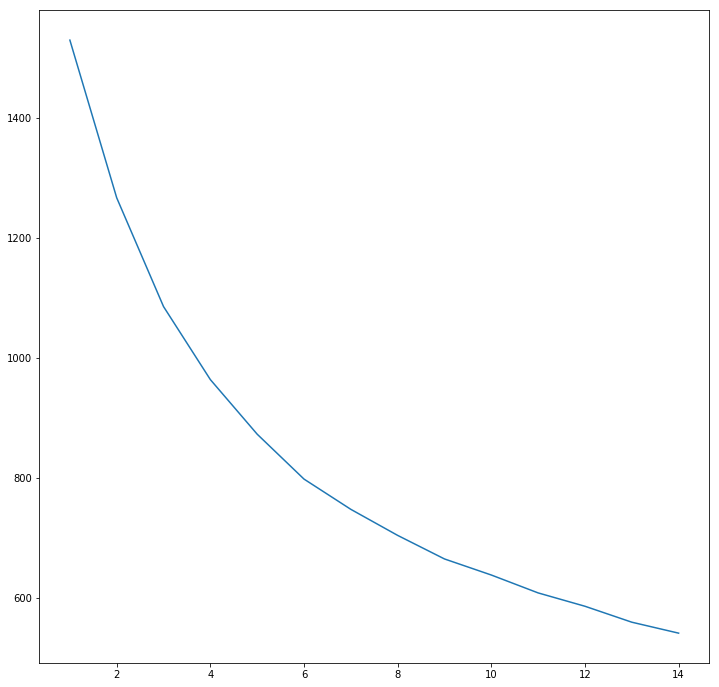

In [266]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=3

In [267]:
kmeans_tc = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_tc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [268]:
kmeans_tc.labels_

array([2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0,
       2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2,
       1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1])

In [269]:
clusters_tc = kmeans_tc.predict(X)
clusters_tc

array([2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 1, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1,
       1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0,
       2, 2, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 2, 2,
       1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 2, 1])

In [270]:
X.loc[:,'Cluster'] = clusters_tc
X.loc[:,'chosen'] = list(y)

In [271]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                0.898091              0.151819             -1.172713   
1                0.618513             -0.762588              0.061946   
2                0.685649              0.002933              0.719805   
3                1.175209             -0.552349              0.336427   
4                1.350337             -1.407757              0.258917   
5                0.907564             -1.769301              1.177857   
6               -0.071420             -0.800769              0.238726   
7                0.476433             -1.202140             -1.713665   
8                0.572039             -1.488738             -0.403914   
9                0.741137              0.139987              0.726307   
10               0.533655             -0.111619              0.435253   
11              -0.667308              0.502566             -1.137726   
12               0.161812              0.294263              0.659166   
13              -0.373777             -1.439681              0.009190   
14               0.745550              0.214669              0.209787   
15               0.320726              0.108060              0.208510   
16               0.646392             -0.726119              0.153724   
17              -0.042981             -0.672256              0.358250   
18               0.822192              0.184879              1.658679   
19               0.175070              0.195153              1.969940   
20               1.339692             -1.202498              0.487937   
21               1.290923             -0.546138              0.120024   
22               1.528224             -0.912727              0.962682   
23              -0.486779             -1.124424              0.559106   
24              -0.230729              0.999926             -0.678209   
25              -0.632681              0.618852             -0.778803   
26              -1.151505             -1.127449              1.500641   
27               0.265739             -3.078847             -0.939567   
28               0.623357             -1.241561             -1.149654   
29               0.930863             -1.763587             -1.608926   
..                    ...                   ...                   ...   
225             -1.444140             -0.088370             -0.458428   
226             -0.297006              0.887935              0.467148   
227             -1.624166              0.777486              0.635044   
228              0.230618              1.438780              0.301556   
229             -0.163123              1.329205              0.721279   
230             -1.337576              0.249897              0.081067   
231              0.304553              0.584052              0.915910   
232             -0.291785              0.247731             -0.740382   
233             -0.532056              1.686101              0.358185   
234             -1.223692              0.723005              0.599197   
235              1.412552             -0.817418              0.038464   
236              0.141392             -0.756740             -1.981390   
237              1.157567             -0.442417             -1.342532   
238             -1.683225             -0.036571              0.297162   
239             -0.997159              0.655257              2.239993   
240             -1.142741              0.931927              1.440876   
241             -0.151675             -0.971306              0.447819   
242             -0.837654             -1.170592              0.622658   
243             -0.059101             -0.857751              0.253657   
244              1.455210             -1.123798              1.124970   
245              1.459407             -1.071308             -0.261053   
246              1.850117             -1.364586              1.015519   
247              0.468703              0.776904             -1.

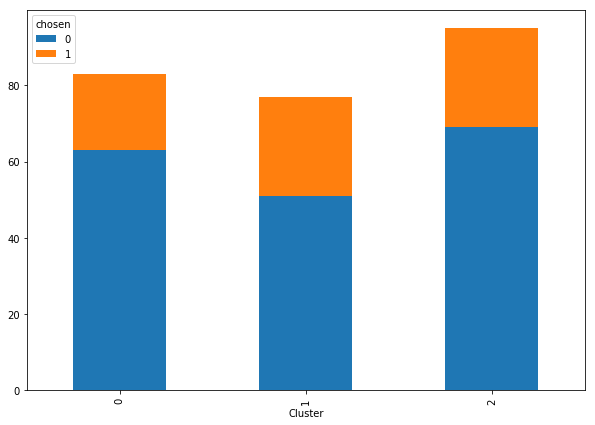

In [272]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [273]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[2]))

## Gramma

### ANN

In [167]:
X = df_n_ps_std_tc[2]

In [168]:
y = df_n_ps[2]['chosen']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [170]:
X_train.shape

(162, 6)

In [171]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [172]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [173]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [281]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.004, 'max_iter': 20}, que permiten obtener un Accuracy de 75.31% y un Kappa del 17.51
Tiempo total: 35.80 minutos


In [174]:
grid.best_params_={'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.004, 'max_iter': 20}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [175]:
input_tensor = Input(shape = (n0,))

In [176]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [177]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [178]:
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 6)                 0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                70        
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 11        
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [179]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 162 samples, validate on 54 samples
Epoch 1/20
162/162 [==============================] - 0s 1ms/step - loss: 0.7228 - accuracy: 0.6049 - val_loss: 0.7926 - val_accuracy: 0.6111
Epoch 2/20
162/162 [==============================] - 0s 74us/step - loss: 0.6740 - accuracy: 0.5988 - val_loss: 0.7654 - val_accuracy: 0.5741
Epoch 3/20
162/162 [==============================] - 0s 68us/step - loss: 0.6433 - accuracy: 0.6235 - val_loss: 0.7441 - val_accuracy: 0.5556
Epoch 4/20
162/162 [==============================] - 0s 62us/step - loss: 0.6202 - accuracy: 0.6420 - val_loss: 0.7311 - val_accuracy: 0.6111
Epoch 5/20
162/162 [==============================] - 0s 74us/step - loss: 0.6033 - accuracy: 0.6667 - val_loss: 0.7230 - val_accuracy: 0.6111
Epoch 6/20
162/162 [==============================] - 0s 68us/step - loss: 0.5913 - accuracy: 0.6914 - val_loss: 0.7176 - val_accuracy: 0.6296
Epoch 7/20
162/162 [==============================] - 0s 74us/step - loss: 0.5812 - accuracy: 0.67

range(0, 20)


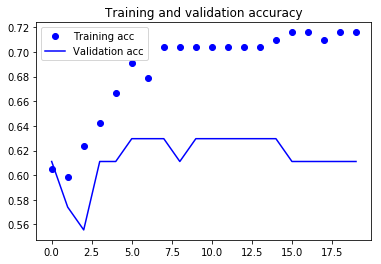

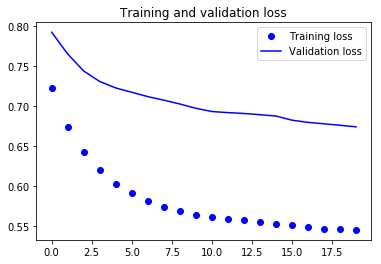

In [180]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [181]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

54/54 [==============================] - 0s 74us/step
test loss: 0.6743692181728504, test accuracy: 0.6111111044883728


In [182]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.5833333333333334


In [183]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  -0.10526315789473695
[[33  3]
 [18  0]]


### KMeans

In [292]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                0.618349              0.564005              0.091611   
1               -0.149103             -1.303101             -0.498811   
2               -1.141294             -1.317570              0.575363   
3               -0.988346             -0.540855              1.006800   
4               -0.640925             -0.228256              0.461986   
5                0.651809             -1.155045             -1.823509   
6                0.451997             -0.464785             -1.036654   
7               -0.013544             -0.797079             -0.417203   
8                0.970875              1.445790              1.566960   
9                0.807403              1.144660             -0.144756   
10               0.694252              1.111013             -0.298027   
11               0.812756              1.601196              0.779411   
12               0.108497              1.484673             -1.479839   
13              -0.204479              1.323672              0.724265   
14              -1.530107             -0.193077             -1.866283   
15              -1.432547              0.905544             -0.826578   
16              -1.690034              0.636522             -1.777337   
17               1.518335              0.937667              2.799725   
18               0.684979              0.531321              1.125361   
19               1.308654              0.456382              1.782806   
20               0.778796             -0.726044              0.453225   
21               0.504756             -0.482434             -0.040754   
22               0.781394             -0.663174              0.549780   
23               0.146289              1.536025              0.055630   
24               0.355919              0.841372              0.955924   
25               0.037665              1.886176              0.119317   
26              -1.466288              0.559979              0.806653   
27              -0.476036              0.236137              1.017872   
28              -0.005095             -2.023777             -0.849806   
29              -1.739289              0.517216             -0.791108   
..                    ...                   ...                   ...   
186             -0.209907             -0.890861             -1.480749   
187              0.272964             -1.573686             -1.429667   
188             -0.887693              0.489524              0.498612   
189             -1.002974              0.451334              0.382768   
190             -1.292658              0.953945              0.850772   
191              1.459775              0.362402              1.602060   
192              1.923340              0.915773              1.920236   
193              1.454162              0.509817              1.761284   
194              1.480242             -0.198385             -0.064509   
195              1.049366             -0.397640              0.632599   
196              1.338278             -0.473726              0.747138   
197              0.405835              1.250358             -0.440807   
198              0.181164              0.930372             -0.282564   
199              0.670208              1.198906             -0.303904   
200             -0.765252             -0.882395              0.316745   
201             -0.362519             -1.407213             -1.115582   
202              0.146885             -1.935391              0.147533   
203              0.828916             -0.454682             -0.332837   
204              0.763529             -1.226092              0.321224   
205              1.016504             -0.832857             -0.443373   
206              0.227287             -0.956642             -0.917348   
207              0.673549             -0.883374             -1.272948   
208              0.720898             -1.292898             -0.

In [293]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[1296.0000000000002,
 1080.8577066903854,
 933.0740864307027,
 818.2780016547574,
 739.8707939120957,
 660.7782107753561,
 616.9452004899513,
 572.5504610784069,
 524.3523691729067,
 492.5848935457627,
 457.9596509280891,
 439.47748328257137,
 422.97179760296183,
 407.2321746861259]

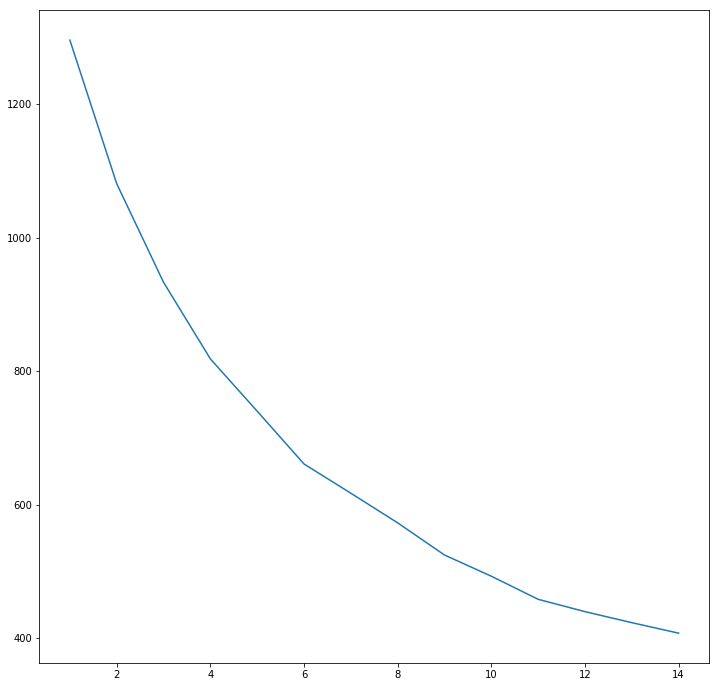

In [294]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=4

In [295]:
kmeans_tc = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans_tc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [296]:
kmeans_tc.labels_

array([3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 3,
       2, 0, 2, 0, 0, 1, 3, 0, 3, 3, 3, 1, 0, 3, 3, 3, 1, 1, 1, 3, 3, 3,
       3, 3, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 3, 3, 1, 3, 0, 1, 0, 3, 3, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 3, 1, 0, 1, 3, 3, 3, 0, 1, 0, 2, 2,
       2, 3, 0, 0, 0, 3, 1, 1, 1, 1, 3, 3, 3, 2, 0, 1, 1, 1, 3, 3, 0, 3,
       0, 2, 2, 2, 3, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 3, 3, 2,
       2, 2, 3, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 1, 3, 3, 0, 1, 3, 3, 3, 0, 1, 0, 2, 3, 3, 0, 0, 3, 0, 0,
       0, 2, 3, 3, 0, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 0])

In [297]:
clusters_tc = kmeans_tc.predict(X)
clusters_tc

array([3, 1, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 3,
       2, 0, 2, 0, 0, 1, 3, 0, 3, 3, 3, 1, 0, 3, 3, 3, 1, 1, 1, 3, 3, 3,
       3, 3, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 3, 3, 1, 3, 0, 1, 0, 3, 3, 1,
       2, 1, 1, 1, 1, 2, 2, 2, 0, 0, 3, 1, 0, 1, 3, 3, 3, 0, 1, 0, 2, 2,
       2, 3, 0, 0, 0, 3, 1, 1, 1, 1, 3, 3, 3, 2, 0, 1, 1, 1, 3, 3, 0, 3,
       0, 2, 2, 2, 3, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 3, 3, 2,
       2, 2, 3, 0, 1, 3, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 3,
       2, 3, 2, 1, 3, 3, 0, 1, 3, 3, 3, 0, 1, 0, 2, 3, 3, 0, 0, 3, 0, 0,
       0, 2, 3, 3, 0, 1, 1, 3, 1, 0, 1, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 0])

In [298]:
X.loc[:,'Cluster'] = clusters_tc
X.loc[:,'chosen'] = list(y)

In [299]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                0.618349              0.564005              0.091611   
1               -0.149103             -1.303101             -0.498811   
2               -1.141294             -1.317570              0.575363   
3               -0.988346             -0.540855              1.006800   
4               -0.640925             -0.228256              0.461986   
5                0.651809             -1.155045             -1.823509   
6                0.451997             -0.464785             -1.036654   
7               -0.013544             -0.797079             -0.417203   
8                0.970875              1.445790              1.566960   
9                0.807403              1.144660             -0.144756   
10               0.694252              1.111013             -0.298027   
11               0.812756              1.601196              0.779411   
12               0.108497              1.484673             -1.479839   
13              -0.204479              1.323672              0.724265   
14              -1.530107             -0.193077             -1.866283   
15              -1.432547              0.905544             -0.826578   
16              -1.690034              0.636522             -1.777337   
17               1.518335              0.937667              2.799725   
18               0.684979              0.531321              1.125361   
19               1.308654              0.456382              1.782806   
20               0.778796             -0.726044              0.453225   
21               0.504756             -0.482434             -0.040754   
22               0.781394             -0.663174              0.549780   
23               0.146289              1.536025              0.055630   
24               0.355919              0.841372              0.955924   
25               0.037665              1.886176              0.119317   
26              -1.466288              0.559979              0.806653   
27              -0.476036              0.236137              1.017872   
28              -0.005095             -2.023777             -0.849806   
29              -1.739289              0.517216             -0.791108   
..                    ...                   ...                   ...   
186             -0.209907             -0.890861             -1.480749   
187              0.272964             -1.573686             -1.429667   
188             -0.887693              0.489524              0.498612   
189             -1.002974              0.451334              0.382768   
190             -1.292658              0.953945              0.850772   
191              1.459775              0.362402              1.602060   
192              1.923340              0.915773              1.920236   
193              1.454162              0.509817              1.761284   
194              1.480242             -0.198385             -0.064509   
195              1.049366             -0.397640              0.632599   
196              1.338278             -0.473726              0.747138   
197              0.405835              1.250358             -0.440807   
198              0.181164              0.930372             -0.282564   
199              0.670208              1.198906             -0.303904   
200             -0.765252             -0.882395              0.316745   
201             -0.362519             -1.407213             -1.115582   
202              0.146885             -1.935391              0.147533   
203              0.828916             -0.454682             -0.332837   
204              0.763529             -1.226092              0.321224   
205              1.016504             -0.832857             -0.443373   
206              0.227287             -0.956642             -0.917348   
207              0.673549             -0.883374             -1.272948   
208              0.720898             -1.292898             -0.

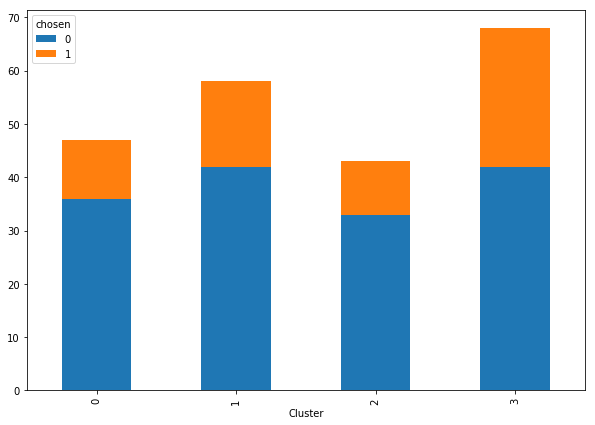

In [300]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [301]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[3]))

## Hotel Marrakech

### ANN

In [200]:
X = df_n_ps_std_tc[3]

In [201]:
y = df_n_ps[3]['chosen']

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [203]:
X_train.shape

(108, 6)

In [204]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [205]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [206]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [309]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.003, 'max_iter': 2000}, que permiten obtener un Accuracy de 79.63% y un Kappa del 57.62
Tiempo total: 20.07 minutos


In [207]:
grid.best_params_= {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.003, 'max_iter': 2000}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [208]:
input_tensor = Input(shape = (n0,))

In [209]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [210]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [211]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 6)                 0         
_________________________________________________________________
dense_28 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_29 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 21        
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 108 samples, validate on 36 samples
Epoch 1/2000
108/108 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.5741 - val_loss: 0.7108 - val_accuracy: 0.5833
Epoch 2/2000
108/108 [==============================] - 0s 93us/step - loss: 0.6691 - accuracy: 0.6204 - val_loss: 0.7129 - val_accuracy: 0.5000
Epoch 3/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6606 - accuracy: 0.6481 - val_loss: 0.7103 - val_accuracy: 0.5278
Epoch 4/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6552 - accuracy: 0.6574 - val_loss: 0.7159 - val_accuracy: 0.5000
Epoch 5/2000
108/108 [==============================] - 0s 83us/step - loss: 0.6532 - accuracy: 0.6481 - val_loss: 0.7112 - val_accuracy: 0.5278
Epoch 6/2000
108/108 [==============================] - 0s 93us/step - loss: 0.6503 - accuracy: 0.6389 - val_loss: 0.7059 - val_accuracy: 0.5556
Epoch 7/2000
108/108 [==============================] - 0s 93us/step - loss: 0.6476 

108/108 [==============================] - 0s 93us/step - loss: 0.6046 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 108/2000
108/108 [==============================] - 0s 176us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 109/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 110/2000
108/108 [==============================] - 0s 83us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 00110: ReduceLROnPlateau reducing learning rate to 2.9296875254658516e-06.
Epoch 111/2000
108/108 [==============================] - 0s 93us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 112/2000
108/108 [==============================] - 0s 102us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 113/2000
108/108 [========================

Epoch 160/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 00160: ReduceLROnPlateau reducing learning rate to 9.155273517080786e-08.
Epoch 161/2000
108/108 [==============================] - 0s 222us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 162/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 163/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 164/2000
108/108 [==============================] - 0s 102us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 165/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 166/2000
108/108 [=======

108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 213/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 214/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 215/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 216/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 217/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 218/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - 

Epoch 265/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 266/2000
108/108 [==============================] - 0s 176us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 267/2000
108/108 [==============================] - 0s 157us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 268/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 269/2000
108/108 [==============================] - 0s 157us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 270/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 00270: ReduceLROnPlateau reducing learning rate to 4.470348397012103e-11.
Epoch 271/2000
108/108 [=======

Epoch 370/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 00370: ReduceLROnPlateau reducing learning rate to 4.3655746064571316e-14.
Epoch 371/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 372/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 373/2000
108/108 [==============================] - 0s 157us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 374/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 375/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 376/2000
108/108 [======

108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 423/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 424/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 425/2000
108/108 [==============================] - 0s 157us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 426/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 427/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 428/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - 

Epoch 475/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 476/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 477/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 478/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 479/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 480/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 00480: ReduceLROnPlateau reducing learning rate to 2.1316282258091463e-17.
Epoch 481/2000
108/108 [======

Epoch 580/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 00580: ReduceLROnPlateau reducing learning rate to 2.0816681892667444e-20.
Epoch 581/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 582/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 583/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 584/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 585/2000
108/108 [==============================] - ETA: 0s - loss: 0.5617 - accuracy: 0.75 - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accur

Epoch 632/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 633/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 634/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 635/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 636/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 637/2000
108/108 [==============================] - ETA: 0s - loss: 0.6880 - accuracy: 0.56 - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 638/2000
108/108 [==============================] - 0s 120us/ste

Epoch 737/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 738/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 739/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 740/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 00740: ReduceLROnPlateau reducing learning rate to 3.176373579813758e-25.
Epoch 741/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 742/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 743/2000
108/108 [=======

108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 842/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 843/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 844/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 845/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 846/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 847/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - 

Epoch 894/2000
108/108 [==============================] - 0s 102us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 895/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 896/2000
108/108 [==============================] - 0s 157us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 897/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 898/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 899/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 900/2000
108/108 [==============================] - 0s 102us/step - loss: 0.6045 - accuracy: 0.6852 - val_

Epoch 999/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1000/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 01000: ReduceLROnPlateau reducing learning rate to 4.733165472468373e-33.
Epoch 1001/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1002/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1003/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1004/2000
108/108 [==============================] - 0s 167us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1005/2000
108/108 [=


Epoch 01050: ReduceLROnPlateau reducing learning rate to 1.4791142101463666e-34.
Epoch 1051/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1052/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1053/2000
108/108 [==============================] - 0s 102us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1054/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1055/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1056/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1057/2000
108/108 

Epoch 1103/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1104/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1105/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1106/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1107/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1108/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1109/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852

Epoch 1155/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1156/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1157/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1158/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1159/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1160/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 01160: ReduceLROnPlateau reducing learning rate to 7.222237354230306e-38.
Epoch 1161/2000
108/108 [

108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1260/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000

Epoch 01260: ReduceLROnPlateau reducing learning rate to 7.052945365716453e-41.
Epoch 1261/2000
108/108 [==============================] - 0s 167us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1262/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1263/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1264/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1265/2000
108/108 [================

108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1312/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1313/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1314/2000
108/108 [==============================] - 0s 157us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1315/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1316/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1317/2000
108/108 [==============================] - ETA: 0s - loss: 0.6126 - accuracy: 0.68 - 0s 130us/step - loss:

108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1364/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1365/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1366/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1367/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1368/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1369/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6

108/108 [==============================] - 0s 176us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1470/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1471/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1472/2000
108/108 [==============================] - 0s 176us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1473/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1474/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1475/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6

108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1525/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1526/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1527/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1528/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1529/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1530/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6

108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1580/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1581/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1582/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1583/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1584/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1585/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6

Epoch 1634/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1635/2000
108/108 [==============================] - 0s 148us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1636/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1637/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1638/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1639/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1640/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852

Epoch 1689/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1690/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1691/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1692/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1693/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1694/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1695/2000
108/108 [==============================] - ETA: 0s - loss: 0.5554 - accuracy: 0.75 - 0s 13

108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1799/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1800/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1801/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1802/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1803/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1804/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6

108/108 [==============================] - 0s 102us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1854/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1855/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1856/2000
108/108 [==============================] - ETA: 0s - loss: 0.5179 - accuracy: 0.84 - 0s 102us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1857/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1858/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1859/2000
108/108 [==============================] - 0s 185us/step - loss:

Epoch 1908/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1909/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1910/2000
108/108 [==============================] - 0s 139us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1911/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1912/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1913/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1914/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852

Epoch 1963/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1964/2000
108/108 [==============================] - 0s 111us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1965/2000
108/108 [==============================] - 0s 157us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1966/2000
108/108 [==============================] - 0s 130us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1967/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1968/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 1969/2000
108/108 [==============================] - 0s 120us/step - loss: 0.6045 - accuracy: 0.6852

range(0, 2000)


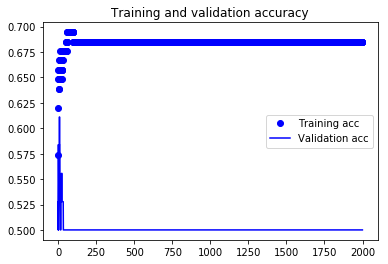

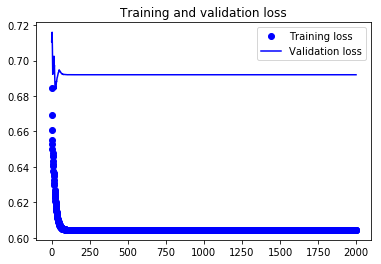

In [213]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [214]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

36/36 [==============================] - 0s 111us/step
test loss: 0.6919848455323113, test accuracy: 0.5


In [215]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.528428093645485


In [216]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  -0.04854368932038833
[[13 10]
 [ 8  5]]


### KMeans

In [320]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                1.297447              0.231356              0.546295   
1                0.766614             -1.227377             -0.605576   
2               -0.431734             -1.183099              1.287522   
3                0.078607             -1.572049              1.188424   
4                0.007655             -1.466562              1.294323   
5               -0.370498              1.671450              0.153543   
6               -0.291598              1.214994             -0.454284   
7                0.069950             -2.315347             -1.489877   
8               -0.492019              1.159708              0.098478   
9                0.452658             -1.370382              0.122635   
10               0.178305             -1.404896             -0.110526   
11              -0.394571             -2.295623             -0.401638   
12               0.825509             -0.879700             -0.340624   
13              -0.567314             -1.474896             -0.684124   
14              -0.287062             -2.507554             -0.996441   
15               1.589945              0.608356              1.711054   
16               1.546148             -0.417533             -1.674934   
17               1.404228             -0.047254              0.691725   
18               0.518614             -0.334892             -1.333394   
19               1.235351              0.809799             -0.698921   
20              -0.483594             -0.266831              0.102686   
21               0.728509             -0.464576             -1.661459   
22               1.170053              0.597229              1.612975   
23               1.225988             -1.042734             -2.231606   
24               0.272811              0.538009              0.918204   
25              -0.521172              1.340198              1.481586   
26              -0.188935              0.665974              1.392134   
27               1.519541             -0.246954              1.208791   
28              -0.405847             -1.303832              1.440527   
29              -1.850113             -1.286361              0.526982   
..                    ...                   ...                   ...   
114              1.085296              1.141590             -1.386728   
115             -1.024369              0.443668             -0.122627   
116              0.572112             -1.055656              0.222883   
117              0.550237             -0.766605             -0.056746   
118              0.378441             -1.897452             -0.229383   
119             -0.936242             -0.306037             -0.207792   
120              1.647950              0.514377             -2.369044   
121              1.150939             -0.633833             -0.604698   
122              0.546853              1.514343              0.069751   
123              1.223435              0.897899              0.213625   
124              0.857062              0.842244             -0.304539   
125              0.730334             -0.675216              0.505721   
126              0.541766             -0.279794              0.749254   
127              0.456191             -0.974577              0.840615   
128              0.712574              0.049329              1.621927   
129              0.675521             -0.012987              1.395059   
130             -0.312450              1.433627              0.708713   
131              0.181615              1.164977             -0.985505   
132              0.260510              0.988101             -0.315543   
133             -0.311371             -1.408386             -1.645724   
134             -0.301269             -0.950573             -1.290638   
135             -0.309830             -0.407406              0.014910   
136             -1.610060              0.941392             -1.

In [321]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[864.0000000000001,
 718.4272269949738,
 620.3882940000645,
 547.0243831595473,
 498.4088405289721,
 452.2938075669829,
 419.0812017663501,
 394.96856155909757,
 378.5884628409906,
 357.339318590697,
 344.59994179556793,
 327.22045118404804,
 316.0718756196303,
 310.81264751973913]

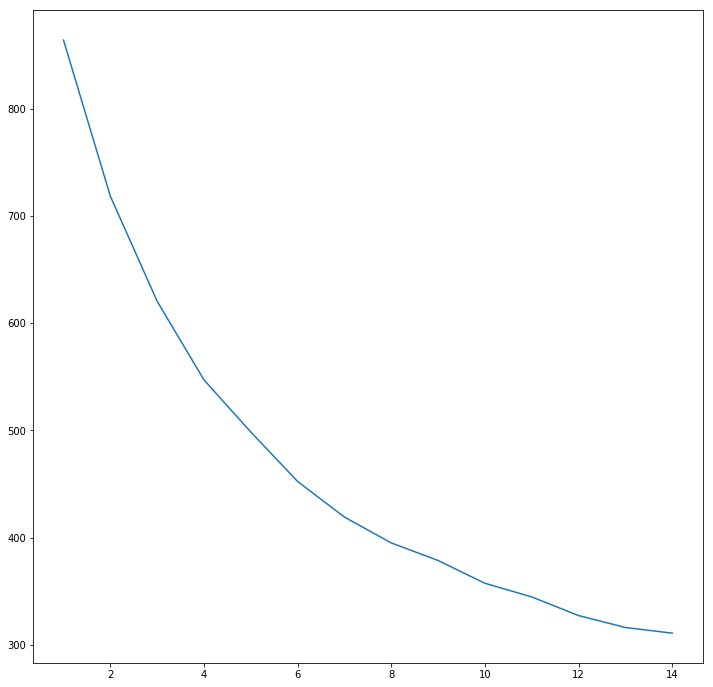

In [322]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=4

In [323]:
kmeans_tc = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans_tc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [324]:
kmeans_tc.labels_

array([3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 3, 2, 3, 3, 3, 2, 3, 3, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 3, 3, 0, 3, 0, 3, 2, 2, 2, 1,
       1, 1, 3, 3, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 0,
       3, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 3, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 1, 0, 3, 0, 2, 0, 0, 3, 2, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1,
       1, 0, 0, 1, 2, 1, 2, 3, 3, 3, 0, 2])

In [325]:
clusters_tc = kmeans_tc.predict(X)
clusters_tc

array([3, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       3, 0, 3, 2, 3, 3, 3, 2, 3, 3, 0, 0, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       2, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 3, 3, 0, 3, 0, 3, 2, 2, 2, 1,
       1, 1, 3, 3, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 0,
       3, 1, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 3, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 1, 0, 3, 0, 2, 0, 0, 3, 2, 0, 0, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1,
       1, 0, 0, 1, 2, 1, 2, 3, 3, 3, 0, 2])

In [326]:
X.loc[:,'Cluster'] = clusters_tc
X.loc[:,'chosen'] = list(y)

In [327]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                1.297447              0.231356              0.546295   
1                0.766614             -1.227377             -0.605576   
2               -0.431734             -1.183099              1.287522   
3                0.078607             -1.572049              1.188424   
4                0.007655             -1.466562              1.294323   
5               -0.370498              1.671450              0.153543   
6               -0.291598              1.214994             -0.454284   
7                0.069950             -2.315347             -1.489877   
8               -0.492019              1.159708              0.098478   
9                0.452658             -1.370382              0.122635   
10               0.178305             -1.404896             -0.110526   
11              -0.394571             -2.295623             -0.401638   
12               0.825509             -0.879700             -0.340624   
13              -0.567314             -1.474896             -0.684124   
14              -0.287062             -2.507554             -0.996441   
15               1.589945              0.608356              1.711054   
16               1.546148             -0.417533             -1.674934   
17               1.404228             -0.047254              0.691725   
18               0.518614             -0.334892             -1.333394   
19               1.235351              0.809799             -0.698921   
20              -0.483594             -0.266831              0.102686   
21               0.728509             -0.464576             -1.661459   
22               1.170053              0.597229              1.612975   
23               1.225988             -1.042734             -2.231606   
24               0.272811              0.538009              0.918204   
25              -0.521172              1.340198              1.481586   
26              -0.188935              0.665974              1.392134   
27               1.519541             -0.246954              1.208791   
28              -0.405847             -1.303832              1.440527   
29              -1.850113             -1.286361              0.526982   
..                    ...                   ...                   ...   
114              1.085296              1.141590             -1.386728   
115             -1.024369              0.443668             -0.122627   
116              0.572112             -1.055656              0.222883   
117              0.550237             -0.766605             -0.056746   
118              0.378441             -1.897452             -0.229383   
119             -0.936242             -0.306037             -0.207792   
120              1.647950              0.514377             -2.369044   
121              1.150939             -0.633833             -0.604698   
122              0.546853              1.514343              0.069751   
123              1.223435              0.897899              0.213625   
124              0.857062              0.842244             -0.304539   
125              0.730334             -0.675216              0.505721   
126              0.541766             -0.279794              0.749254   
127              0.456191             -0.974577              0.840615   
128              0.712574              0.049329              1.621927   
129              0.675521             -0.012987              1.395059   
130             -0.312450              1.433627              0.708713   
131              0.181615              1.164977             -0.985505   
132              0.260510              0.988101             -0.315543   
133             -0.311371             -1.408386             -1.645724   
134             -0.301269             -0.950573             -1.290638   
135             -0.309830             -0.407406              0.014910   
136             -1.610060              0.941392             -1.

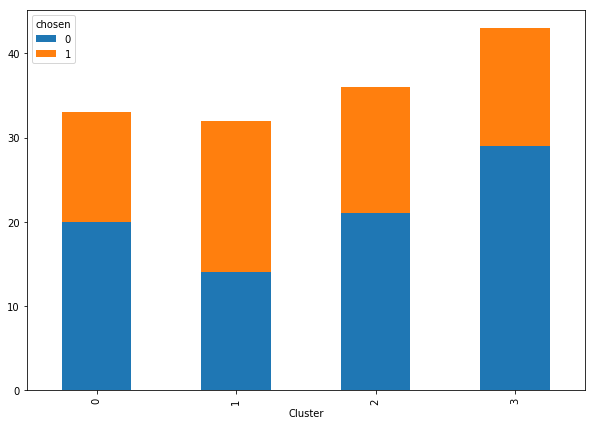

In [328]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [329]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[4]))

## Specialized

### ANN

In [217]:
X = df_n_ps_std_tc[4]

In [218]:
y = df_n_ps[4]['chosen']

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [220]:
X_train.shape

(164, 6)

In [221]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [222]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [223]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [337]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.01, 'max_iter': 300}, que permiten obtener un Accuracy de 68.29% y un Kappa del 36.07
Tiempo total: 25.13 minutos


In [224]:
grid.best_params_={'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'learning_rate_init': 0.01, 'max_iter': 300}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [225]:
input_tensor = Input(shape = (n0,))

In [226]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [227]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [228]:
model.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 6)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 20)                140       
_________________________________________________________________
dense_32 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 21        
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [229]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 164 samples, validate on 55 samples
Epoch 1/300
164/164 [==============================] - 0s 1ms/step - loss: 0.7152 - accuracy: 0.4939 - val_loss: 0.6864 - val_accuracy: 0.6182
Epoch 2/300
164/164 [==============================] - 0s 98us/step - loss: 0.6924 - accuracy: 0.5793 - val_loss: 0.6894 - val_accuracy: 0.5455
Epoch 3/300
164/164 [==============================] - 0s 104us/step - loss: 0.6870 - accuracy: 0.5793 - val_loss: 0.6866 - val_accuracy: 0.6182
Epoch 4/300
164/164 [==============================] - 0s 116us/step - loss: 0.6788 - accuracy: 0.5488 - val_loss: 0.6931 - val_accuracy: 0.5818
Epoch 5/300
164/164 [==============================] - 0s 98us/step - loss: 0.6804 - accuracy: 0.5061 - val_loss: 0.6920 - val_accuracy: 0.5818
Epoch 6/300
164/164 [==============================] - 0s 91us/step - loss: 0.6784 - accuracy: 0.5244 - val_loss: 0.6955 - val_accuracy: 0.5818
Epoch 7/300
164/164 [==============================] - 0s 97us/step - loss: 0.6729 - accur

164/164 [==============================] - 0s 122us/step - loss: 0.5651 - accuracy: 0.7439 - val_loss: 0.7325 - val_accuracy: 0.5636

Epoch 00107: ReduceLROnPlateau reducing learning rate to 9.765624781721272e-06.
Epoch 108/300
164/164 [==============================] - 0s 134us/step - loss: 0.5650 - accuracy: 0.7439 - val_loss: 0.7326 - val_accuracy: 0.5636
Epoch 109/300
164/164 [==============================] - 0s 134us/step - loss: 0.5650 - accuracy: 0.7439 - val_loss: 0.7326 - val_accuracy: 0.5636
Epoch 110/300
164/164 [==============================] - 0s 122us/step - loss: 0.5650 - accuracy: 0.7439 - val_loss: 0.7326 - val_accuracy: 0.5636
Epoch 111/300
164/164 [==============================] - 0s 140us/step - loss: 0.5650 - accuracy: 0.7439 - val_loss: 0.7326 - val_accuracy: 0.5636
Epoch 112/300
164/164 [==============================] - 0s 128us/step - loss: 0.5650 - accuracy: 0.7439 - val_loss: 0.7326 - val_accuracy: 0.5636
Epoch 113/300
164/164 [============================

164/164 [==============================] - 0s 134us/step - loss: 0.5648 - accuracy: 0.7439 - val_loss: 0.7327 - val_accuracy: 0.5636
Epoch 213/300
164/164 [==============================] - 0s 128us/step - loss: 0.5648 - accuracy: 0.7439 - val_loss: 0.7327 - val_accuracy: 0.5636
Epoch 214/300
164/164 [==============================] - 0s 110us/step - loss: 0.5648 - accuracy: 0.7439 - val_loss: 0.7327 - val_accuracy: 0.5636
Epoch 215/300
164/164 [==============================] - 0s 116us/step - loss: 0.5648 - accuracy: 0.7439 - val_loss: 0.7327 - val_accuracy: 0.5636
Epoch 216/300
164/164 [==============================] - 0s 116us/step - loss: 0.5648 - accuracy: 0.7439 - val_loss: 0.7327 - val_accuracy: 0.5636
Epoch 217/300
164/164 [==============================] - 0s 122us/step - loss: 0.5648 - accuracy: 0.7439 - val_loss: 0.7327 - val_accuracy: 0.5636

Epoch 00217: ReduceLROnPlateau reducing learning rate to 4.76837147544984e-09.
Epoch 218/300
164/164 [=============================

range(0, 300)


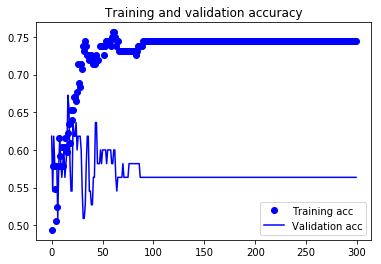

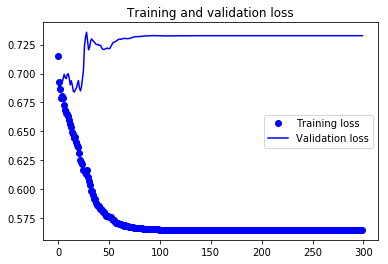

In [230]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [231]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

55/55 [==============================] - 0s 55us/step
test loss: 0.732729638706554, test accuracy: 0.5636363625526428


In [232]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.5621693121693122


In [233]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.12350597609561753
[[19  9]
 [15 12]]


### KMeans

In [348]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0               -1.035481              1.779354              1.874576   
1                0.965487             -0.399971             -1.606069   
2               -0.141249             -1.969933             -0.960470   
3               -1.590590             -0.729741             -0.575342   
4               -0.391524             -0.894181             -0.426309   
5               -1.256622             -0.886861             -0.850243   
6               -1.579202              0.121365             -0.522749   
7               -1.760350             -0.182429             -0.008789   
8                1.115526              1.555384              0.609404   
9                1.467291              1.402697              0.806896   
10               0.972379              1.550575             -0.223468   
11               0.294385              0.890870              0.493531   
12               0.795134              0.176458              1.588747   
13               0.694481              0.577820              0.319393   
14               1.169114              0.075245             -0.980006   
15               0.962642              0.380225             -1.261850   
16               1.352245              0.463507             -0.679184   
17               1.784002             -1.453636             -1.128885   
18               0.929212             -0.538274             -1.016394   
19               1.199761             -0.727252              0.322239   
20              -0.485056              0.796900              0.581966   
21              -0.547233              0.692440             -0.162284   
22               1.446103             -0.074850             -0.132752   
23              -0.312063              0.030270             -1.160963   
24               1.175126             -0.143713             -0.522479   
25              -1.044292             -0.058933             -1.340279   
26              -0.849044              0.079838             -0.400536   
27              -0.730672             -0.326196             -0.478608   
28              -0.380922             -0.892886             -0.555313   
29              -0.368302             -1.168844             -0.094765   
..                    ...                   ...                   ...   
189             -1.023243              0.827082              0.695531   
190              1.643548             -0.570770              0.545333   
191              1.543182             -0.533850              0.979103   
192              1.416929             -1.770555              0.592692   
193             -1.336444              0.162214             -1.528887   
194             -0.331197             -0.545328              0.449891   
195             -0.991382             -0.378373             -0.215170   
196              0.827092              0.502299              0.219306   
197              0.976291              0.325663             -0.091820   
198              0.903378              0.857383              0.090549   
199             -1.135922             -0.217483             -0.201444   
200             -1.143077             -0.289624             -0.109440   
201             -1.325584             -0.109383             -0.850284   
202              0.270878              1.568003             -0.899682   
203             -0.010376              1.403657             -0.298654   
204             -0.149606              0.679408             -0.527828   
205             -1.281900              0.472582              2.041397   
206             -1.561361              0.699591              0.373931   
207             -0.548022              0.646014             -0.015758   
208             -0.689835              0.729721              0.242422   
209             -1.182263              0.898528              0.655331   
210             -0.465862              0.576977             -0.088421   
211             -0.265321              1.252143              0.

In [349]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[1314.0,
 1103.6617898421102,
 933.9046374976435,
 830.0952355796812,
 752.8157274494505,
 696.8283563577859,
 641.355058887789,
 599.6834692450786,
 558.0899857646746,
 538.6016435622136,
 502.540180641064,
 477.03865333096127,
 457.1745404655215,
 443.08717934712786]

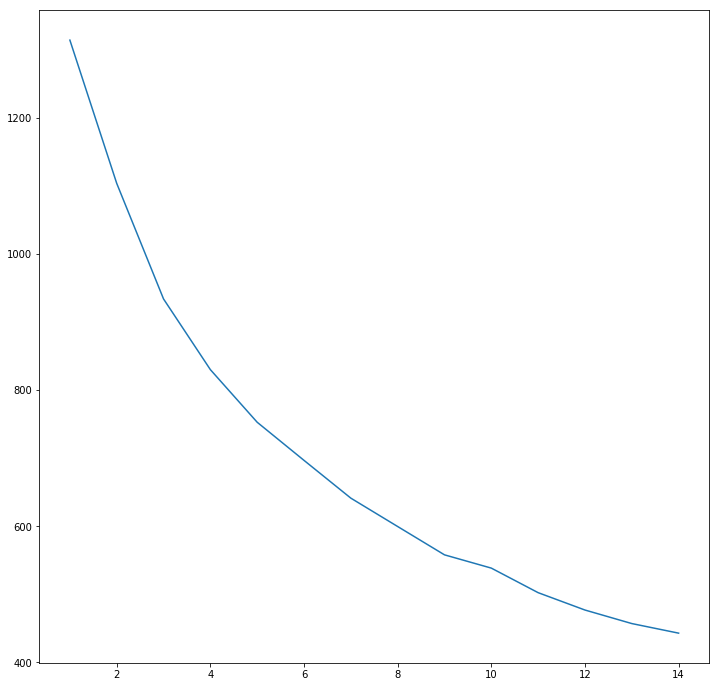

In [350]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=3

In [351]:
kmeans_tc = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_tc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [352]:
kmeans_tc.labels_

array([2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1])

In [353]:
clusters_tc = kmeans_tc.predict(X)
clusters_tc

array([2, 2, 0, 1, 0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       0, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 1, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 2, 2, 2,
       0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1])

In [354]:
X.loc[:,'Cluster'] = clusters_tc
X.loc[:,'chosen'] = list(y)

In [355]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0               -1.035481              1.779354              1.874576   
1                0.965487             -0.399971             -1.606069   
2               -0.141249             -1.969933             -0.960470   
3               -1.590590             -0.729741             -0.575342   
4               -0.391524             -0.894181             -0.426309   
5               -1.256622             -0.886861             -0.850243   
6               -1.579202              0.121365             -0.522749   
7               -1.760350             -0.182429             -0.008789   
8                1.115526              1.555384              0.609404   
9                1.467291              1.402697              0.806896   
10               0.972379              1.550575             -0.223468   
11               0.294385              0.890870              0.493531   
12               0.795134              0.176458              1.588747   
13               0.694481              0.577820              0.319393   
14               1.169114              0.075245             -0.980006   
15               0.962642              0.380225             -1.261850   
16               1.352245              0.463507             -0.679184   
17               1.784002             -1.453636             -1.128885   
18               0.929212             -0.538274             -1.016394   
19               1.199761             -0.727252              0.322239   
20              -0.485056              0.796900              0.581966   
21              -0.547233              0.692440             -0.162284   
22               1.446103             -0.074850             -0.132752   
23              -0.312063              0.030270             -1.160963   
24               1.175126             -0.143713             -0.522479   
25              -1.044292             -0.058933             -1.340279   
26              -0.849044              0.079838             -0.400536   
27              -0.730672             -0.326196             -0.478608   
28              -0.380922             -0.892886             -0.555313   
29              -0.368302             -1.168844             -0.094765   
..                    ...                   ...                   ...   
189             -1.023243              0.827082              0.695531   
190              1.643548             -0.570770              0.545333   
191              1.543182             -0.533850              0.979103   
192              1.416929             -1.770555              0.592692   
193             -1.336444              0.162214             -1.528887   
194             -0.331197             -0.545328              0.449891   
195             -0.991382             -0.378373             -0.215170   
196              0.827092              0.502299              0.219306   
197              0.976291              0.325663             -0.091820   
198              0.903378              0.857383              0.090549   
199             -1.135922             -0.217483             -0.201444   
200             -1.143077             -0.289624             -0.109440   
201             -1.325584             -0.109383             -0.850284   
202              0.270878              1.568003             -0.899682   
203             -0.010376              1.403657             -0.298654   
204             -0.149606              0.679408             -0.527828   
205             -1.281900              0.472582              2.041397   
206             -1.561361              0.699591              0.373931   
207             -0.548022              0.646014             -0.015758   
208             -0.689835              0.729721              0.242422   
209             -1.182263              0.898528              0.655331   
210             -0.465862              0.576977             -0.088421   
211             -0.265321              1.252143              0.

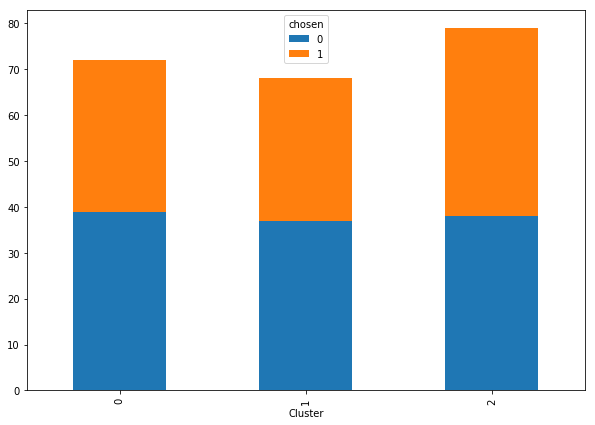

In [356]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [357]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[5]))

## Urban Place

### ANN

In [234]:
X = df_n_ps_std_tc[5]

In [235]:
y = df_n_ps[5]['chosen']

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [237]:
X_train.shape

(162, 6)

In [238]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [239]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [240]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [365]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (30, 20, 10), 'learning_rate_init': 0.01, 'max_iter': 300}, que permiten obtener un Accuracy de 77.78% y un Kappa del 47.35
Tiempo total: 27.94 minutos


In [241]:
grid.best_params_={'activation': 'tanh', 'hidden_layer_sizes': (30, 20, 10), 'learning_rate_init': 0.01, 'max_iter': 300}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [242]:
input_tensor = Input(shape = (n0,))

In [243]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [244]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [245]:
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 6)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 30)                210       
_________________________________________________________________
dense_35 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 11        
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


In [246]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 162 samples, validate on 54 samples
Epoch 1/300
162/162 [==============================] - 0s 3ms/step - loss: 0.6994 - accuracy: 0.5370 - val_loss: 0.5857 - val_accuracy: 0.6852
Epoch 2/300
162/162 [==============================] - 0s 121us/step - loss: 0.6278 - accuracy: 0.6914 - val_loss: 0.5539 - val_accuracy: 0.7037
Epoch 3/300
162/162 [==============================] - 0s 117us/step - loss: 0.6073 - accuracy: 0.7099 - val_loss: 0.5637 - val_accuracy: 0.7407
Epoch 4/300
162/162 [==============================] - 0s 117us/step - loss: 0.5976 - accuracy: 0.6852 - val_loss: 0.5488 - val_accuracy: 0.7407
Epoch 5/300
162/162 [==============================] - 0s 111us/step - loss: 0.5667 - accuracy: 0.7037 - val_loss: 0.5419 - val_accuracy: 0.7593
Epoch 6/300
162/162 [==============================] - 0s 142us/step - loss: 0.5646 - accuracy: 0.7284 - val_loss: 0.5491 - val_accuracy: 0.7778
Epoch 7/300
162/162 [==============================] - 0s 111us/step - loss: 0.5514 - a

Epoch 55/300
162/162 [==============================] - 0s 130us/step - loss: 0.3179 - accuracy: 0.8765 - val_loss: 0.5596 - val_accuracy: 0.7407
Epoch 56/300
162/162 [==============================] - 0s 117us/step - loss: 0.3171 - accuracy: 0.8827 - val_loss: 0.5607 - val_accuracy: 0.7407

Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
Epoch 57/300
162/162 [==============================] - 0s 148us/step - loss: 0.3161 - accuracy: 0.8827 - val_loss: 0.5605 - val_accuracy: 0.7407
Epoch 58/300
162/162 [==============================] - 0s 117us/step - loss: 0.3155 - accuracy: 0.8827 - val_loss: 0.5603 - val_accuracy: 0.7407
Epoch 59/300
162/162 [==============================] - 0s 123us/step - loss: 0.3152 - accuracy: 0.8827 - val_loss: 0.5610 - val_accuracy: 0.7407
Epoch 60/300
162/162 [==============================] - 0s 142us/step - loss: 0.3146 - accuracy: 0.8827 - val_loss: 0.5610 - val_accuracy: 0.7593
Epoch 61/300
162/162 [=====================

Epoch 108/300
162/162 [==============================] - 0s 117us/step - loss: 0.3086 - accuracy: 0.8827 - val_loss: 0.5696 - val_accuracy: 0.7407
Epoch 109/300
162/162 [==============================] - 0s 111us/step - loss: 0.3086 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 110/300
162/162 [==============================] - 0s 111us/step - loss: 0.3085 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 111/300
162/162 [==============================] - 0s 130us/step - loss: 0.3085 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 112/300
162/162 [==============================] - 0s 130us/step - loss: 0.3085 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 113/300
162/162 [==============================] - 0s 123us/step - loss: 0.3085 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 114/300
162/162 [==============================] - 0s 117us/step - loss: 0.3085 - accuracy: 0.8827 - val_loss: 0

Epoch 161/300
162/162 [==============================] - 0s 117us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 162/300
162/162 [==============================] - 0s 123us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 163/300
162/162 [==============================] - 0s 117us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 164/300
162/162 [==============================] - 0s 111us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 165/300
162/162 [==============================] - 0s 117us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 166/300
162/162 [==============================] - 0s 123us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407

Epoch 00166: ReduceLROnPlateau reducing learning rate to 1.5258788721439487e-07.
Epoch 167/300
162/162 [=============

Epoch 214/300
162/162 [==============================] - 0s 111us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 215/300
162/162 [==============================] - 0s 111us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 216/300
162/162 [==============================] - 0s 117us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407

Epoch 00216: ReduceLROnPlateau reducing learning rate to 4.76837147544984e-09.
Epoch 217/300
162/162 [==============================] - 0s 111us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 218/300
162/162 [==============================] - 0s 105us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 219/300
162/162 [==============================] - 0s 99us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 220/300
162/162 [================


Epoch 00266: ReduceLROnPlateau reducing learning rate to 1.490116086078075e-10.
Epoch 267/300
162/162 [==============================] - 0s 111us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 268/300
162/162 [==============================] - 0s 111us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 269/300
162/162 [==============================] - 0s 111us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 270/300
162/162 [==============================] - 0s 123us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 271/300
162/162 [==============================] - 0s 117us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 272/300
162/162 [==============================] - 0s 105us/step - loss: 0.3083 - accuracy: 0.8827 - val_loss: 0.5695 - val_accuracy: 0.7407
Epoch 273/300
162/162 [==============

range(0, 300)


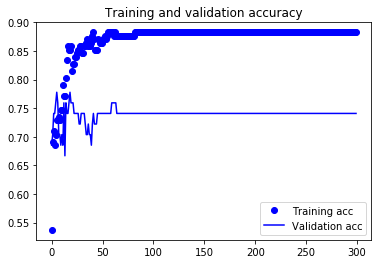

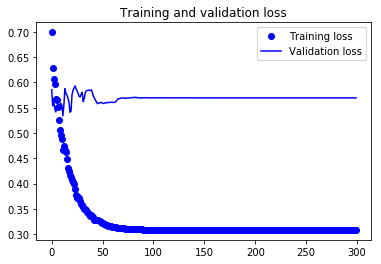

In [247]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [248]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

54/54 [==============================] - 0s 93us/step
test loss: 0.5695377522044711, test accuracy: 0.7407407164573669


In [249]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.7103174603174603


In [250]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.32978723404255317
[[33  9]
 [ 5  7]]


### KMeans

In [376]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                1.228153             -0.111909             -0.294563   
1               -0.401824             -1.384577              0.881209   
2               -0.336916             -0.720621              0.201084   
3               -0.787942              0.336222              0.156622   
4               -0.881888              0.404050              0.352235   
5               -1.125948              0.284207              0.528151   
6                1.864495             -0.090865              0.716920   
7                1.240845              0.249843              0.223925   
8                0.875601              0.686409              0.502905   
9                0.394121              0.865626             -1.374420   
10               0.751603              1.089250              0.142673   
11               0.799422              0.971011             -0.358468   
12              -1.418160             -0.117060             -0.366533   
13              -0.071703             -1.115223              1.951631   
14              -1.278259             -0.004256             -0.388294   
15              -1.348400             -0.882436              0.081470   
16              -0.987764             -0.403920              1.221277   
17               0.282941              1.065034             -0.777297   
18               0.002045              1.240340             -0.913457   
19               0.177116              1.115065             -2.614488   
20              -0.182803             -1.516954             -0.973426   
21              -0.170806             -1.685146             -0.648144   
22              -0.119763             -1.154938              1.627973   
23              -1.077572              1.088539              0.971213   
24              -1.019809              1.064143              0.982876   
25              -1.096888              1.018525             -0.188419   
26              -0.429215              1.178614              1.291963   
27              -1.200365             -0.470005              0.534275   
28               0.871997              0.424606              1.290033   
29               1.244370              0.591384              1.478840   
..                    ...                   ...                   ...   
186             -0.605024              0.939574             -0.414421   
187              1.718038             -0.200165             -1.447107   
188             -0.120106              0.965845             -0.131325   
189              1.029001              0.908828             -0.420421   
190              1.615723              1.026251             -0.662886   
191              1.115026              0.462103             -1.306277   
192              0.811902              1.116173              0.339093   
193              1.133130              1.175484             -0.668705   
194             -0.345830             -1.335691              1.110949   
195              1.165388              0.181448             -1.067468   
196              1.372897             -0.178593             -0.344421   
197              0.993975             -1.109603             -0.268101   
198              0.910787             -0.689305              0.054775   
199              0.754410              1.007018              0.000807   
200              1.100934              0.748340             -0.138155   
201              0.898432              0.993838              0.300420   
202              2.023069              0.128358              2.552718   
203              0.513160             -0.063505              1.308959   
204              0.509622              0.239118              1.804994   
205              1.142153              1.127451              0.307006   
206              0.900240              1.251079              0.039424   
207              0.996446              1.228929              0.310422   
208             -1.699954              0.922256             -1.

In [377]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[1296.0,
 1078.1827047277895,
 923.3020026239071,
 819.5563896253416,
 739.7801417823988,
 674.6658680669257,
 625.7817512921029,
 571.4893390980873,
 532.4311978233743,
 507.9160125320259,
 477.7010786792888,
 447.87692991955134,
 435.1097377466632,
 418.2600781645563]

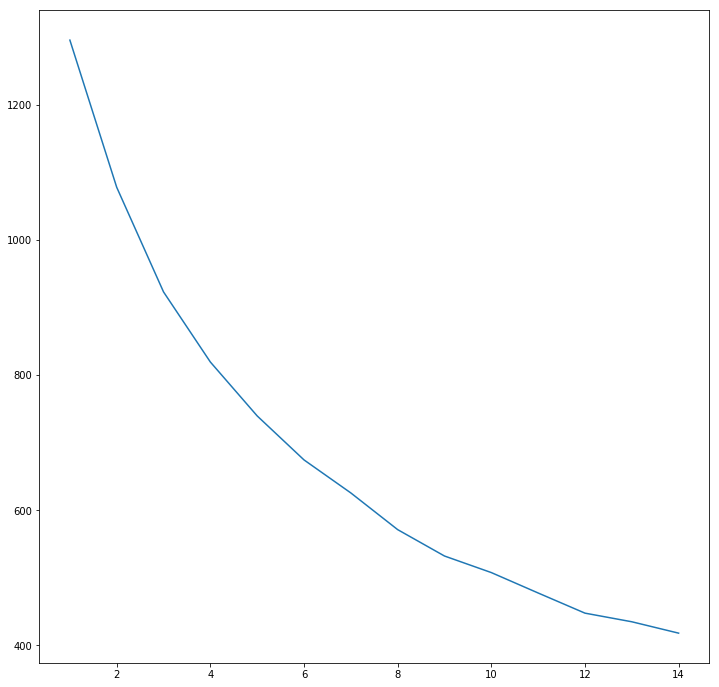

In [378]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=3

In [379]:
kmeans_tc = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_tc.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [380]:
kmeans_tc.labels_

array([0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1])

In [381]:
clusters_tc = kmeans_tc.predict(X)
clusters_tc

array([0, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 2, 2, 1, 1, 2, 0, 0, 2,
       0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 1, 2,
       1, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1])

In [382]:
X.loc[:,'Cluster'] = clusters_tc
X.loc[:,'chosen'] = list(y)

In [383]:
X

tonalcentroidfiles_1  tonalcentroidfiles_2  tonalcentroidfiles_3  \
0                1.228153             -0.111909             -0.294563   
1               -0.401824             -1.384577              0.881209   
2               -0.336916             -0.720621              0.201084   
3               -0.787942              0.336222              0.156622   
4               -0.881888              0.404050              0.352235   
5               -1.125948              0.284207              0.528151   
6                1.864495             -0.090865              0.716920   
7                1.240845              0.249843              0.223925   
8                0.875601              0.686409              0.502905   
9                0.394121              0.865626             -1.374420   
10               0.751603              1.089250              0.142673   
11               0.799422              0.971011             -0.358468   
12              -1.418160             -0.117060             -0.366533   
13              -0.071703             -1.115223              1.951631   
14              -1.278259             -0.004256             -0.388294   
15              -1.348400             -0.882436              0.081470   
16              -0.987764             -0.403920              1.221277   
17               0.282941              1.065034             -0.777297   
18               0.002045              1.240340             -0.913457   
19               0.177116              1.115065             -2.614488   
20              -0.182803             -1.516954             -0.973426   
21              -0.170806             -1.685146             -0.648144   
22              -0.119763             -1.154938              1.627973   
23              -1.077572              1.088539              0.971213   
24              -1.019809              1.064143              0.982876   
25              -1.096888              1.018525             -0.188419   
26              -0.429215              1.178614              1.291963   
27              -1.200365             -0.470005              0.534275   
28               0.871997              0.424606              1.290033   
29               1.244370              0.591384              1.478840   
..                    ...                   ...                   ...   
186             -0.605024              0.939574             -0.414421   
187              1.718038             -0.200165             -1.447107   
188             -0.120106              0.965845             -0.131325   
189              1.029001              0.908828             -0.420421   
190              1.615723              1.026251             -0.662886   
191              1.115026              0.462103             -1.306277   
192              0.811902              1.116173              0.339093   
193              1.133130              1.175484             -0.668705   
194             -0.345830             -1.335691              1.110949   
195              1.165388              0.181448             -1.067468   
196              1.372897             -0.178593             -0.344421   
197              0.993975             -1.109603             -0.268101   
198              0.910787             -0.689305              0.054775   
199              0.754410              1.007018              0.000807   
200              1.100934              0.748340             -0.138155   
201              0.898432              0.993838              0.300420   
202              2.023069              0.128358              2.552718   
203              0.513160             -0.063505              1.308959   
204              0.509622              0.239118              1.804994   
205              1.142153              1.127451              0.307006   
206              0.900240              1.251079              0.039424   
207              0.996446              1.228929              0.310422   
208             -1.699954              0.922256             -1.

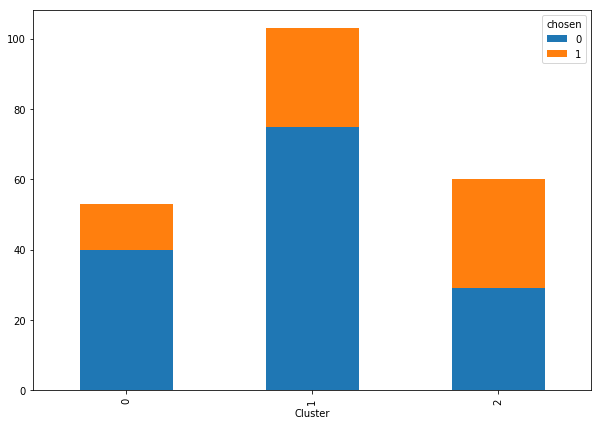

In [384]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

# Chromagram

In [15]:
df_n_ps_std[0].columns

Index(['durationfiles', 'rmsfiles', 'rmsmedianfiles', 'lowenergyfiles',
       'ASRfiles', 'beatspectrumfiles', 'eventdensityfiles', 'tempofiles',
       'pulseclarityfiles', 'zerocrossfiles', 'rolloffsfiles',
       'brightnessfiles', 'spreadfiles', 'centroidfiles', 'kurtosisfiles',
       'flatnessfiles', 'entropyfiles', 'mfccfiles_1', 'mfccfiles_2',
       'mfccfiles_3', 'mfccfiles_4', 'mfccfiles_5', 'mfccfiles_6',
       'mfccfiles_7', 'mfccfiles_8', 'mfccfiles_9', 'mfccfiles_10',
       'mfccfiles_11', 'mfccfiles_12', 'mfccfiles_13', 'inharmonicityfiles',
       'bestkeyfiles', 'keyclarityfiles', 'modalityfiles',
       'tonalcentroidfiles_1', 'tonalcentroidfiles_2', 'tonalcentroidfiles_3',
       'tonalcentroidfiles_4', 'tonalcentroidfiles_5', 'tonalcentroidfiles_6',
       'chromagramfiles_1', 'chromagramfiles_2', 'chromagramfiles_3',
       'chromagramfiles_4', 'chromagramfiles_5', 'chromagramfiles_6',
       'chromagramfiles_7', 'chromagramfiles_8', 'chromagramfiles_9',
      

In [16]:
df_n_ps_std[0].columns[40:52]

Index(['chromagramfiles_1', 'chromagramfiles_2', 'chromagramfiles_3',
       'chromagramfiles_4', 'chromagramfiles_5', 'chromagramfiles_6',
       'chromagramfiles_7', 'chromagramfiles_8', 'chromagramfiles_9',
       'chromagramfiles_10', 'chromagramfiles_11', 'chromagramfiles_12'],
      dtype='object')

In [17]:
df_n_ps_std_ch = [None]*len(companies)
for i in range(len(companies)):
    df_n_ps_std_ch[i] = pd.DataFrame(df_n_ps_std[i].iloc[:,40:52])
    df_n_ps_std_ch[i].columns=df_n_ps_std[i].columns[40:52]
df_n_ps_std_ch[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 12 columns):
chromagramfiles_1     315 non-null float64
chromagramfiles_2     315 non-null float64
chromagramfiles_3     315 non-null float64
chromagramfiles_4     315 non-null float64
chromagramfiles_5     315 non-null float64
chromagramfiles_6     315 non-null float64
chromagramfiles_7     315 non-null float64
chromagramfiles_8     315 non-null float64
chromagramfiles_9     315 non-null float64
chromagramfiles_10    315 non-null float64
chromagramfiles_11    315 non-null float64
chromagramfiles_12    315 non-null float64
dtypes: float64(12)
memory usage: 29.6 KB


## Arte Francés

### ANN

In [257]:
X = df_n_ps_std_ch[0]

In [258]:
y = df_n_ps[0]['chosen']

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [260]:
X_train.shape

(236, 12)

In [261]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [262]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [263]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [395]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.003, 'max_iter': 200}, que permiten obtener un Accuracy de 75.85% y un Kappa del 35.14
Tiempo total: 30.13 minutos


In [264]:
grid.best_params_={'activation': 'tanh', 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.003, 'max_iter': 200}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [265]:
input_tensor = Input(shape = (n0,))

In [266]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [267]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [268]:
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 12)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_44 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_45 (Dense)             (None, 1)                 31        
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [269]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 236 samples, validate on 79 samples
Epoch 1/200
236/236 [==============================] - 0s 1ms/step - loss: 0.6878 - accuracy: 0.5508 - val_loss: 0.6586 - val_accuracy: 0.6456
Epoch 2/200
236/236 [==============================] - 0s 68us/step - loss: 0.6056 - accuracy: 0.6780 - val_loss: 0.6321 - val_accuracy: 0.6582
Epoch 3/200
236/236 [==============================] - 0s 76us/step - loss: 0.5653 - accuracy: 0.7161 - val_loss: 0.6140 - val_accuracy: 0.7089
Epoch 4/200
236/236 [==============================] - 0s 114us/step - loss: 0.5449 - accuracy: 0.7542 - val_loss: 0.6089 - val_accuracy: 0.7342
Epoch 5/200
236/236 [==============================] - 0s 68us/step - loss: 0.5377 - accuracy: 0.7373 - val_loss: 0.6197 - val_accuracy: 0.7342
Epoch 6/200
236/236 [==============================] - 0s 68us/step - loss: 0.5268 - accuracy: 0.7458 - val_loss: 0.6108 - val_accuracy: 0.7342
Epoch 7/200
236/236 [==============================] - 0s 68us/step - loss: 0.5220 - accura

236/236 [==============================] - 0s 97us/step - loss: 0.2210 - accuracy: 0.9576 - val_loss: 0.6765 - val_accuracy: 0.7848
Epoch 109/200
236/236 [==============================] - 0s 97us/step - loss: 0.2210 - accuracy: 0.9576 - val_loss: 0.6765 - val_accuracy: 0.7848
Epoch 110/200
236/236 [==============================] - 0s 102us/step - loss: 0.2210 - accuracy: 0.9576 - val_loss: 0.6765 - val_accuracy: 0.7848
Epoch 111/200
236/236 [==============================] - 0s 106us/step - loss: 0.2209 - accuracy: 0.9576 - val_loss: 0.6765 - val_accuracy: 0.7848
Epoch 112/200
236/236 [==============================] - 0s 93us/step - loss: 0.2209 - accuracy: 0.9576 - val_loss: 0.6765 - val_accuracy: 0.7848
Epoch 113/200
236/236 [==============================] - 0s 106us/step - loss: 0.2209 - accuracy: 0.9576 - val_loss: 0.6765 - val_accuracy: 0.7848
Epoch 114/200
236/236 [==============================] - 0s 89us/step - loss: 0.2208 - accuracy: 0.9576 - val_loss: 0.6764 - val_accura

range(0, 200)


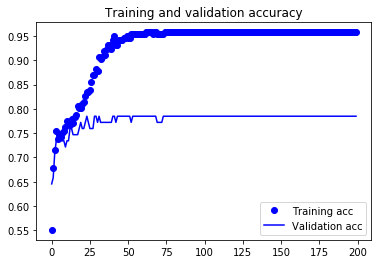

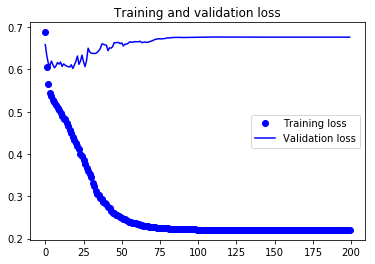

In [270]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [271]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

79/79 [==============================] - 0s 89us/step
test loss: 0.6762231539321851, test accuracy: 0.7848101258277893


In [272]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.6412151067323482


In [273]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.36138849262957684
[[54  4]
 [13  8]]


### KMeans

In [406]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0             1.713160           0.038243           2.143431   
1             1.315247           0.387677           1.394548   
2             1.737505          -1.440944          -1.114255   
3             1.737506          -1.127088          -0.672464   
4             1.737506           1.455410           0.333584   
5            -1.313694          -1.631596          -0.954634   
6             0.343081          -0.554660          -0.305290   
7             1.109261          -0.479083          -0.201140   
8             1.737506           0.431527          -0.310582   
9            -1.315956          -1.270342          -0.635019   
10            1.592092           0.167770           1.676372   
11            1.737506           0.061168          -0.198190   
12            1.047772           0.511390           0.649199   
13            0.985207           0.757573           0.728808   
14           -1.092408           0.724395          -0.854683   
15           -0.257098          -0.953113          -0.826836   
16           -1.038548          -1.285038          -0.897336   
17           -0.743373          -1.006359          -0.304526   
18           -0.506076           0.745202           0.557874   
19           -0.619836          -0.900602           0.192155   
20            0.236496           1.024573           2.143431   
21           -0.969823           0.186258          -0.649182   
22           -0.477230          -0.147047          -0.472900   
23           -0.402673          -1.613310           0.859201   
24            1.036252          -0.180424           2.143430   
25            1.009571          -0.114262           0.491121   
26            1.737505          -0.691965           0.794800   
27            0.952878          -0.600113           1.564652   
28            0.090687          -1.135658           1.025879   
29            1.334056           1.036213           0.310885   
..                 ...                ...                ...   
285          -0.818809           0.795687          -0.418744   
286          -1.350808          -0.132215           1.939439   
287          -0.268283          -1.246560          -0.948278   
288          -1.499565          -1.477911          -1.400613   
289          -0.316037          -1.101863          -0.979251   
290          -1.429079          -0.014357          -0.502745   
291           0.142459           0.454640          -1.378454   
292           0.369579           0.015402          -0.629733   
293           1.737506          -0.048004           1.588206   
294          -0.072827          -0.808718           2.143431   
295           1.096294          -0.192606           0.838680   
296           1.197861          -0.481339          -0.039784   
297           0.831369          -0.845061          -0.412444   
298           1.129174          -0.778390          -0.347478   
299           1.235661           0.246339          -0.055182   
300           1.617641           0.157580           0.320652   
301           0.904215          -0.238528           0.650660   
302          -1.571329           2.288385          -0.858389   
303          -1.111497           1.012712          -0.373804   
304          -0.632774           2.288385           1.193051   
305          -1.675063           0.049104          -0.121444   
306          -1.675063          -0.302934           1.841519   
307          -1.675063          -0.345332           0.759301   
308          -0.701240          -0.718707           2.143431   
309           0.283947          -0.770573           2.143431   
310          -0.684797          -0.424879           1.965265   
311          -0.063614           0.387844           1.083088   
312           1.272215           0.276107           2.143431   
313          -1.349102           0.408011          -0.212504   
314           0.377466          -0.342265          -0.366249   

     chromagramfiles_4  chromagramfi

In [407]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[3780.0,
 3195.1235725667257,
 2811.651587927651,
 2629.426866311046,
 2498.0440346782034,
 2372.504055975522,
 2279.167916120524,
 2172.592510139712,
 2092.9155365617485,
 2035.7890606826481,
 1937.9162920732826,
 1905.3053295274888,
 1820.7622703061425,
 1785.824822903035]

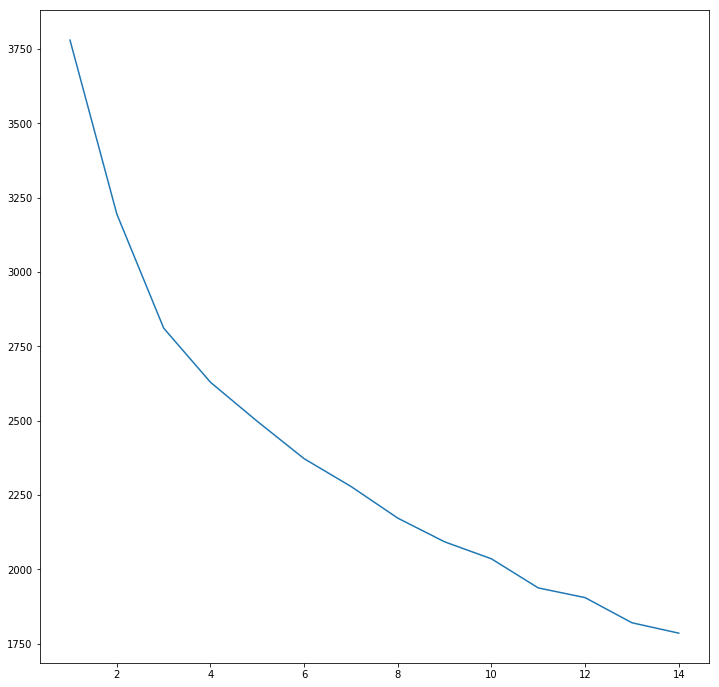

In [408]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=3

In [409]:
kmeans_ch = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_ch.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [410]:
kmeans_ch.labels_

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0,
       1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [411]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1,
       1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0,
       0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0,
       1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [412]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [413]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0             1.713160           0.038243           2.143431   
1             1.315247           0.387677           1.394548   
2             1.737505          -1.440944          -1.114255   
3             1.737506          -1.127088          -0.672464   
4             1.737506           1.455410           0.333584   
5            -1.313694          -1.631596          -0.954634   
6             0.343081          -0.554660          -0.305290   
7             1.109261          -0.479083          -0.201140   
8             1.737506           0.431527          -0.310582   
9            -1.315956          -1.270342          -0.635019   
10            1.592092           0.167770           1.676372   
11            1.737506           0.061168          -0.198190   
12            1.047772           0.511390           0.649199   
13            0.985207           0.757573           0.728808   
14           -1.092408           0.724395          -0.854683   
15           -0.257098          -0.953113          -0.826836   
16           -1.038548          -1.285038          -0.897336   
17           -0.743373          -1.006359          -0.304526   
18           -0.506076           0.745202           0.557874   
19           -0.619836          -0.900602           0.192155   
20            0.236496           1.024573           2.143431   
21           -0.969823           0.186258          -0.649182   
22           -0.477230          -0.147047          -0.472900   
23           -0.402673          -1.613310           0.859201   
24            1.036252          -0.180424           2.143430   
25            1.009571          -0.114262           0.491121   
26            1.737505          -0.691965           0.794800   
27            0.952878          -0.600113           1.564652   
28            0.090687          -1.135658           1.025879   
29            1.334056           1.036213           0.310885   
..                 ...                ...                ...   
285          -0.818809           0.795687          -0.418744   
286          -1.350808          -0.132215           1.939439   
287          -0.268283          -1.246560          -0.948278   
288          -1.499565          -1.477911          -1.400613   
289          -0.316037          -1.101863          -0.979251   
290          -1.429079          -0.014357          -0.502745   
291           0.142459           0.454640          -1.378454   
292           0.369579           0.015402          -0.629733   
293           1.737506          -0.048004           1.588206   
294          -0.072827          -0.808718           2.143431   
295           1.096294          -0.192606           0.838680   
296           1.197861          -0.481339          -0.039784   
297           0.831369          -0.845061          -0.412444   
298           1.129174          -0.778390          -0.347478   
299           1.235661           0.246339          -0.055182   
300           1.617641           0.157580           0.320652   
301           0.904215          -0.238528           0.650660   
302          -1.571329           2.288385          -0.858389   
303          -1.111497           1.012712          -0.373804   
304          -0.632774           2.288385           1.193051   
305          -1.675063           0.049104          -0.121444   
306          -1.675063          -0.302934           1.841519   
307          -1.675063          -0.345332           0.759301   
308          -0.701240          -0.718707           2.143431   
309           0.283947          -0.770573           2.143431   
310          -0.684797          -0.424879           1.965265   
311          -0.063614           0.387844           1.083088   
312           1.272215           0.276107           2.143431   
313          -1.349102           0.408011          -0.212504   
314           0.377466          -0.342265          -0.366249   

     chromagramfiles_4  chromagramfi

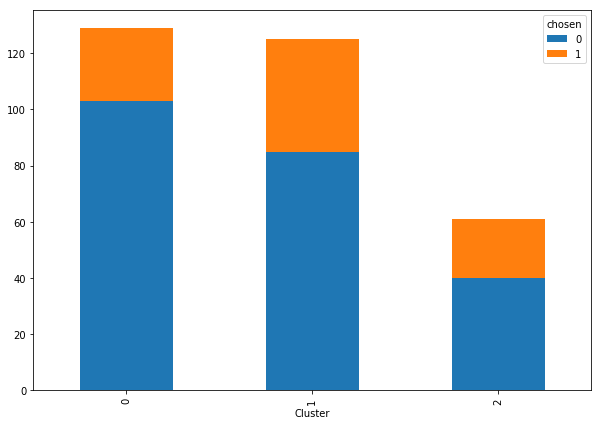

In [414]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [415]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[1]))

## Club De Banqueros y Empresarios

### ANN

In [274]:
X = df_n_ps_std_ch[1]

In [275]:
y = df_n_ps[1]['chosen']

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [277]:
X_train.shape

(191, 12)

In [278]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [279]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [280]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [423]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (10, 10), 'learning_rate_init': 0.003, 'max_iter': 200}, que permiten obtener un Accuracy de 76.96% y un Kappa del 34.08
Tiempo total: 25.99 minutos


In [281]:
grid.best_params_ = {'activation': 'tanh', 'hidden_layer_sizes': (10, 10), 'learning_rate_init': 0.003, 'max_iter': 200}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [282]:
input_tensor = Input(shape = (n0,))

In [283]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [284]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [285]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 12)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_47 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [286]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 191 samples, validate on 64 samples
Epoch 1/200
191/191 [==============================] - 0s 1ms/step - loss: 0.7087 - accuracy: 0.5288 - val_loss: 0.7177 - val_accuracy: 0.5000
Epoch 2/200
191/191 [==============================] - 0s 84us/step - loss: 0.6727 - accuracy: 0.5916 - val_loss: 0.6935 - val_accuracy: 0.5312
Epoch 3/200
191/191 [==============================] - 0s 84us/step - loss: 0.6477 - accuracy: 0.6440 - val_loss: 0.6732 - val_accuracy: 0.5469
Epoch 4/200
191/191 [==============================] - 0s 89us/step - loss: 0.6268 - accuracy: 0.6859 - val_loss: 0.6566 - val_accuracy: 0.5781
Epoch 5/200
191/191 [==============================] - 0s 89us/step - loss: 0.6068 - accuracy: 0.7068 - val_loss: 0.6425 - val_accuracy: 0.6094
Epoch 6/200
191/191 [==============================] - 0s 89us/step - loss: 0.5911 - accuracy: 0.7173 - val_loss: 0.6319 - val_accuracy: 0.6094
Epoch 7/200
191/191 [==============================] - 0s 89us/step - loss: 0.5783 - accurac

191/191 [==============================] - 0s 115us/step - loss: 0.4078 - accuracy: 0.7906 - val_loss: 0.6304 - val_accuracy: 0.6875
Epoch 110/200
191/191 [==============================] - 0s 105us/step - loss: 0.4078 - accuracy: 0.7906 - val_loss: 0.6304 - val_accuracy: 0.6875
Epoch 111/200
191/191 [==============================] - 0s 136us/step - loss: 0.4078 - accuracy: 0.7906 - val_loss: 0.6304 - val_accuracy: 0.6875

Epoch 00111: ReduceLROnPlateau reducing learning rate to 1.1718750101863407e-05.
Epoch 112/200
191/191 [==============================] - 0s 99us/step - loss: 0.4077 - accuracy: 0.7906 - val_loss: 0.6304 - val_accuracy: 0.6875
Epoch 113/200
191/191 [==============================] - 0s 94us/step - loss: 0.4077 - accuracy: 0.7906 - val_loss: 0.6304 - val_accuracy: 0.6875
Epoch 114/200
191/191 [==============================] - 0s 89us/step - loss: 0.4077 - accuracy: 0.7906 - val_loss: 0.6305 - val_accuracy: 0.6875
Epoch 115/200
191/191 [==============================

Epoch 162/200
191/191 [==============================] - 0s 99us/step - loss: 0.4075 - accuracy: 0.7906 - val_loss: 0.6305 - val_accuracy: 0.6875
Epoch 163/200
191/191 [==============================] - 0s 105us/step - loss: 0.4075 - accuracy: 0.7906 - val_loss: 0.6305 - val_accuracy: 0.6875
Epoch 164/200
191/191 [==============================] - 0s 94us/step - loss: 0.4075 - accuracy: 0.7906 - val_loss: 0.6305 - val_accuracy: 0.6875
Epoch 165/200
191/191 [==============================] - 0s 89us/step - loss: 0.4075 - accuracy: 0.7906 - val_loss: 0.6306 - val_accuracy: 0.6875
Epoch 166/200
191/191 [==============================] - 0s 94us/step - loss: 0.4075 - accuracy: 0.7906 - val_loss: 0.6306 - val_accuracy: 0.6875
Epoch 167/200
191/191 [==============================] - 0s 99us/step - loss: 0.4075 - accuracy: 0.7906 - val_loss: 0.6306 - val_accuracy: 0.6875
Epoch 168/200
191/191 [==============================] - 0s 94us/step - loss: 0.4075 - accuracy: 0.7906 - val_loss: 0.6306 

range(0, 200)


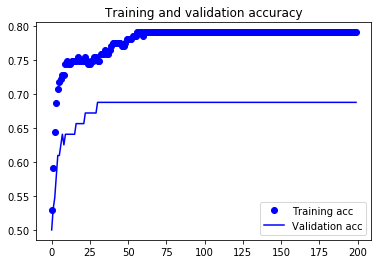

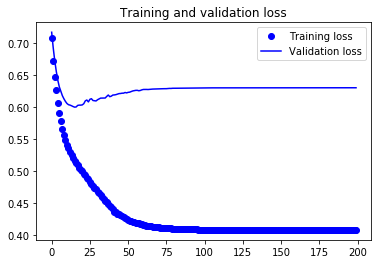

In [287]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [288]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

64/64 [==============================] - 0s 62us/step
test loss: 0.6305528879165649, test accuracy: 0.6875


In [289]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.6107634543178974


In [290]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.013867488443759624
[[42  5]
 [15  2]]


### KMeans

In [434]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0            -0.369691          -0.881824          -0.095656   
1            -0.175875          -0.403800          -0.657709   
2             0.894452          -0.189794           1.959063   
3             0.060782          -0.392075           0.826233   
4            -1.116536          -0.923742          -1.238971   
5            -1.082752          -0.067472          -1.142511   
6            -1.202528          -0.776453          -1.135820   
7            -1.206944           0.500703          -0.243295   
8            -0.982006           0.421831           0.984997   
9             1.703175           1.029234           1.508859   
10            1.528139           0.898498           0.923889   
11            0.334361          -0.301383          -0.450307   
12            0.597458           0.773201           0.182265   
13           -0.493625           1.341798          -0.632970   
14            0.962230           0.028408           0.059003   
15           -0.843247           0.160055           1.959063   
16           -0.256403           1.322075           1.520118   
17           -0.456352           2.142046           1.959063   
18           -0.637040          -1.030219          -1.165495   
19           -1.204564          -1.022455          -0.683305   
20           -1.077420          -0.314272           1.036699   
21           -0.494728          -1.023105          -0.383945   
22           -0.525116           0.187277           1.220635   
23           -0.282675           0.571926          -0.333097   
24            1.898264           1.240876           0.302806   
25            0.449834          -0.315494          -0.187659   
26           -0.745212          -0.457525          -0.261214   
27           -1.146960           2.737908           0.205319   
28           -0.006670           2.177984          -0.364684   
29           -1.198149           1.245381           1.824748   
..                 ...                ...                ...   
225          -0.850302          -0.813520          -1.238258   
226           1.113887          -0.637363          -0.178882   
227          -0.939216          -1.028651          -1.083821   
228           0.323318          -0.538560           1.959063   
229           0.651351           0.768776           1.651644   
230           1.208263           0.590562          -0.856200   
231           1.629732          -0.424079          -0.793853   
232           1.097162           0.374225          -0.897801   
233           1.452404          -0.818664           1.001952   
234           0.687938           0.363684          -0.077785   
235          -0.511818          -1.019067           1.937312   
236          -0.649452           1.110585           0.023607   
237          -0.675917           0.864345           1.959063   
238          -0.820946           0.480728          -0.348445   
239           0.335654          -0.570366           0.440736   
240           0.772849          -0.288034           0.998235   
241          -0.725775          -0.253169          -1.058923   
242          -0.883133           0.370675          -1.102573   
243          -0.504299          -0.158035          -0.129250   
244          -0.829496           0.743464           1.959063   
245          -1.203285           0.455171           0.496797   
246          -1.122600          -0.442839           1.824660   
247          -1.206944          -0.795159          -1.159900   
248          -0.501382          -1.030219          -0.612979   
249          -0.704093          -0.985145           1.199508   
250           0.831957          -0.173367           1.636565   
251          -0.895156          -1.022380          -0.410545   
252          -0.546320          -0.631883          -0.800789   
253          -0.591349          -0.947758          -0.915262   
254          -0.072947          -0.912155           0.150662   

     chromagramfiles_4  chromagramfi

In [435]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[3060.0,
 2594.1549165385713,
 2309.549481414484,
 2089.610498278143,
 1959.0566777030967,
 1842.9588281368096,
 1736.092921360928,
 1663.5689730025233,
 1609.4951000525748,
 1557.5767570007226,
 1514.8225721032359,
 1447.3960995377222,
 1422.027087832329,
 1389.3032827223215]

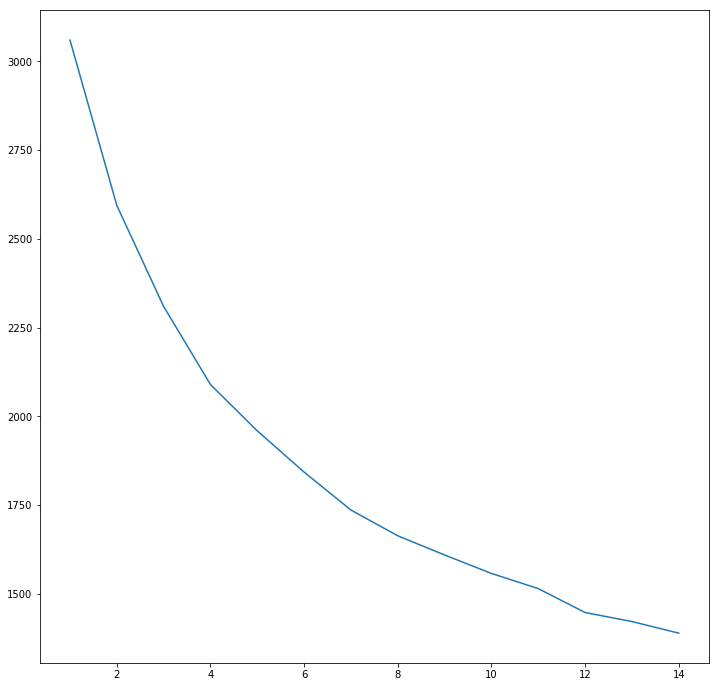

In [436]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [437]:
kmeans_ch = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_ch.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [438]:
kmeans_ch.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [439]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [440]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [441]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0            -0.369691          -0.881824          -0.095656   
1            -0.175875          -0.403800          -0.657709   
2             0.894452          -0.189794           1.959063   
3             0.060782          -0.392075           0.826233   
4            -1.116536          -0.923742          -1.238971   
5            -1.082752          -0.067472          -1.142511   
6            -1.202528          -0.776453          -1.135820   
7            -1.206944           0.500703          -0.243295   
8            -0.982006           0.421831           0.984997   
9             1.703175           1.029234           1.508859   
10            1.528139           0.898498           0.923889   
11            0.334361          -0.301383          -0.450307   
12            0.597458           0.773201           0.182265   
13           -0.493625           1.341798          -0.632970   
14            0.962230           0.028408           0.059003   
15           -0.843247           0.160055           1.959063   
16           -0.256403           1.322075           1.520118   
17           -0.456352           2.142046           1.959063   
18           -0.637040          -1.030219          -1.165495   
19           -1.204564          -1.022455          -0.683305   
20           -1.077420          -0.314272           1.036699   
21           -0.494728          -1.023105          -0.383945   
22           -0.525116           0.187277           1.220635   
23           -0.282675           0.571926          -0.333097   
24            1.898264           1.240876           0.302806   
25            0.449834          -0.315494          -0.187659   
26           -0.745212          -0.457525          -0.261214   
27           -1.146960           2.737908           0.205319   
28           -0.006670           2.177984          -0.364684   
29           -1.198149           1.245381           1.824748   
..                 ...                ...                ...   
225          -0.850302          -0.813520          -1.238258   
226           1.113887          -0.637363          -0.178882   
227          -0.939216          -1.028651          -1.083821   
228           0.323318          -0.538560           1.959063   
229           0.651351           0.768776           1.651644   
230           1.208263           0.590562          -0.856200   
231           1.629732          -0.424079          -0.793853   
232           1.097162           0.374225          -0.897801   
233           1.452404          -0.818664           1.001952   
234           0.687938           0.363684          -0.077785   
235          -0.511818          -1.019067           1.937312   
236          -0.649452           1.110585           0.023607   
237          -0.675917           0.864345           1.959063   
238          -0.820946           0.480728          -0.348445   
239           0.335654          -0.570366           0.440736   
240           0.772849          -0.288034           0.998235   
241          -0.725775          -0.253169          -1.058923   
242          -0.883133           0.370675          -1.102573   
243          -0.504299          -0.158035          -0.129250   
244          -0.829496           0.743464           1.959063   
245          -1.203285           0.455171           0.496797   
246          -1.122600          -0.442839           1.824660   
247          -1.206944          -0.795159          -1.159900   
248          -0.501382          -1.030219          -0.612979   
249          -0.704093          -0.985145           1.199508   
250           0.831957          -0.173367           1.636565   
251          -0.895156          -1.022380          -0.410545   
252          -0.546320          -0.631883          -0.800789   
253          -0.591349          -0.947758          -0.915262   
254          -0.072947          -0.912155           0.150662   

     chromagramfiles_4  chromagramfi

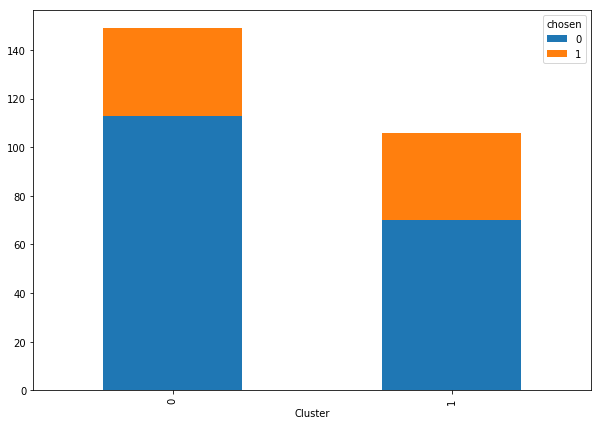

In [442]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [443]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[2]))

## Gramma

### ANN

In [291]:
X = df_n_ps_std_ch[2]

In [292]:
y = df_n_ps[2]['chosen']

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [294]:
X_train.shape

(162, 12)

In [295]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [296]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [297]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [451]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.006, 'max_iter': 20}, que permiten obtener un Accuracy de 75.31% y un Kappa del 13.17
Tiempo total: 26.15 minutos


In [298]:
grid.best_params_={'activation': 'relu', 'hidden_layer_sizes': (30, 30), 'learning_rate_init': 0.006, 'max_iter': 20}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [299]:
input_tensor = Input(shape = (n0,))

In [300]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [301]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [302]:
model.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 12)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_50 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 31        
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


In [303]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 162 samples, validate on 54 samples
Epoch 1/20
162/162 [==============================] - 0s 3ms/step - loss: 0.6482 - accuracy: 0.6049 - val_loss: 0.6607 - val_accuracy: 0.6667
Epoch 2/20
162/162 [==============================] - 0s 117us/step - loss: 0.5950 - accuracy: 0.7222 - val_loss: 0.6863 - val_accuracy: 0.6667
Epoch 3/20
162/162 [==============================] - 0s 123us/step - loss: 0.5654 - accuracy: 0.7222 - val_loss: 0.6563 - val_accuracy: 0.6667
Epoch 4/20
162/162 [==============================] - 0s 117us/step - loss: 0.5451 - accuracy: 0.7222 - val_loss: 0.6296 - val_accuracy: 0.6667
Epoch 5/20
162/162 [==============================] - 0s 117us/step - loss: 0.5314 - accuracy: 0.7222 - val_loss: 0.6051 - val_accuracy: 0.6667
Epoch 6/20
162/162 [==============================] - 0s 130us/step - loss: 0.5334 - accuracy: 0.7346 - val_loss: 0.6051 - val_accuracy: 0.6852
Epoch 7/20
162/162 [==============================] - 0s 136us/step - loss: 0.5214 - accuracy

range(0, 20)


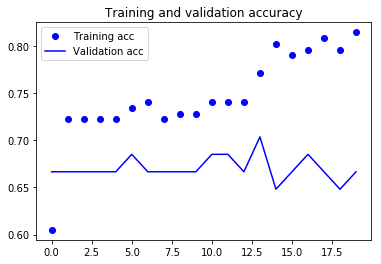

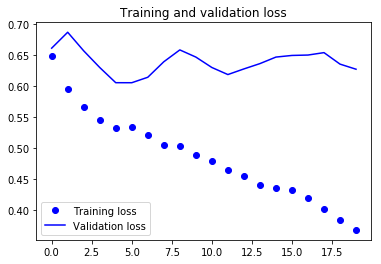

In [304]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [305]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

54/54 [==============================] - 0s 111us/step
test loss: 0.6267764259267736, test accuracy: 0.6666666865348816


In [306]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.7052469135802469


In [307]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.12903225806451613
[[32  4]
 [14  4]]


### KMeans

In [462]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0             2.134448          -0.644769          -0.741425   
1            -0.027862           1.690489           0.055411   
2            -0.377201           2.125071          -0.304151   
3            -0.590231           0.143657          -0.601072   
4            -0.233782           0.378000           1.366350   
5            -1.227009           0.847541           0.442158   
6            -0.412709           0.592753           0.609235   
7            -0.724090           0.958854           0.128425   
8             2.134447          -0.911970           1.617930   
9             2.134447          -0.392687           1.219691   
10            2.134447          -1.196966          -0.393629   
11            1.555294          -0.387633           1.984770   
12           -0.104131          -1.361797          -0.426957   
13           -0.010446          -0.441706           0.232007   
14            0.338185           2.125071          -1.191115   
15            0.639533           0.029127          -0.874094   
16            1.192505           1.901961          -0.906081   
17            1.282493          -1.425745           1.152539   
18           -0.285085          -0.286095           0.719085   
19            2.134447          -1.173436          -0.252515   
20           -0.278722           0.441120           0.539755   
21           -0.611002          -0.704814          -0.748805   
22            0.042172           0.682883           1.435959   
23            2.134448           0.023362           1.143286   
24            0.973235          -0.202714           0.576270   
25            2.134447          -0.628020           0.565132   
26           -0.475449          -0.272759          -0.483306   
27           -1.274193          -1.259433          -0.866787   
28           -0.649286           2.125072          -0.798596   
29            0.526348           0.918778          -1.174363   
..                 ...                ...                ...   
186          -1.319423           0.175014          -1.200954   
187          -0.108219           2.125071          -0.213805   
188           0.564307          -0.555458          -0.658358   
189           0.641104          -0.440581          -0.583337   
190           0.573210          -0.763939          -0.684625   
191           0.308827          -0.760763           0.972410   
192           2.058242          -1.400292           0.536272   
193           1.113210          -0.303602           1.445305   
194          -0.450762          -0.010607           2.004804   
195          -0.185698           0.215292           1.601736   
196          -0.759927          -0.321732           1.394992   
197           2.134447          -0.466820           0.555283   
198           1.112509          -0.193649           0.414393   
199           0.905453          -0.524964           1.086044   
200          -0.899647           0.791525          -0.677180   
201          -0.733318           2.125071          -0.643560   
202          -1.324292           0.274775          -1.200954   
203          -0.765770          -0.634466          -0.695396   
204          -1.298649          -0.865495          -1.182382   
205          -0.432584           0.228569           0.159869   
206          -0.098153           1.506263           0.399753   
207          -0.684201           1.261357           0.827726   
208           0.057892           1.228574           0.545400   
209           1.529114          -1.141477          -0.952529   
210           0.792164          -1.425745          -1.171065   
211           1.033808          -1.411737          -0.414286   
212           0.856046          -0.404521          -0.808726   
213           1.074157          -0.156701          -0.547902   
214          -0.466039           1.901913          -0.716582   
215          -1.281934          -1.409413           1.316491   

     chromagramfiles_4  chromagramfi

In [463]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[2592.0,
 2036.504626486333,
 1690.4433364167144,
 1572.8425668108105,
 1474.2750884480324,
 1381.4716826450067,
 1300.6860863710224,
 1239.060407813203,
 1202.9625977479168,
 1129.4403597805695,
 1086.8575546528705,
 1056.8830460036334,
 1009.1121548696354,
 981.6337584386087]

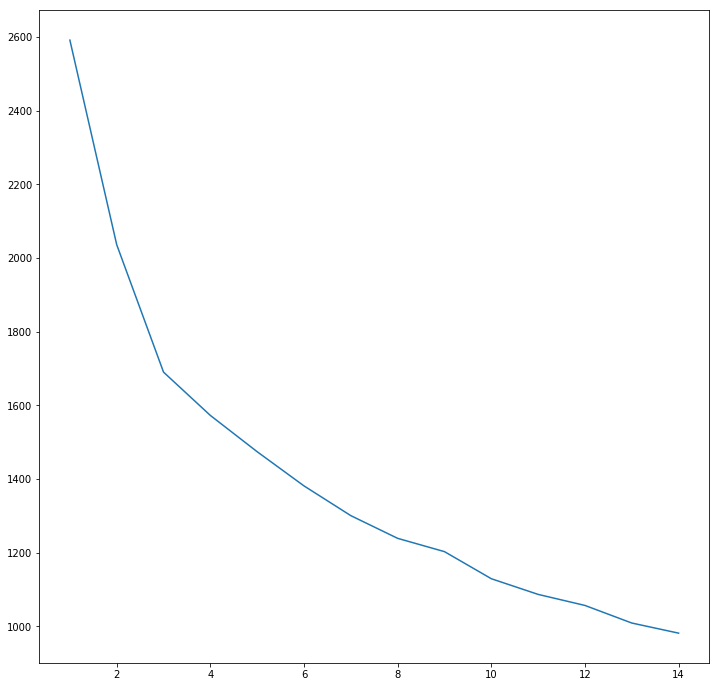

In [464]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [465]:
kmeans_ch = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_ch.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [466]:
kmeans_ch.labels_

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [467]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [468]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [469]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0             2.134448          -0.644769          -0.741425   
1            -0.027862           1.690489           0.055411   
2            -0.377201           2.125071          -0.304151   
3            -0.590231           0.143657          -0.601072   
4            -0.233782           0.378000           1.366350   
5            -1.227009           0.847541           0.442158   
6            -0.412709           0.592753           0.609235   
7            -0.724090           0.958854           0.128425   
8             2.134447          -0.911970           1.617930   
9             2.134447          -0.392687           1.219691   
10            2.134447          -1.196966          -0.393629   
11            1.555294          -0.387633           1.984770   
12           -0.104131          -1.361797          -0.426957   
13           -0.010446          -0.441706           0.232007   
14            0.338185           2.125071          -1.191115   
15            0.639533           0.029127          -0.874094   
16            1.192505           1.901961          -0.906081   
17            1.282493          -1.425745           1.152539   
18           -0.285085          -0.286095           0.719085   
19            2.134447          -1.173436          -0.252515   
20           -0.278722           0.441120           0.539755   
21           -0.611002          -0.704814          -0.748805   
22            0.042172           0.682883           1.435959   
23            2.134448           0.023362           1.143286   
24            0.973235          -0.202714           0.576270   
25            2.134447          -0.628020           0.565132   
26           -0.475449          -0.272759          -0.483306   
27           -1.274193          -1.259433          -0.866787   
28           -0.649286           2.125072          -0.798596   
29            0.526348           0.918778          -1.174363   
..                 ...                ...                ...   
186          -1.319423           0.175014          -1.200954   
187          -0.108219           2.125071          -0.213805   
188           0.564307          -0.555458          -0.658358   
189           0.641104          -0.440581          -0.583337   
190           0.573210          -0.763939          -0.684625   
191           0.308827          -0.760763           0.972410   
192           2.058242          -1.400292           0.536272   
193           1.113210          -0.303602           1.445305   
194          -0.450762          -0.010607           2.004804   
195          -0.185698           0.215292           1.601736   
196          -0.759927          -0.321732           1.394992   
197           2.134447          -0.466820           0.555283   
198           1.112509          -0.193649           0.414393   
199           0.905453          -0.524964           1.086044   
200          -0.899647           0.791525          -0.677180   
201          -0.733318           2.125071          -0.643560   
202          -1.324292           0.274775          -1.200954   
203          -0.765770          -0.634466          -0.695396   
204          -1.298649          -0.865495          -1.182382   
205          -0.432584           0.228569           0.159869   
206          -0.098153           1.506263           0.399753   
207          -0.684201           1.261357           0.827726   
208           0.057892           1.228574           0.545400   
209           1.529114          -1.141477          -0.952529   
210           0.792164          -1.425745          -1.171065   
211           1.033808          -1.411737          -0.414286   
212           0.856046          -0.404521          -0.808726   
213           1.074157          -0.156701          -0.547902   
214          -0.466039           1.901913          -0.716582   
215          -1.281934          -1.409413           1.316491   

     chromagramfiles_4  chromagramfi

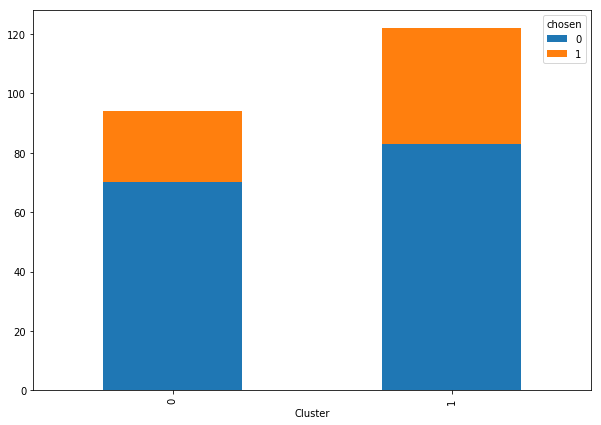

In [470]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [471]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[3]))

## Hotel Marrakech

### ANN

In [308]:
X = df_n_ps_std_ch[3]

In [309]:
y = df_n_ps[3]['chosen']

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [311]:
X_train.shape

(108, 12)

In [312]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [313]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [314]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [479]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'tanh', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'max_iter': 1000}, que permiten obtener un Accuracy de 74.07% y un Kappa del 46.20
Tiempo total: 21.22 minutos


In [315]:
grid.best_params_={'activation': 'tanh', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'max_iter': 1000}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [316]:
input_tensor = Input(shape = (n0,))

In [317]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [318]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [319]:
model.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 12)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 30)                390       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 31        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


In [320]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 108 samples, validate on 36 samples
Epoch 1/1000
108/108 [==============================] - 0s 1ms/step - loss: 0.8036 - accuracy: 0.5278 - val_loss: 0.8239 - val_accuracy: 0.5000
Epoch 2/1000
108/108 [==============================] - 0s 93us/step - loss: 0.7836 - accuracy: 0.5370 - val_loss: 0.8023 - val_accuracy: 0.5000
Epoch 3/1000
108/108 [==============================] - 0s 83us/step - loss: 0.7693 - accuracy: 0.5556 - val_loss: 0.7850 - val_accuracy: 0.5278
Epoch 4/1000
108/108 [==============================] - 0s 93us/step - loss: 0.7543 - accuracy: 0.5648 - val_loss: 0.7700 - val_accuracy: 0.5556
Epoch 5/1000
108/108 [==============================] - 0s 102us/step - loss: 0.7421 - accuracy: 0.5926 - val_loss: 0.7555 - val_accuracy: 0.5278
Epoch 6/1000
108/108 [==============================] - 0s 93us/step - loss: 0.7308 - accuracy: 0.6019 - val_loss: 0.7443 - val_accuracy: 0.5556
Epoch 7/1000
108/108 [==============================] - 0s 83us/step - loss: 0.7202 -

Epoch 55/1000
108/108 [==============================] - 0s 83us/step - loss: 0.6254 - accuracy: 0.6111 - val_loss: 0.6512 - val_accuracy: 0.6389
Epoch 56/1000
108/108 [==============================] - 0s 74us/step - loss: 0.6253 - accuracy: 0.6111 - val_loss: 0.6510 - val_accuracy: 0.6389
Epoch 57/1000
108/108 [==============================] - 0s 93us/step - loss: 0.6251 - accuracy: 0.6111 - val_loss: 0.6507 - val_accuracy: 0.6389
Epoch 58/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6250 - accuracy: 0.6111 - val_loss: 0.6505 - val_accuracy: 0.6389
Epoch 59/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6248 - accuracy: 0.6111 - val_loss: 0.6504 - val_accuracy: 0.6389
Epoch 60/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6247 - accuracy: 0.6111 - val_loss: 0.6502 - val_accuracy: 0.6389
Epoch 61/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6246 - accuracy: 0.6111 - val_loss: 0.65

Epoch 108/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6228 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 109/1000
108/108 [==============================] - ETA: 0s - loss: 0.6117 - accuracy: 0.65 - 0s 102us/step - loss: 0.6228 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 110/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6228 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 111/1000
108/108 [==============================] - 0s 102us/step - loss: 0.6228 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 112/1000
108/108 [==============================] - 0s 111us/step - loss: 0.6228 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 113/1000
108/108 [==============================] - 0s 111us/step - loss: 0.6228 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389

Epoch 00113: ReduceLROnPlateau reducing learning rate to 1.9531250927

108/108 [==============================] - 0s 102us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 213/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389

Epoch 00213: ReduceLROnPlateau reducing learning rate to 1.907348723406699e-09.
Epoch 214/1000
108/108 [==============================] - 0s 102us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 215/1000
108/108 [==============================] - 0s 102us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 216/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 217/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 218/1000
108/108 [======================

Epoch 317/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 318/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 319/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 320/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 321/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 322/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 323/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_

Epoch 422/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 423/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389

Epoch 00423: ReduceLROnPlateau reducing learning rate to 9.094947449716085e-16.
Epoch 424/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 425/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 426/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 427/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 428/1000
108/108 [=======

108/108 [==============================] - 0s 148us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 475/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 476/1000
108/108 [==============================] - 0s 111us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 477/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 478/1000
108/108 [==============================] - 0s 111us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 479/1000
108/108 [==============================] - 0s 102us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 480/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - 

Epoch 527/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 528/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 529/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 530/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 531/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 532/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 533/1000
108/108 [==============================] - 0s 111us/step - loss: 0.6227 - accuracy: 0.6204 - val_

108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 632/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 633/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389

Epoch 00633: ReduceLROnPlateau reducing learning rate to 4.336808895929377e-22.
Epoch 634/1000
108/108 [==============================] - 0s 167us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 635/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 636/1000
108/108 [==============================] - 0s 157us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 637/1000
108/108 [======================

108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 736/1000
108/108 [==============================] - 0s 148us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 737/1000
108/108 [==============================] - 0s 167us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 738/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 739/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 740/1000
108/108 [==============================] - 0s 185us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 741/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - 

108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 840/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 841/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 842/1000
108/108 [==============================] - 0s 148us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 843/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389

Epoch 00843: ReduceLROnPlateau reducing learning rate to 2.0679516296049964e-28.
Epoch 844/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 845/1000
108/108 [=====================

Epoch 892/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 893/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389

Epoch 00893: ReduceLROnPlateau reducing learning rate to 6.462348842515614e-30.
Epoch 894/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 895/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 896/1000
108/108 [==============================] - 0s 120us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 897/1000
108/108 [==============================] - 0s 111us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 898/1000
108/108 [=======

108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 945/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 946/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 947/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 948/1000
108/108 [==============================] - 0s 139us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 949/1000
108/108 [==============================] - 0s 130us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - val_accuracy: 0.6389
Epoch 950/1000
108/108 [==============================] - 0s 148us/step - loss: 0.6227 - accuracy: 0.6204 - val_loss: 0.6486 - 

range(0, 1000)


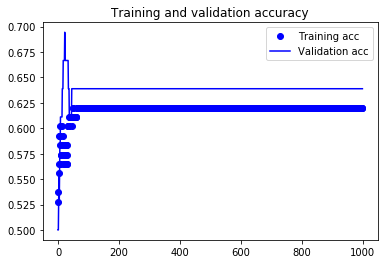

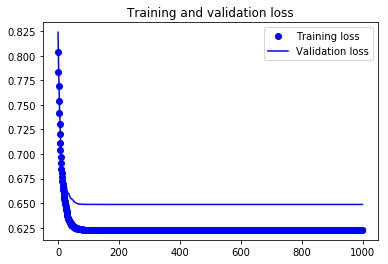

In [321]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [322]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

36/36 [==============================] - 0s 111us/step
test loss: 0.648619532585144, test accuracy: 0.6388888955116272


In [323]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.684375


In [324]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.22516556291390732
[[18  2]
 [11  5]]


### KMeans

In [490]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0            -0.580880          -0.990276           0.508438   
1            -0.886270           1.680400           1.708314   
2            -0.133384           0.811454          -1.227033   
3            -0.551071           0.259668          -1.073758   
4            -1.234016          -0.118636          -1.227033   
5             1.505233           0.156720           1.279534   
6             1.505233          -0.276775           0.478146   
7            -1.098308           2.406593           0.908371   
8             1.505233           0.396108          -0.186683   
9            -0.545948           0.718771          -0.767661   
10           -0.759467           1.402120           1.708315   
11           -0.626015           2.019019           0.765623   
12           -0.707480           0.753456           1.102092   
13            0.053762           1.374763          -0.064790   
14           -1.007854           1.946086           0.162150   
15           -1.148500          -1.038639           1.466504   
16            0.580515           0.408966           0.759067   
17            0.828864          -0.024616           1.708315   
18           -1.323765          -1.071100          -1.227033   
19            1.258380          -0.980344          -1.169455   
20            0.584754           2.257694           1.617268   
21            0.872730           2.337993           1.708314   
22            1.505233          -0.325266           0.239552   
23           -1.341382           1.475366           1.708314   
24            1.505233          -0.058685           1.279528   
25            1.505233          -0.199351           1.568596   
26            1.084848          -0.023978           1.708314   
27            0.552717           0.139915           0.547890   
28           -0.960017          -0.983960          -1.209972   
29           -0.424404           1.136447          -0.827502   
..                 ...                ...                ...   
114           0.974362          -0.400418           0.642886   
115           0.284279           1.069626           0.177590   
116           0.401154          -0.702442          -1.068462   
117          -0.392111          -0.441150          -0.850725   
118          -1.167027          -0.128653          -0.576682   
119          -1.453231          -1.071100          -1.212986   
120          -1.054909          -1.071100           0.809406   
121          -1.120738          -1.071100          -0.866114   
122          -0.737469          -0.066958           1.708314   
123           0.442153          -0.009588           1.301573   
124           0.565085          -0.109187           1.708314   
125           1.007454           1.212228           1.708315   
126           1.289118           0.354850           0.489878   
127           0.028566          -0.686803          -0.979367   
128           0.678311          -0.817132           1.446362   
129          -0.163049          -0.571203           1.708314   
130          -0.679135          -1.071100           1.708314   
131          -0.204732          -1.050977           0.143360   
132          -0.966699          -1.071100           1.467246   
133           0.013654           2.406593          -0.420557   
134           0.770196           2.406593          -0.756682   
135           0.316774           1.171862           0.453349   
136           0.384484           0.519829          -0.388746   
137          -1.084993           0.429049          -0.688647   
138           0.980726           1.839717           1.338253   
139          -1.071701          -1.071012          -0.961961   
140          -0.415164          -1.071100          -1.221501   
141          -1.200546          -1.040557           0.160549   
142           1.505233           0.201458           0.615256   
143          -0.236120          -0.146675          -0.110274   

     chromagramfiles_4  chromagramfi

In [491]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[1728.0,
 1478.2106072382894,
 1332.479257330826,
 1218.449951308628,
 1138.0957918080462,
 1068.887842720851,
 1011.6664613063779,
 964.4282803174967,
 921.5196331917493,
 895.2545968491829,
 849.4045014782471,
 823.1536172247521,
 793.2889327408209,
 759.9213103718073]

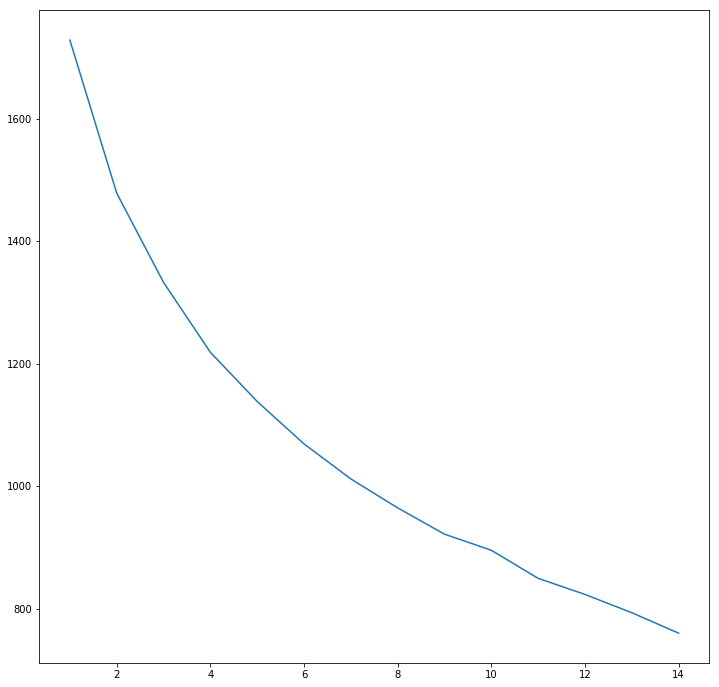

In [492]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [493]:
kmeans_ch = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_ch.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [494]:
kmeans_ch.labels_

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [495]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0])

In [496]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [497]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0            -0.580880          -0.990276           0.508438   
1            -0.886270           1.680400           1.708314   
2            -0.133384           0.811454          -1.227033   
3            -0.551071           0.259668          -1.073758   
4            -1.234016          -0.118636          -1.227033   
5             1.505233           0.156720           1.279534   
6             1.505233          -0.276775           0.478146   
7            -1.098308           2.406593           0.908371   
8             1.505233           0.396108          -0.186683   
9            -0.545948           0.718771          -0.767661   
10           -0.759467           1.402120           1.708315   
11           -0.626015           2.019019           0.765623   
12           -0.707480           0.753456           1.102092   
13            0.053762           1.374763          -0.064790   
14           -1.007854           1.946086           0.162150   
15           -1.148500          -1.038639           1.466504   
16            0.580515           0.408966           0.759067   
17            0.828864          -0.024616           1.708315   
18           -1.323765          -1.071100          -1.227033   
19            1.258380          -0.980344          -1.169455   
20            0.584754           2.257694           1.617268   
21            0.872730           2.337993           1.708314   
22            1.505233          -0.325266           0.239552   
23           -1.341382           1.475366           1.708314   
24            1.505233          -0.058685           1.279528   
25            1.505233          -0.199351           1.568596   
26            1.084848          -0.023978           1.708314   
27            0.552717           0.139915           0.547890   
28           -0.960017          -0.983960          -1.209972   
29           -0.424404           1.136447          -0.827502   
..                 ...                ...                ...   
114           0.974362          -0.400418           0.642886   
115           0.284279           1.069626           0.177590   
116           0.401154          -0.702442          -1.068462   
117          -0.392111          -0.441150          -0.850725   
118          -1.167027          -0.128653          -0.576682   
119          -1.453231          -1.071100          -1.212986   
120          -1.054909          -1.071100           0.809406   
121          -1.120738          -1.071100          -0.866114   
122          -0.737469          -0.066958           1.708314   
123           0.442153          -0.009588           1.301573   
124           0.565085          -0.109187           1.708314   
125           1.007454           1.212228           1.708315   
126           1.289118           0.354850           0.489878   
127           0.028566          -0.686803          -0.979367   
128           0.678311          -0.817132           1.446362   
129          -0.163049          -0.571203           1.708314   
130          -0.679135          -1.071100           1.708314   
131          -0.204732          -1.050977           0.143360   
132          -0.966699          -1.071100           1.467246   
133           0.013654           2.406593          -0.420557   
134           0.770196           2.406593          -0.756682   
135           0.316774           1.171862           0.453349   
136           0.384484           0.519829          -0.388746   
137          -1.084993           0.429049          -0.688647   
138           0.980726           1.839717           1.338253   
139          -1.071701          -1.071012          -0.961961   
140          -0.415164          -1.071100          -1.221501   
141          -1.200546          -1.040557           0.160549   
142           1.505233           0.201458           0.615256   
143          -0.236120          -0.146675          -0.110274   

     chromagramfiles_4  chromagramfi

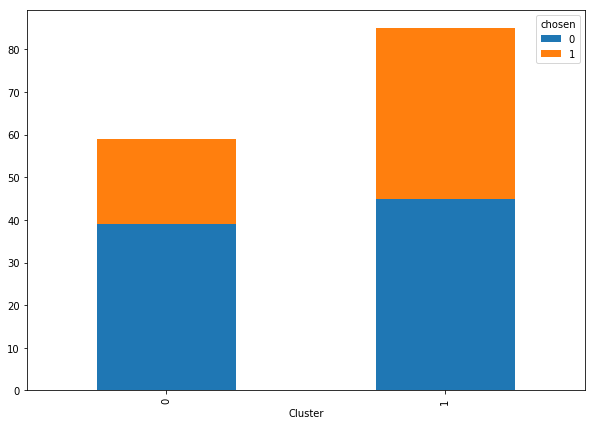

In [498]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [499]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[4]))

## Specialized

### ANN

In [25]:
X = df_n_ps_std_ch[4]

In [26]:
y = df_n_ps[4]['chosen']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
X_train.shape

(164, 12)

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [30]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [31]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [507]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'logistic', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.004, 'max_iter': 2000}, que permiten obtener un Accuracy de 73.78% y un Kappa del 46.44
Tiempo total: 24.78 minutos


In [32]:
grid.best_params_={'activation': 'sigmoid', 'hidden_layer_sizes': (20,), 'learning_rate_init': 0.004, 'max_iter': 2000}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [33]:
input_tensor = Input(shape = (n0,))

In [34]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [35]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [36]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 164 samples, validate on 55 samples
Epoch 1/2000
164/164 [==============================] - 1s 4ms/step - loss: 0.7436 - accuracy: 0.4146 - val_loss: 0.6989 - val_accuracy: 0.4545
Epoch 2/2000
164/164 [==============================] - 0s 98us/step - loss: 0.7193 - accuracy: 0.4573 - val_loss: 0.6965 - val_accuracy: 0.5091
Epoch 3/2000
164/164 [==============================] - 0s 98us/step - loss: 0.7058 - accuracy: 0.4573 - val_loss: 0.6952 - val_accuracy: 0.4909
Epoch 4/2000
164/164 [==============================] - 0s 122us/step - loss: 0.6958 - accuracy: 0.5244 - val_loss: 0.6950 - val_accuracy: 0.4727
Epoch 5/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6861 - accuracy: 0.5427 - val_loss: 0.6954 - val_accuracy: 0.5273
Epoch 6/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6797 - accuracy: 0.5732 - val_loss: 0.6963 - val_accuracy: 0.5091
Epoch 7/2000
164/164 [==============================] - 0s 104us/step - loss: 0.673

Epoch 55/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6211 - accuracy: 0.6585 - val_loss: 0.7340 - val_accuracy: 0.5455
Epoch 56/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6210 - accuracy: 0.6524 - val_loss: 0.7341 - val_accuracy: 0.5455

Epoch 00056: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 57/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6209 - accuracy: 0.6524 - val_loss: 0.7342 - val_accuracy: 0.5455
Epoch 58/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6209 - accuracy: 0.6524 - val_loss: 0.7342 - val_accuracy: 0.5455
Epoch 59/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6208 - accuracy: 0.6585 - val_loss: 0.7343 - val_accuracy: 0.5273
Epoch 60/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6207 - accuracy: 0.6646 - val_loss: 0.7342 - val_accuracy: 0.5273
Epoch 61/2000
164/164 [=================

Epoch 160/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 161/2000
164/164 [==============================] - 0s 134us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 162/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 163/2000
164/164 [==============================] - 0s 134us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 164/2000
164/164 [==============================] - 0s 122us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 165/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 166/2000
164/164 [==============================] - ETA: 0s - loss: 0.6557 - accuracy: 0.62 - 0s 104us/ste

Epoch 265/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 266/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 00266: ReduceLROnPlateau reducing learning rate to 1.1920929521291868e-10.
Epoch 267/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 268/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 269/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 270/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 271/2000
164/164 [======

164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 318/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 319/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 320/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 321/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 322/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 323/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_a

Epoch 370/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 371/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 372/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 373/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 374/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 375/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 376/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_

Epoch 423/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 424/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 425/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 426/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 00426: ReduceLROnPlateau reducing learning rate to 1.818989489943217e-15.
Epoch 427/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 428/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 429/2000
164/164 [=============

Epoch 476/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 00476: ReduceLROnPlateau reducing learning rate to 5.684342156072553e-17.
Epoch 477/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 478/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 479/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 480/2000
164/164 [==============================] - ETA: 0s - loss: 0.5786 - accuracy: 0.71 - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 481/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 

Epoch 528/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 529/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 530/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 531/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 532/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 533/2000
164/164 [==============================] - 0s 128us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 534/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_l

Epoch 581/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 582/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 583/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 584/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 585/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 586/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 00586: ReduceLROnPlateau reducing learning rate to 2.7755576933948015e-20.
Epoch 587/2000
164/164 [===========

Epoch 634/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 635/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 636/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 00636: ReduceLROnPlateau reducing learning rate to 8.673617791858755e-22.
Epoch 637/2000
164/164 [==============================] - 0s 92us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 638/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 639/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 640/2000
164/164 [============


Epoch 00686: ReduceLROnPlateau reducing learning rate to 2.710505559955861e-23.
Epoch 687/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 688/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 689/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 690/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 691/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 692/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 693/2000
164/164 [============

164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 740/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 741/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 742/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 743/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 744/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 745/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_ac

Epoch 792/2000
164/164 [==============================] - 0s 97us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 793/2000
164/164 [==============================] - 0s 122us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 794/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 795/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 796/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 00796: ReduceLROnPlateau reducing learning rate to 1.3234890429471977e-26.
Epoch 797/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 798/2000
164/164 [========

Epoch 845/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 846/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 00846: ReduceLROnPlateau reducing learning rate to 4.135903259209993e-28.
Epoch 847/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 848/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 849/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 850/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 851/2000
164/164 [=========

164/164 [==============================] - 0s 128us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 898/2000
164/164 [==============================] - 0s 122us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 899/2000
164/164 [==============================] - 0s 128us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 900/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 901/2000
164/164 [==============================] - 0s 146us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 902/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 903/2000
164/164 [==============================] - 0s 128us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - 

Epoch 950/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 951/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 952/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 953/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 954/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 955/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 956/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_l

164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1055/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1056/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 01056: ReduceLROnPlateau reducing learning rate to 1.9721523567247356e-34.
Epoch 1057/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1058/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1059/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1060/2000
164/164 [====================

164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1159/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1160/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1161/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1162/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1163/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1164/2000
164/164 [==============================] - 0s 122us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7

164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1263/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1264/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1265/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1266/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 01266: ReduceLROnPlateau reducing learning rate to 9.403973864237415e-41.
Epoch 1267/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1268/2000
164/164 [==================

164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273

Epoch 01366: ReduceLROnPlateau reducing learning rate to 9.178504941327552e-44.
Epoch 1367/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1368/2000
164/164 [==============================] - 0s 97us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1369/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1370/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1371/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1372/2000
164/164 [===================

Epoch 1418/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1419/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1420/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1421/2000
164/164 [==============================] - 0s 122us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1422/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1423/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1424/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - v

Epoch 1527/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1528/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1529/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1530/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1531/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1532/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1533/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_

164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1638/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1639/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1640/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1641/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1642/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1643/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - v

164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1748/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1749/2000
164/164 [==============================] - 0s 122us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1750/2000
164/164 [==============================] - 0s 116us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1751/2000
164/164 [==============================] - ETA: 0s - loss: 0.5969 - accuracy: 0.65 - 0s 122us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1752/2000
164/164 [==============================] - 0s 104us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1753/2000
164/164 [==============================] - 0s 110us/step - loss:

Epoch 1802/2000
164/164 [==============================] - 0s 134us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1803/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1804/2000
164/164 [==============================] - 0s 110us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1805/2000
164/164 [==============================] - 0s 128us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1806/2000
164/164 [==============================] - 0s 134us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1807/2000
164/164 [==============================] - 0s 128us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1808/2000
164/164 [==============================] - 0s 146us/step - loss: 0.6195 - accuracy: 0.6524

Epoch 1857/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1858/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1859/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1860/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1861/2000
164/164 [==============================] - 0s 85us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1862/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1863/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_

Epoch 1912/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1913/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1914/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1915/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1916/2000
164/164 [==============================] - 0s 98us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1917/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_loss: 0.7339 - val_accuracy: 0.5273
Epoch 1918/2000
164/164 [==============================] - 0s 91us/step - loss: 0.6195 - accuracy: 0.6524 - val_

range(0, 2000)


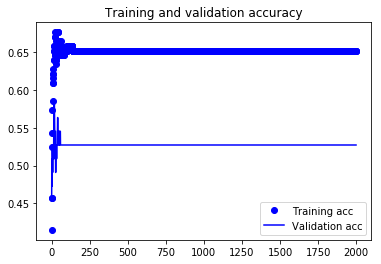

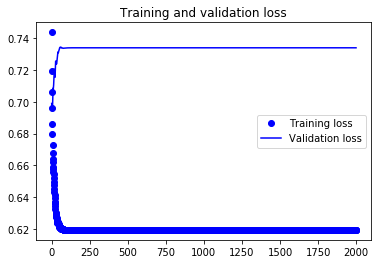

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

55/55 [==============================] - 0s 91us/step
test loss: 0.7338643464175137, test accuracy: 0.5272727012634277


In [40]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.548941798941799


In [41]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.0542328042328043
[[15 13]
 [13 14]]


### KMeans

In [518]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0             1.752761          -1.114598          -0.348132   
1            -1.387006          -0.333039           0.041297   
2            -0.628834           2.234144           0.613536   
3             0.081693           1.765530          -0.365668   
4             0.056206           1.646501           0.508800   
5            -0.475284           0.673200          -1.077774   
6             0.163433          -0.011304          -1.057752   
7             0.110500           0.178211          -1.394026   
8             0.595793          -0.898440           1.924099   
9            -0.017542          -1.386211           0.574605   
10            0.796579          -1.216664          -0.112327   
11            1.761253          -0.949116          -0.297777   
12            1.055147          -0.394702           1.258031   
13            1.761253          -0.435392           0.592085   
14           -0.137413          -0.980041          -1.297302   
15            0.017749          -0.936126          -1.136240   
16           -0.382429          -1.386211          -1.437693   
17           -1.227998           1.294887           2.200026   
18           -1.076569          -0.776099          -0.576736   
19           -1.180746           0.385053           2.200026   
20            1.192498          -0.224351          -0.206238   
21            1.213472           0.048184          -0.600330   
22           -0.004572          -0.052026           2.200026   
23           -0.229893           0.630662           0.484895   
24            0.217943          -0.177066           0.659322   
25           -0.333597           0.972324          -0.721724   
26           -0.602430          -0.028610          -0.826715   
27           -0.251812          -0.171571          -0.358821   
28           -0.368678           2.234146          -0.330756   
29           -0.578621           2.234146          -0.562376   
..                 ...                ...                ...   
189          -0.186741          -1.165084          -0.921181   
190          -0.163966           0.884601           1.657605   
191          -0.254097          -0.617571           0.535718   
192          -1.359431           0.228998           0.259367   
193           1.622617           2.234146          -1.127605   
194          -0.467818          -0.314482           0.014154   
195          -1.423661          -0.599038          -0.707969   
196           1.761253          -0.325612           0.357954   
197           1.761253           1.028574           1.374947   
198           1.761253           0.050043           0.687757   
199          -0.919189          -0.200271          -1.032880   
200          -0.988568          -0.189392          -1.028379   
201          -0.779270           0.427427          -0.948100   
202           1.116127          -1.139042           0.168460   
203           0.762440          -1.190866          -0.050517   
204           0.058411          -1.128496          -1.328850   
205          -0.720270          -0.697672          -0.720394   
206          -0.364461          -0.010160          -1.095500   
207          -0.272236          -0.196860          -0.727982   
208           1.761253          -0.082523          -0.122308   
209           1.573516          -0.161473          -0.359909   
210           1.761253           0.417875          -0.918851   
211           1.761253           0.145550           1.710575   
212           0.470346          -0.334996           2.200026   
213          -0.576457          -0.914445           1.070087   
214           1.761253          -0.591066          -0.690824   
215           1.490806          -1.368871          -1.151960   
216           0.191801          -1.348512          -1.315236   
217          -0.002098           2.039653          -0.752917   
218          -0.098688          -0.923087          -0.917548   

     chromagramfiles_4  chromagramfi

In [519]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[2628.0,
 2183.3505259693475,
 1946.7709026205612,
 1764.2381744586387,
 1667.52081260375,
 1588.695626080069,
 1521.6546082793252,
 1465.3583612489235,
 1381.9950671234758,
 1338.0035802619554,
 1275.054416118868,
 1244.4334212962274,
 1201.2393010186188,
 1166.7934845697623]

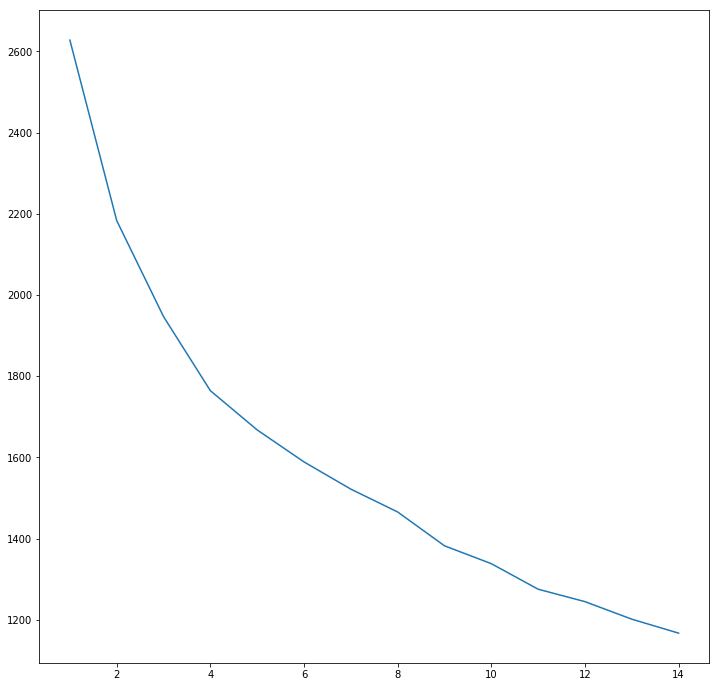

In [520]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [521]:
kmeans_ch = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_ch.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [522]:
kmeans_ch.labels_

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [523]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [524]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [525]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0             1.752761          -1.114598          -0.348132   
1            -1.387006          -0.333039           0.041297   
2            -0.628834           2.234144           0.613536   
3             0.081693           1.765530          -0.365668   
4             0.056206           1.646501           0.508800   
5            -0.475284           0.673200          -1.077774   
6             0.163433          -0.011304          -1.057752   
7             0.110500           0.178211          -1.394026   
8             0.595793          -0.898440           1.924099   
9            -0.017542          -1.386211           0.574605   
10            0.796579          -1.216664          -0.112327   
11            1.761253          -0.949116          -0.297777   
12            1.055147          -0.394702           1.258031   
13            1.761253          -0.435392           0.592085   
14           -0.137413          -0.980041          -1.297302   
15            0.017749          -0.936126          -1.136240   
16           -0.382429          -1.386211          -1.437693   
17           -1.227998           1.294887           2.200026   
18           -1.076569          -0.776099          -0.576736   
19           -1.180746           0.385053           2.200026   
20            1.192498          -0.224351          -0.206238   
21            1.213472           0.048184          -0.600330   
22           -0.004572          -0.052026           2.200026   
23           -0.229893           0.630662           0.484895   
24            0.217943          -0.177066           0.659322   
25           -0.333597           0.972324          -0.721724   
26           -0.602430          -0.028610          -0.826715   
27           -0.251812          -0.171571          -0.358821   
28           -0.368678           2.234146          -0.330756   
29           -0.578621           2.234146          -0.562376   
..                 ...                ...                ...   
189          -0.186741          -1.165084          -0.921181   
190          -0.163966           0.884601           1.657605   
191          -0.254097          -0.617571           0.535718   
192          -1.359431           0.228998           0.259367   
193           1.622617           2.234146          -1.127605   
194          -0.467818          -0.314482           0.014154   
195          -1.423661          -0.599038          -0.707969   
196           1.761253          -0.325612           0.357954   
197           1.761253           1.028574           1.374947   
198           1.761253           0.050043           0.687757   
199          -0.919189          -0.200271          -1.032880   
200          -0.988568          -0.189392          -1.028379   
201          -0.779270           0.427427          -0.948100   
202           1.116127          -1.139042           0.168460   
203           0.762440          -1.190866          -0.050517   
204           0.058411          -1.128496          -1.328850   
205          -0.720270          -0.697672          -0.720394   
206          -0.364461          -0.010160          -1.095500   
207          -0.272236          -0.196860          -0.727982   
208           1.761253          -0.082523          -0.122308   
209           1.573516          -0.161473          -0.359909   
210           1.761253           0.417875          -0.918851   
211           1.761253           0.145550           1.710575   
212           0.470346          -0.334996           2.200026   
213          -0.576457          -0.914445           1.070087   
214           1.761253          -0.591066          -0.690824   
215           1.490806          -1.368871          -1.151960   
216           0.191801          -1.348512          -1.315236   
217          -0.002098           2.039653          -0.752917   
218          -0.098688          -0.923087          -0.917548   

     chromagramfiles_4  chromagramfi

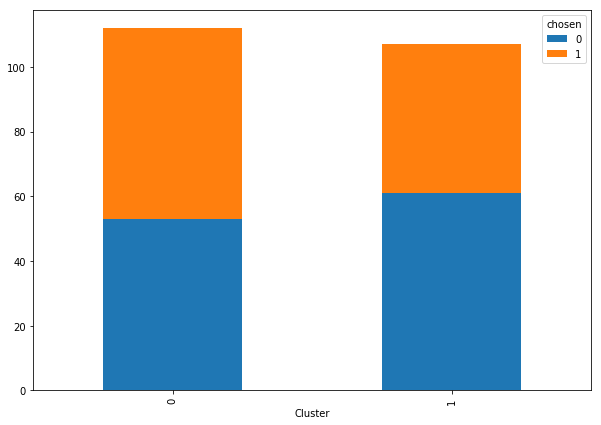

In [526]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [527]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[5]))

## Urban Place

### ANN

In [344]:
X = df_n_ps_std_ch[5]

In [345]:
y = df_n_ps[5]['chosen']

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [347]:
X_train.shape

(162, 12)

In [348]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [349]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [350]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [535]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

Los parámetros del mejor modelo fueron {'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.006, 'max_iter': 200}, que permiten obtener un Accuracy de 79.63% y un Kappa del 53.46
Tiempo total: 24.75 minutos


In [351]:
grid.best_params_={'activation': 'relu', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate_init': 0.006, 'max_iter': 200}
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [352]:
input_tensor = Input(shape = (n0,))

In [353]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [354]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [355]:
model.summary()

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 12)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_56 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_57 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 11        
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________


In [356]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

Train on 162 samples, validate on 54 samples
Epoch 1/200
162/162 [==============================] - 0s 2ms/step - loss: 0.7995 - accuracy: 0.3272 - val_loss: 0.7472 - val_accuracy: 0.3704
Epoch 2/200
162/162 [==============================] - 0s 86us/step - loss: 0.7034 - accuracy: 0.4815 - val_loss: 0.6900 - val_accuracy: 0.5741
Epoch 3/200
162/162 [==============================] - 0s 93us/step - loss: 0.6763 - accuracy: 0.6728 - val_loss: 0.6687 - val_accuracy: 0.6296
Epoch 4/200
162/162 [==============================] - 0s 86us/step - loss: 0.6577 - accuracy: 0.7099 - val_loss: 0.6443 - val_accuracy: 0.6296
Epoch 5/200
162/162 [==============================] - 0s 86us/step - loss: 0.6404 - accuracy: 0.6914 - val_loss: 0.6290 - val_accuracy: 0.6667
Epoch 6/200
162/162 [==============================] - 0s 93us/step - loss: 0.6270 - accuracy: 0.7037 - val_loss: 0.6180 - val_accuracy: 0.6667
Epoch 7/200
162/162 [==============================] - 0s 86us/step - loss: 0.6115 - accurac

Epoch 55/200
162/162 [==============================] - 0s 111us/step - loss: 0.3155 - accuracy: 0.8642 - val_loss: 0.4981 - val_accuracy: 0.7778
Epoch 56/200
162/162 [==============================] - 0s 111us/step - loss: 0.3149 - accuracy: 0.8642 - val_loss: 0.4947 - val_accuracy: 0.7963
Epoch 57/200
162/162 [==============================] - 0s 111us/step - loss: 0.3135 - accuracy: 0.8642 - val_loss: 0.4910 - val_accuracy: 0.7963

Epoch 00057: ReduceLROnPlateau reducing learning rate to 0.000375000003259629.
Epoch 58/200
162/162 [==============================] - 0s 123us/step - loss: 0.3136 - accuracy: 0.8704 - val_loss: 0.4902 - val_accuracy: 0.7963
Epoch 59/200
162/162 [==============================] - 0s 142us/step - loss: 0.3132 - accuracy: 0.8704 - val_loss: 0.4900 - val_accuracy: 0.7963
Epoch 60/200
162/162 [==============================] - 0s 123us/step - loss: 0.3127 - accuracy: 0.8704 - val_loss: 0.4898 - val_accuracy: 0.7963
Epoch 61/200
162/162 [======================


Epoch 00107: ReduceLROnPlateau reducing learning rate to 1.1718750101863407e-05.
Epoch 108/200
162/162 [==============================] - 0s 111us/step - loss: 0.3024 - accuracy: 0.8827 - val_loss: 0.4930 - val_accuracy: 0.7963
Epoch 109/200
162/162 [==============================] - 0s 111us/step - loss: 0.3024 - accuracy: 0.8827 - val_loss: 0.4930 - val_accuracy: 0.7963
Epoch 110/200
162/162 [==============================] - 0s 117us/step - loss: 0.3023 - accuracy: 0.8827 - val_loss: 0.4930 - val_accuracy: 0.7963
Epoch 111/200
162/162 [==============================] - 0s 117us/step - loss: 0.3023 - accuracy: 0.8827 - val_loss: 0.4930 - val_accuracy: 0.7963
Epoch 112/200
162/162 [==============================] - 0s 117us/step - loss: 0.3023 - accuracy: 0.8827 - val_loss: 0.4930 - val_accuracy: 0.7963
Epoch 113/200
162/162 [==============================] - 0s 130us/step - loss: 0.3023 - accuracy: 0.8827 - val_loss: 0.4931 - val_accuracy: 0.7963
Epoch 114/200
162/162 [=============

range(0, 200)


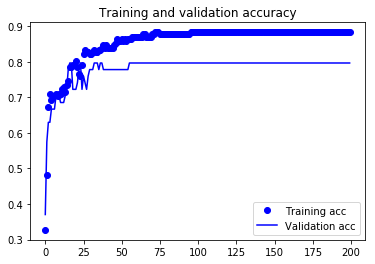

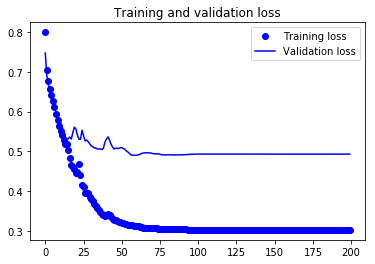

In [357]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [358]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

54/54 [==============================] - 0s 56us/step
test loss: 0.49283186263508266, test accuracy: 0.7962962985038757


In [359]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

AUC ROC:  0.8210526315789474


In [360]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Kappa:  0.547945205479452
[[30  5]
 [ 6 13]]


### KMeans

In [546]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0            -0.592360          -0.453705           2.211117   
1            -0.441523           1.666549          -0.417753   
2            -0.397413           1.044025           0.141778   
3            -1.385913          -1.136470          -1.159142   
4            -0.410804          -0.664148          -0.936463   
5             0.654434          -0.480395          -0.564938   
6            -0.375055          -1.465338           1.649386   
7             0.064972          -0.292924           1.874810   
8             0.457188          -1.280226           0.508305   
9             0.264205          -0.451954           0.540019   
10            1.615916          -0.476284           0.254007   
11            0.834285          -1.405123           0.704867   
12           -0.368007           0.683133          -0.474222   
13           -0.839289           0.306633          -0.853660   
14           -0.319898           0.340082          -0.491559   
15           -0.609565           0.412613          -0.695381   
16           -0.294394           0.741619           0.151913   
17            1.116695          -0.420423           1.149167   
18            0.842794          -0.575729           0.643169   
19           -0.030794           0.030288           0.462185   
20           -1.324459           2.249029          -1.202104   
21           -1.391553           2.249029          -1.278978   
22           -0.662886           0.307712          -0.805667   
23            1.105419          -0.629615           0.090579   
24            1.043642          -0.624779           0.129667   
25            0.301993          -0.705708          -0.070367   
26            1.404180          -1.101276          -1.004741   
27           -0.634723          -0.430657          -0.787967   
28            0.317357          -0.327927           0.301217   
29           -0.648337          -1.398422           0.413041   
..                 ...                ...                ...   
186           0.393077          -0.250074           0.038107   
187          -1.377643          -0.803877           2.211117   
188           1.615917           0.379972           0.224721   
189           1.615917          -0.530983          -0.059684   
190          -0.315846          -1.045971           1.094836   
191          -0.183414          -1.108627           0.780160   
192           1.615917          -1.079754           0.603712   
193           1.615917          -0.514731           1.852987   
194          -1.023096          -0.007046          -0.867797   
195           0.242106          -0.524011          -0.569132   
196          -1.369321          -0.969464           2.211117   
197          -1.015340          -0.530076          -0.283168   
198          -0.850883          -0.441126           0.243450   
199           1.615917          -0.957115          -0.818624   
200           1.615917          -1.094018          -1.161937   
201           1.615917          -1.168115          -1.198039   
202           0.887584          -1.008954           1.434477   
203          -0.281732          -0.334833           0.143734   
204          -0.135492          -0.180497           0.349882   
205           1.615917          -0.407161           1.545772   
206           1.404839          -0.218548           0.899766   
207           1.593455          -0.041945           1.395647   
208           1.395568           1.540836          -0.840747   
209           1.583225           1.673175          -1.151481   
210           1.370331           1.252913          -1.149111   
211           1.041007          -1.290910          -1.008073   
212           1.615915          -1.334768          -0.029491   
213          -0.744293           0.244034          -1.095374   
214           0.406336           0.410463          -0.317774   
215          -1.011813          -0.264498          -0.827835   

     chromagramfiles_4  chromagramfi

In [547]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

[2592.0,
 2098.7293789346745,
 1732.4188990905318,
 1606.2630867887576,
 1500.2148167696203,
 1423.6001104969187,
 1355.4724990652844,
 1283.649878481895,
 1213.5364716691665,
 1172.587492994494,
 1128.5861906886926,
 1087.5581685344223,
 1057.5011291947897,
 1021.2765793863816]

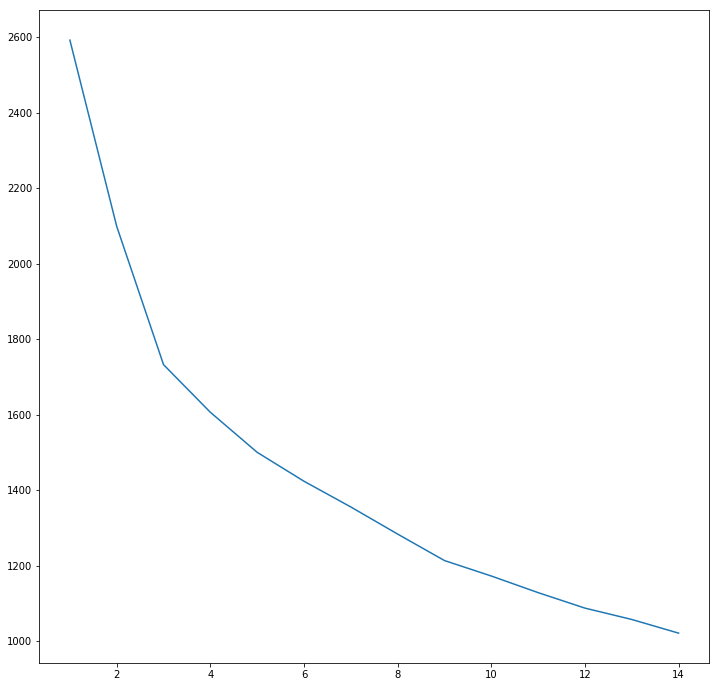

In [548]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=6

In [549]:
kmeans_ch = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans_ch.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [550]:
kmeans_ch.labels_

array([1, 3, 3, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 3, 0, 0, 5, 5, 5, 2, 4, 4,
       3, 5, 5, 5, 5, 0, 2, 2, 2, 1, 4, 1, 0, 0, 0, 5, 5, 5, 4, 4, 4, 0,
       5, 0, 1, 1, 3, 3, 4, 3, 5, 5, 0, 5, 4, 4, 3, 5, 5, 5, 0, 3, 3, 3,
       1, 1, 1, 5, 5, 5, 1, 3, 0, 3, 5, 4, 4, 4, 3, 3, 4, 3, 0, 3, 4, 4,
       2, 2, 2, 2, 2, 4, 4, 2, 3, 0, 0, 0, 4, 5, 5, 5, 4, 3, 3, 0, 5, 5,
       5, 0, 0, 4, 2, 0, 2, 2, 4, 4, 4, 2, 5, 2, 0, 0, 0, 0, 5, 3, 0, 3,
       3, 1, 1, 1, 5, 2, 3, 2, 1, 1, 1, 4, 2, 0, 2, 2, 0, 0, 2, 4, 4, 2,
       1, 1, 2, 0, 4, 0, 0, 5, 3, 0, 1, 0, 3, 3, 3, 5, 5, 5, 1, 3, 3, 2,
       5, 0, 0, 2, 0, 1, 2, 2, 2, 0, 5, 1, 5, 2, 2, 2, 2, 2, 3, 2, 1, 3,
       3, 2, 2, 2, 1, 3, 3, 2, 2, 2, 0, 0, 0, 2, 2, 3, 5, 3])

In [551]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

array([1, 3, 3, 0, 0, 0, 1, 1, 2, 2, 2, 2, 0, 3, 0, 0, 5, 5, 5, 2, 4, 4,
       3, 5, 5, 5, 5, 0, 2, 2, 2, 1, 4, 1, 0, 0, 0, 5, 5, 5, 4, 4, 4, 0,
       5, 0, 1, 1, 3, 3, 4, 3, 5, 5, 0, 5, 4, 4, 3, 5, 5, 5, 0, 3, 3, 3,
       1, 1, 1, 5, 5, 5, 1, 3, 0, 3, 5, 4, 4, 4, 3, 3, 4, 3, 0, 3, 4, 4,
       2, 2, 2, 2, 2, 4, 4, 2, 3, 0, 0, 0, 4, 5, 5, 5, 4, 3, 3, 0, 5, 5,
       5, 0, 0, 4, 2, 0, 2, 2, 4, 4, 4, 2, 5, 2, 0, 0, 0, 0, 5, 3, 0, 3,
       3, 1, 1, 1, 5, 2, 3, 2, 1, 1, 1, 4, 2, 0, 2, 2, 0, 0, 2, 4, 4, 2,
       1, 1, 2, 0, 4, 0, 0, 5, 3, 0, 1, 0, 3, 3, 3, 5, 5, 5, 1, 3, 3, 2,
       5, 0, 0, 2, 0, 1, 2, 2, 2, 0, 5, 1, 5, 2, 2, 2, 2, 2, 3, 2, 1, 3,
       3, 2, 2, 2, 1, 3, 3, 2, 2, 2, 0, 0, 0, 2, 2, 3, 5, 3])

In [552]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [553]:
X

chromagramfiles_1  chromagramfiles_2  chromagramfiles_3  \
0            -0.592360          -0.453705           2.211117   
1            -0.441523           1.666549          -0.417753   
2            -0.397413           1.044025           0.141778   
3            -1.385913          -1.136470          -1.159142   
4            -0.410804          -0.664148          -0.936463   
5             0.654434          -0.480395          -0.564938   
6            -0.375055          -1.465338           1.649386   
7             0.064972          -0.292924           1.874810   
8             0.457188          -1.280226           0.508305   
9             0.264205          -0.451954           0.540019   
10            1.615916          -0.476284           0.254007   
11            0.834285          -1.405123           0.704867   
12           -0.368007           0.683133          -0.474222   
13           -0.839289           0.306633          -0.853660   
14           -0.319898           0.340082          -0.491559   
15           -0.609565           0.412613          -0.695381   
16           -0.294394           0.741619           0.151913   
17            1.116695          -0.420423           1.149167   
18            0.842794          -0.575729           0.643169   
19           -0.030794           0.030288           0.462185   
20           -1.324459           2.249029          -1.202104   
21           -1.391553           2.249029          -1.278978   
22           -0.662886           0.307712          -0.805667   
23            1.105419          -0.629615           0.090579   
24            1.043642          -0.624779           0.129667   
25            0.301993          -0.705708          -0.070367   
26            1.404180          -1.101276          -1.004741   
27           -0.634723          -0.430657          -0.787967   
28            0.317357          -0.327927           0.301217   
29           -0.648337          -1.398422           0.413041   
..                 ...                ...                ...   
186           0.393077          -0.250074           0.038107   
187          -1.377643          -0.803877           2.211117   
188           1.615917           0.379972           0.224721   
189           1.615917          -0.530983          -0.059684   
190          -0.315846          -1.045971           1.094836   
191          -0.183414          -1.108627           0.780160   
192           1.615917          -1.079754           0.603712   
193           1.615917          -0.514731           1.852987   
194          -1.023096          -0.007046          -0.867797   
195           0.242106          -0.524011          -0.569132   
196          -1.369321          -0.969464           2.211117   
197          -1.015340          -0.530076          -0.283168   
198          -0.850883          -0.441126           0.243450   
199           1.615917          -0.957115          -0.818624   
200           1.615917          -1.094018          -1.161937   
201           1.615917          -1.168115          -1.198039   
202           0.887584          -1.008954           1.434477   
203          -0.281732          -0.334833           0.143734   
204          -0.135492          -0.180497           0.349882   
205           1.615917          -0.407161           1.545772   
206           1.404839          -0.218548           0.899766   
207           1.593455          -0.041945           1.395647   
208           1.395568           1.540836          -0.840747   
209           1.583225           1.673175          -1.151481   
210           1.370331           1.252913          -1.149111   
211           1.041007          -1.290910          -1.008073   
212           1.615915          -1.334768          -0.029491   
213          -0.744293           0.244034          -1.095374   
214           0.406336           0.410463          -0.317774   
215          -1.011813          -0.264498          -0.827835   

     chromagramfiles_4  chromagramfi

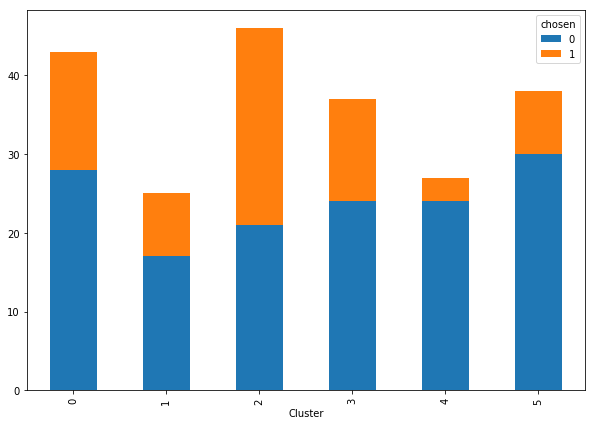

In [554]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

# Random Forest

## Arte Francés

In [555]:
X = df_n_ps_std[0].iloc[:,8:-1]
y = df_n_ps[0]['chosen']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [556]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(1234)
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
cm= confusion_matrix(y_test, y_pred)
print("Exactitud: ", accuracy_score(y_test, y_pred))
print("Kappa    : ", cohen_kappa_score(y_test, y_pred))
cm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Exactitud:  0.7848101265822784
Kappa    :  0.3458353628835851


array([[55,  2],
       [15,  7]], dtype=int64)

In [557]:
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [558]:
rforest.oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [ ]:
X.columns[np.argsort(-rforest.feature_importances_)]

In [ ]:
-rforest.feature_importances_

In [ ]:
indices = np.argsort(-rforest.feature_importances_)#[::-1]
variables = [X.columns[i] for i in indices]
plt.figure(figsize=(16,8))
plt.title("Importancia de las variables")
plt.bar(range(X.shape[1]), rforest.feature_importances_[indices])
plt.xticks(range(X.shape[1]), variables, rotation=90)
plt.show()

### ANN

In [ ]:
X = df_n_ps_[0]

In [ ]:
y = df_n_ps[0]['chosen']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

In [ ]:
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [ ]:
input_tensor = Input(shape = (n0,))

In [ ]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [ ]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [ ]:
model.summary()

In [ ]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

In [ ]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

In [ ]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

### KMeans

In [ ]:
X

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=3

In [ ]:
kmeans_ch = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_ch.fit(X)

In [ ]:
kmeans_ch.labels_

In [ ]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

In [ ]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [ ]:
X

In [ ]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[1]))

### ANN

In [ ]:
X = df_n_ps_std_ch[1]

In [ ]:
y = df_n_ps[1]['chosen']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

In [ ]:
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [ ]:
input_tensor = Input(shape = (n0,))

In [ ]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [ ]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [ ]:
model.summary()

In [ ]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

In [ ]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

In [ ]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

### KMeans

In [ ]:
X

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [ ]:
kmeans_ch = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_ch.fit(X)

In [ ]:
kmeans_ch.labels_

In [ ]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

In [ ]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [ ]:
X

In [ ]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[2]))

### ANN

In [ ]:
X = df_n_ps_std_ch[2]

In [ ]:
y = df_n_ps[2]['chosen']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [ ]:
activation_vec = ['logistic', 'relu', grid.best_params_['activation']]
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

In [ ]:
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [ ]:
input_tensor = Input(shape = (n0,))

In [ ]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [ ]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [ ]:
model.summary()

In [ ]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

In [ ]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

In [ ]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

### KMeans

In [ ]:
X

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [ ]:
kmeans_ch = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_ch.fit(X)

In [ ]:
kmeans_ch.labels_

In [ ]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

In [ ]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [ ]:
X

In [ ]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[3]))

### ANN

In [ ]:
X = df_n_ps_std_ch[3]

In [ ]:
y = df_n_ps[3]['chosen']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

In [ ]:
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [ ]:
input_tensor = Input(shape = (n0,))

In [ ]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [ ]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [ ]:
model.summary()

In [ ]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

In [ ]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

In [ ]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

### KMeans

In [ ]:
X

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [ ]:
kmeans_ch = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_ch.fit(X)

In [ ]:
kmeans_ch.labels_

In [ ]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

In [ ]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [ ]:
X

In [ ]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[4]))

### ANN

In [ ]:
X = df_n_ps_std_ch[4]

In [ ]:
y = df_n_ps[4]['chosen']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

In [ ]:
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [ ]:
input_tensor = Input(shape = (n0,))

In [ ]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [ ]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [ ]:
model.summary()

In [ ]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

In [ ]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

In [ ]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

### KMeans

In [ ]:
X

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=2

In [ ]:
kmeans_ch = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans_ch.fit(X)

In [ ]:
kmeans_ch.labels_

In [ ]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

In [ ]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [ ]:
X

In [ ]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))

In [ ]:
from IPython.display import display, Markdown, Latex
display(Markdown('## '+companies[5]))

### ANN

In [ ]:
X = df_n_ps_std_ch[5]

In [ ]:
y = df_n_ps[5]['chosen']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))

In [ ]:
activation_vec = ['logistic', 'relu', 'tanh']
max_iter_vec = [10, 20, 50, 75, 100, 200, 300, 400, 500, 1000, 2000]
hidden_layer_sizes_vec = [(10,), (20,), (30,), (10, 10), (20, 20), (30, 30), (20, 10), 
                          (10, 10, 10), (20, 20, 20), (30, 30, 30), (30, 20, 10)]
learning_rate_init_vec = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02]
batch_size_vec = [10, 20, 40, 60, 80, 100, 150]

In [ ]:
import time
start = time.time() # Devuelve el tiempo actual en segundos desde el 1o de enero de 1970 (punto de referencia)

np.random.seed(1234)
parametros = {'activation': activation_vec,
              'max_iter':max_iter_vec,
              'hidden_layer_sizes': hidden_layer_sizes_vec,
              'learning_rate_init': learning_rate_init_vec#,
              #'batch_size': batch_size_vec
              }
scoring = {'kappa':make_scorer(cohen_kappa_score), 'accuracy':'accuracy'}
grid = GridSearchCV(mlp, param_grid=parametros, cv=5, scoring=scoring, refit='accuracy', n_jobs=-1, iid=True)

In [ ]:
grid.fit(X_train, y_train)

print("Los parámetros del mejor modelo fueron {0}, que permiten obtener un Accuracy de {1:.2f}% y un Kappa del {2:.2f}".format(
    grid.best_params_, grid.best_score_*100, grid.cv_results_['mean_test_kappa'][grid.best_index_]*100))
end = time.time() # Tiempo después de finalizar el entrenamiento del modelo
print("Tiempo total: {0:.2f} minutos".format((end-start)/60))

In [ ]:
n0=X_train.shape[1]
### hidden_layer_sizes
ns = []
for i in range (len(grid.best_params_['hidden_layer_sizes'])):
    ns.append(grid.best_params_['hidden_layer_sizes'][i])

ns.append(1)
lr = grid.best_params_['learning_rate_init']
epochs = grid.best_params_['max_iter']

In [ ]:
input_tensor = Input(shape = (n0,))

In [ ]:
hidden_outputs = [input_tensor]
for i in range (len(ns)-1):
    hidden_outputs.append(Dense(ns[i], activation = grid.best_params_['activation'])(hidden_outputs[i]))
    
classification_output = Dense(ns[-1], activation = 'sigmoid')(hidden_outputs[-1])

In [ ]:
model = Model([input_tensor], [classification_output])
weights = model.get_weights()

In [ ]:
model.summary()

In [ ]:
model.set_weights(weights)
adam = keras.optimizers.Adam(lr=lr)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), 
            callbacks=[
                keras.callbacks.ReduceLROnPlateau(
                    monitor='val_accuracy', factor=0.5, patience=10, min_delta=0.01, verbose=1
                )
            ]
         )

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

print(epochs)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("test loss: {}, test accuracy: {}".format(test_loss, test_acc))

In [ ]:
y_pred = model.predict(X_test)
print("AUC ROC: ",roc_auc_score(y_test, y_pred))

In [ ]:
y_pred = list(map(lambda i: int(i>=0.5), y_pred))
print("Kappa: ",cohen_kappa_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

### KMeans

In [ ]:
X

In [ ]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    WSSs.append(km.inertia_)
WSSs

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(range(1, 15), WSSs)

K=6

In [ ]:
kmeans_ch = KMeans(n_clusters=6, random_state=0, n_init=10)
kmeans_ch.fit(X)

In [ ]:
kmeans_ch.labels_

In [ ]:
clusters_ch = kmeans_ch.predict(X)
clusters_ch

In [ ]:
X.loc[:,'Cluster'] = clusters_ch
X.loc[:,'chosen'] = list(y)

In [ ]:
X

In [ ]:
stacked = X.groupby(['chosen','Cluster']).size().reset_index()
pivot_df = stacked.pivot(index='Cluster', columns='chosen', values=0)
pivot_df.loc[:,[0,1]].plot.bar(stacked=True, figsize=(10,7))